In [1]:
require(ggplot2)
require(hnp)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: hnp

Loading required package: MASS



### Data

In [3]:
y=c(6.6,6.9,7.9,6.1,9.2,6.8,10.4,7.3,9.8,5,6.9,6.3,4,8.6,10.1,9.9,12.2,9.7,9.7,9.6)
x1=c(225,285,225,285,225,285,225,285,204.5,305.5,rep(255,10))
x2=c(46,46,64,64,46,46,64,64,55,55,39.9,70.1,rep(55,8))
x3=c(0.5,0.5,0.5,1.7,1.7,1.7,1.7,1.1,1.1,1.1,1.1,0.09,2.11,1.11,1.1,1.1,1.1,1.1,1.1,1.1)
dados=cbind.data.frame(y,x1,x2,x3)
head(dados)

,y,x1,x2,x3
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.6,225,46,0.5
2,6.9,285,46,0.5
3,7.9,225,64,0.5
4,6.1,285,64,1.7
5,9.2,225,46,1.7
6,6.8,285,46,1.7


In [4]:
summary(dados)

       y                x1              x2              x3       
 Min.   : 4.000   Min.   :204.5   Min.   :39.90   Min.   :0.090  
 1st Qu.: 6.750   1st Qu.:247.5   1st Qu.:52.75   1st Qu.:1.100  
 Median : 8.250   Median :255.0   Median :55.00   Median :1.100  
 Mean   : 8.150   Mean   :255.0   Mean   :55.00   Mean   :1.131  
 3rd Qu.: 9.725   3rd Qu.:262.5   3rd Qu.:57.25   3rd Qu.:1.258  
 Max.   :12.200   Max.   :305.5   Max.   :70.10   Max.   :2.110  

### Univariate exploratory analysis

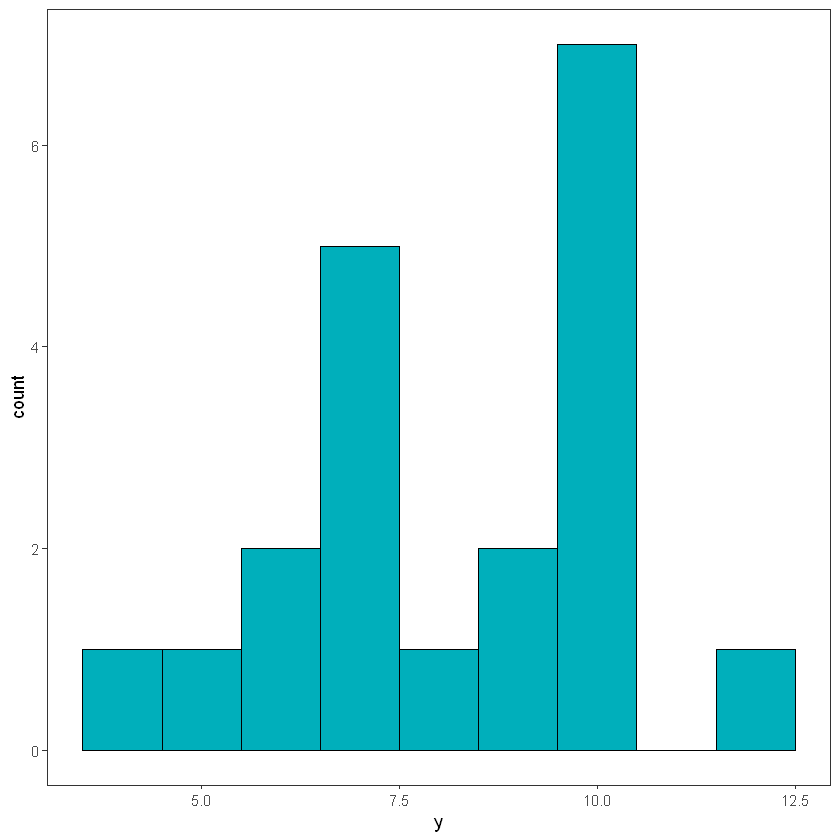

In [10]:
ggplot(dados)+aes(y)+geom_histogram(fill="#00AFBB",color="black",binwidth = 1)+theme_test()

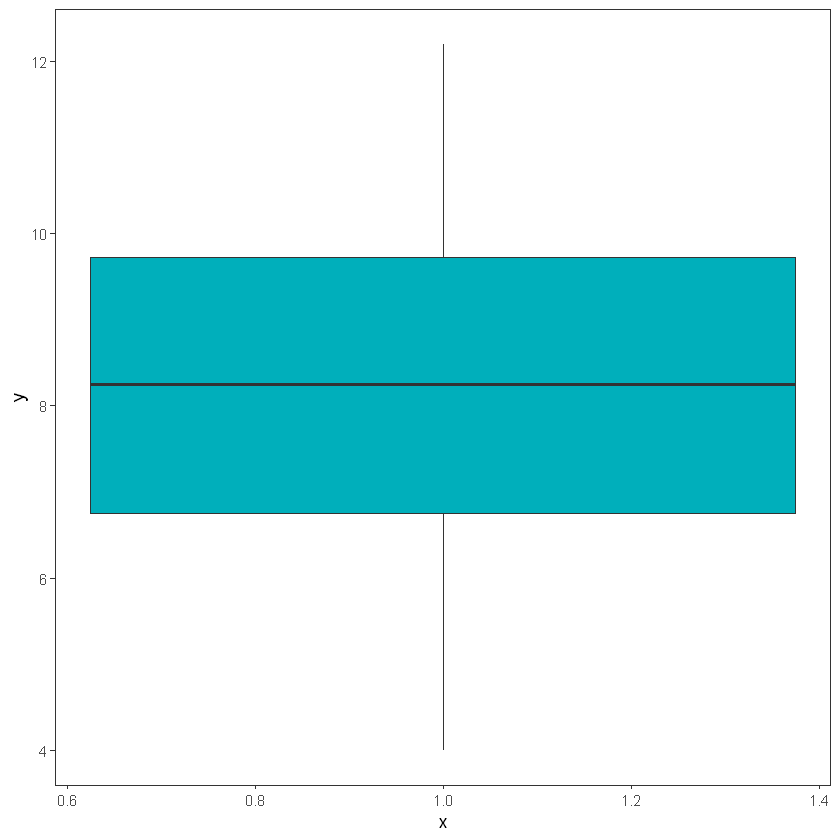

In [7]:
ggplot(dados)+aes(1,y)+geom_boxplot(fill="#00AFBB")+theme_test()

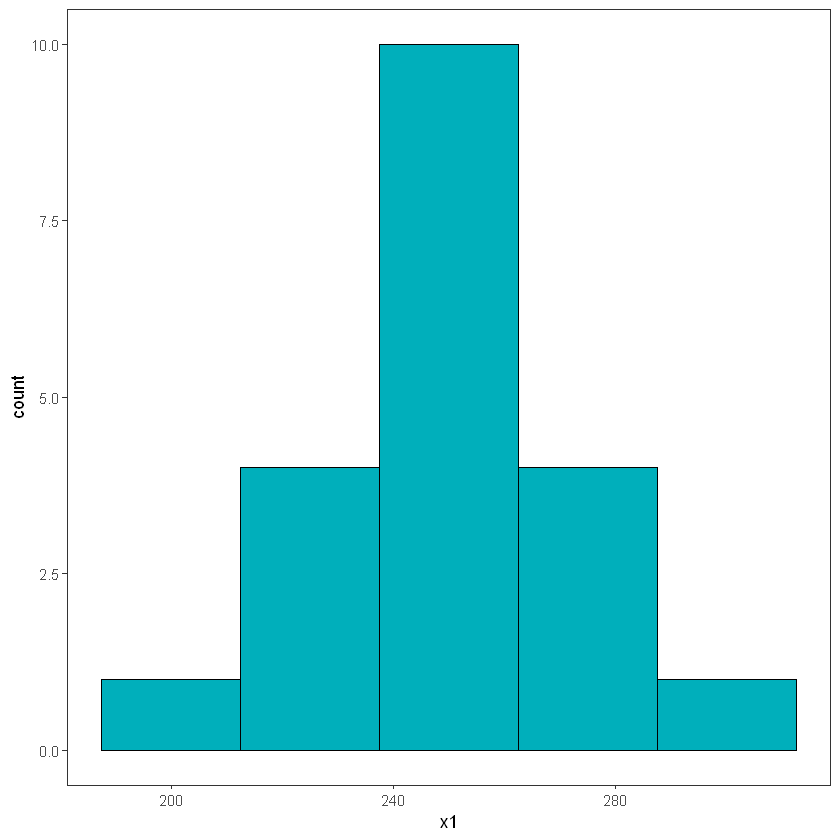

In [11]:
ggplot(dados)+aes(x1)+geom_histogram(fill="#00AFBB",color="black",binwidth = 25)+theme_test()

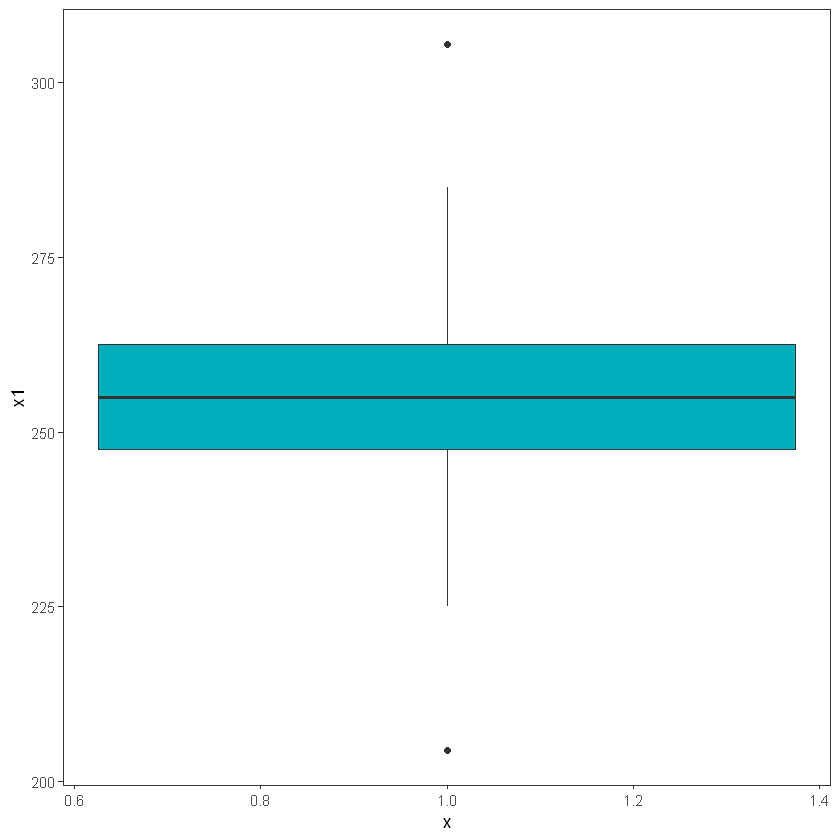

In [12]:
ggplot(dados)+aes(1,x1)+geom_boxplot(fill="#00AFBB")+theme_test()

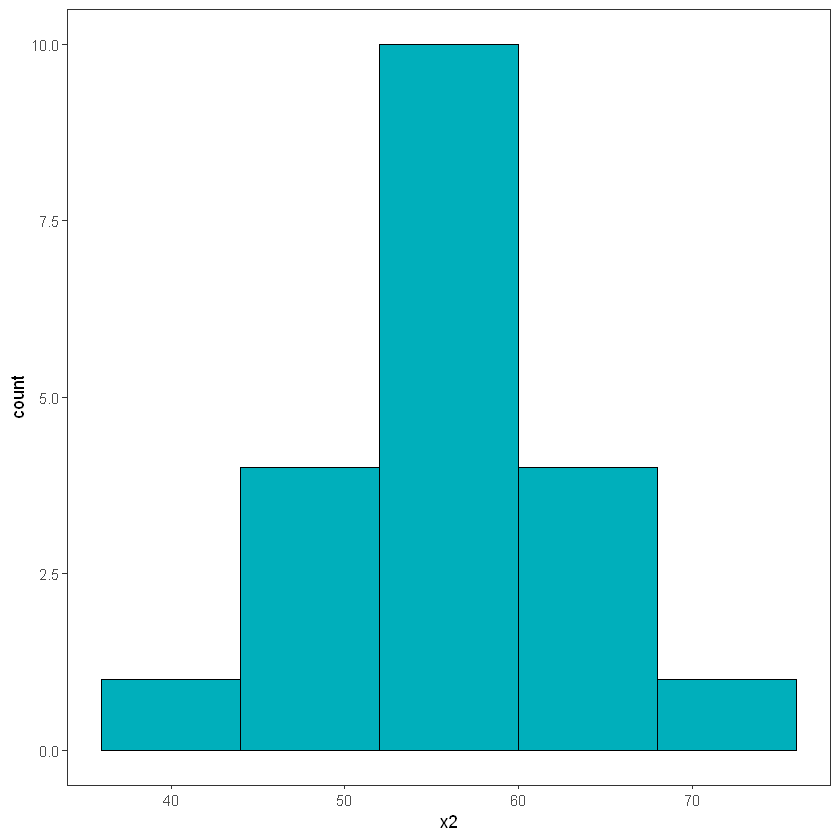

In [13]:
ggplot(dados)+aes(x2)+geom_histogram(fill="#00AFBB",color="black",binwidth = 8)+theme_test()

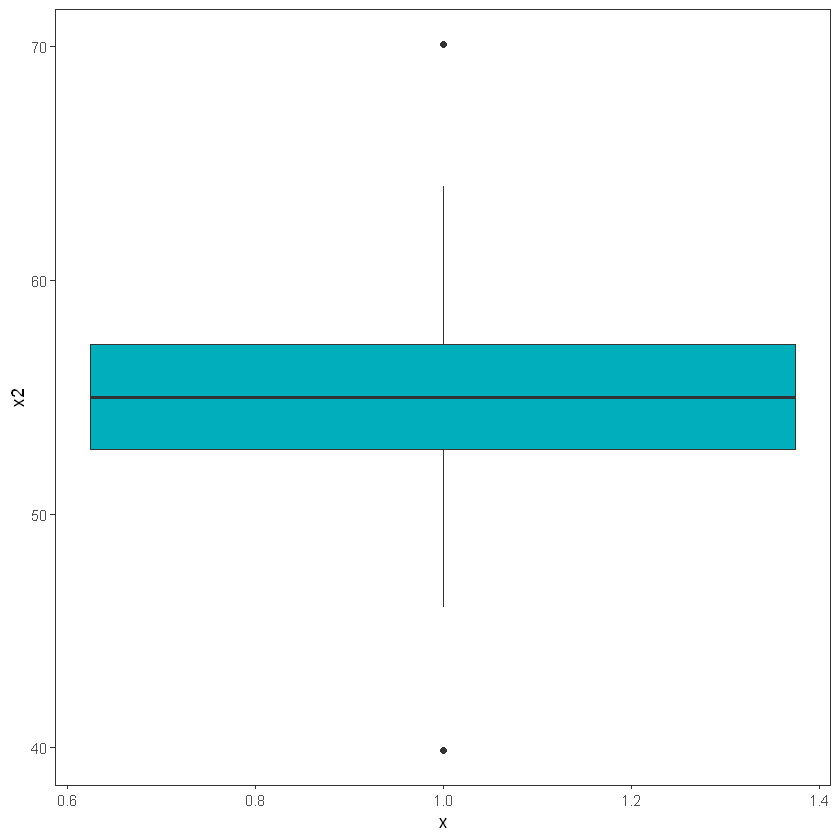

In [14]:
ggplot(dados)+aes(1,x2)+geom_boxplot(fill="#00AFBB")+theme_test()

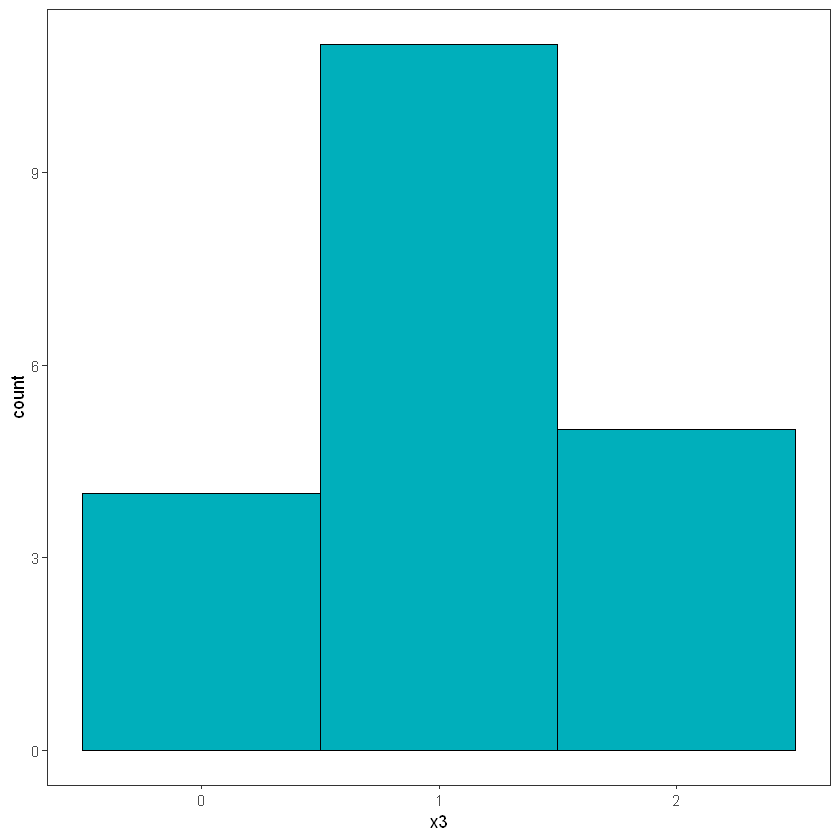

In [15]:
ggplot(dados)+aes(x3)+geom_histogram(fill="#00AFBB",color="black",binwidth = 1,bins = 15)+theme_test()

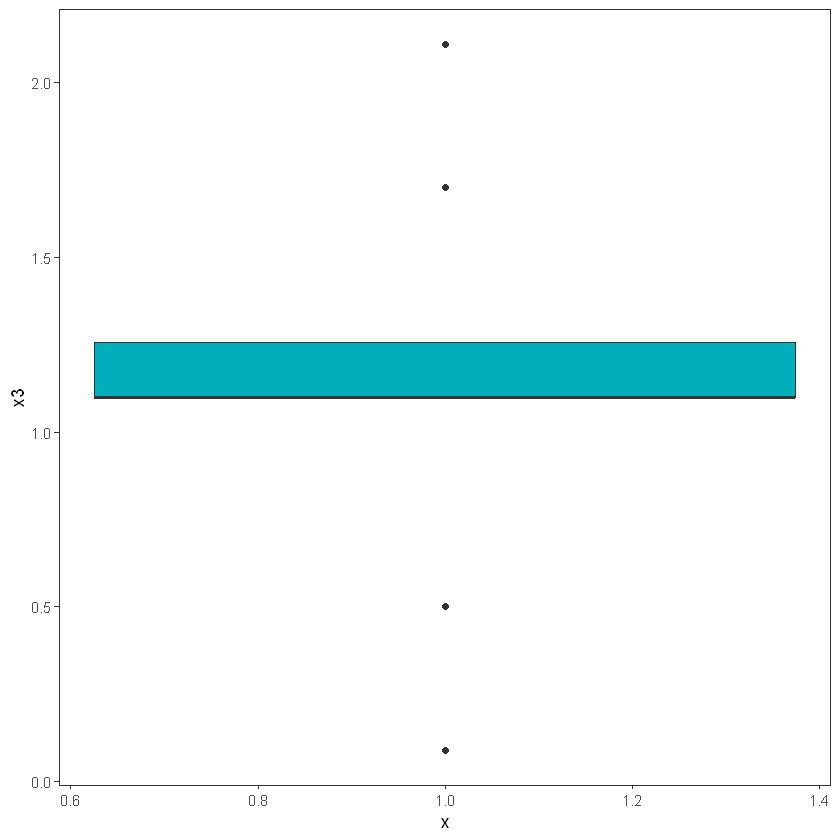

In [16]:
ggplot(dados)+aes(1,x3)+geom_boxplot(fill="#00AFBB")+theme_test()

### Bivariate exploratory analysis

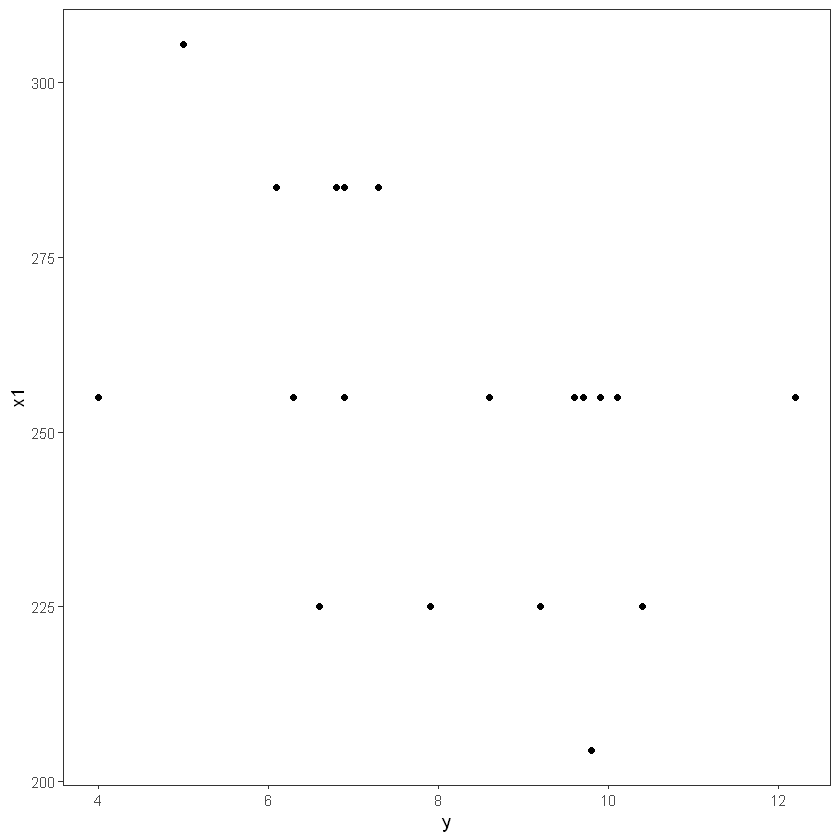

In [17]:

ggplot(dados)+aes(y,x1)+geom_point()+theme_test()

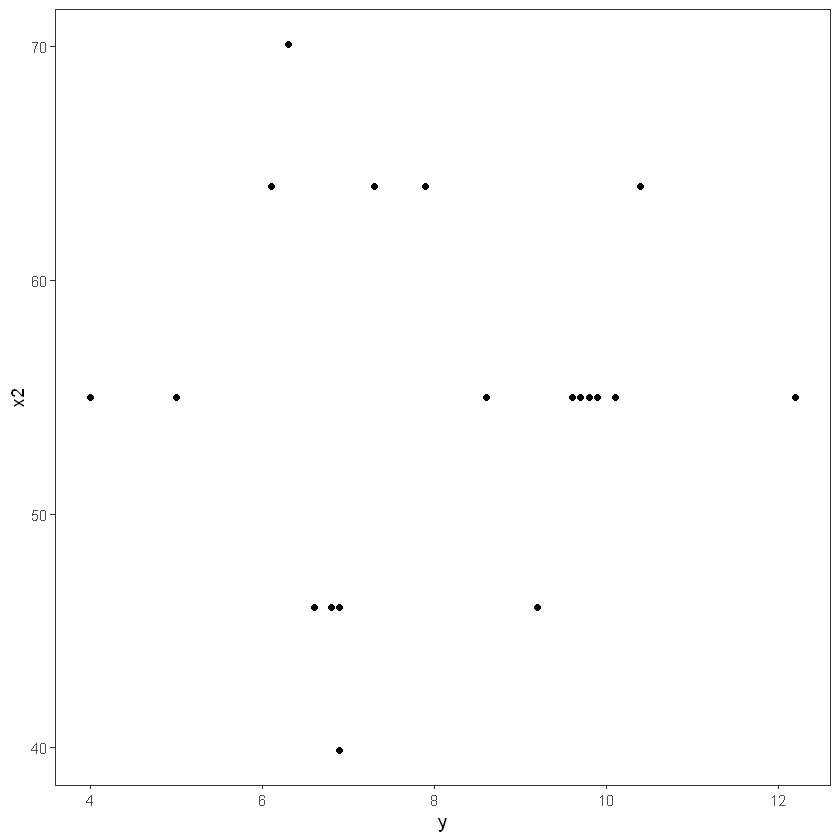

In [18]:
ggplot(dados)+aes(y,x2)+geom_point()+theme_test()

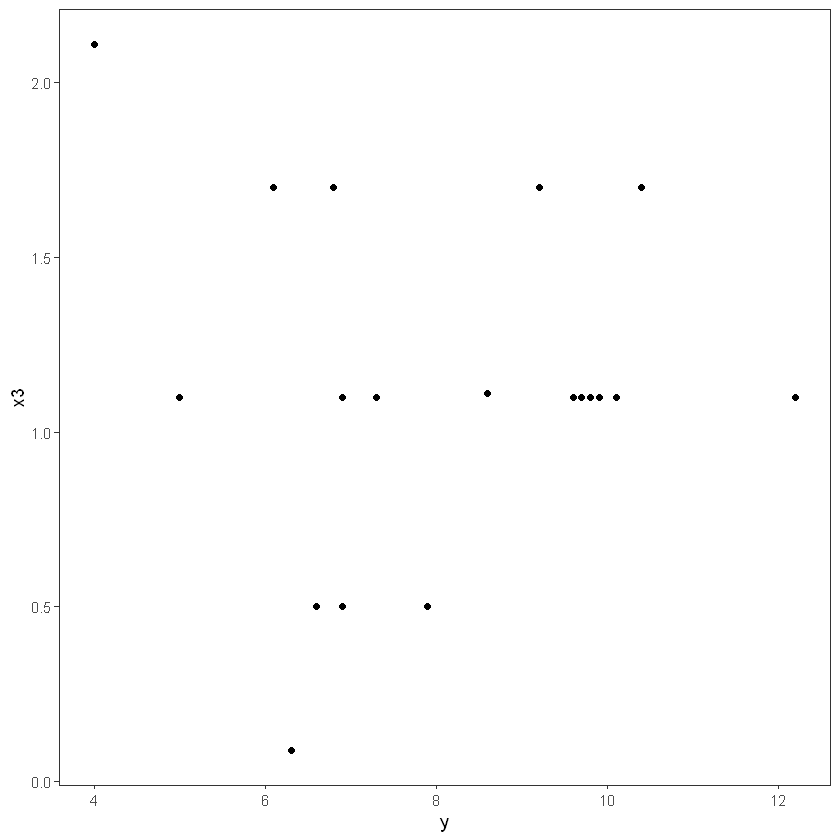

In [19]:
ggplot(dados)+aes(y,x3)+geom_point()+theme_test()

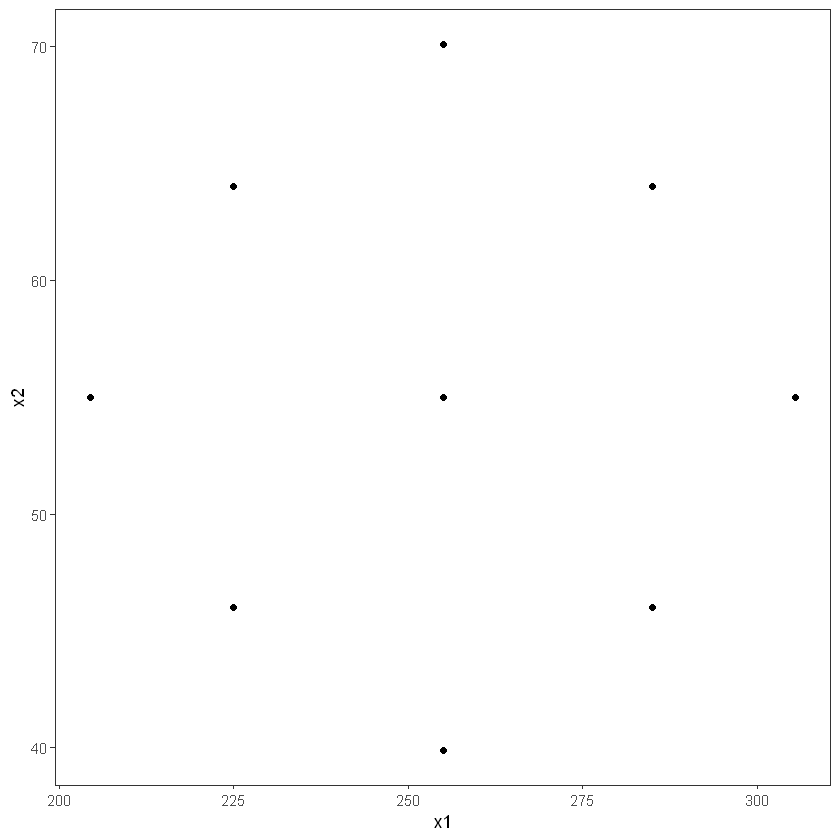

In [20]:
ggplot(dados)+aes(x1,x2)+geom_point()+theme_test()

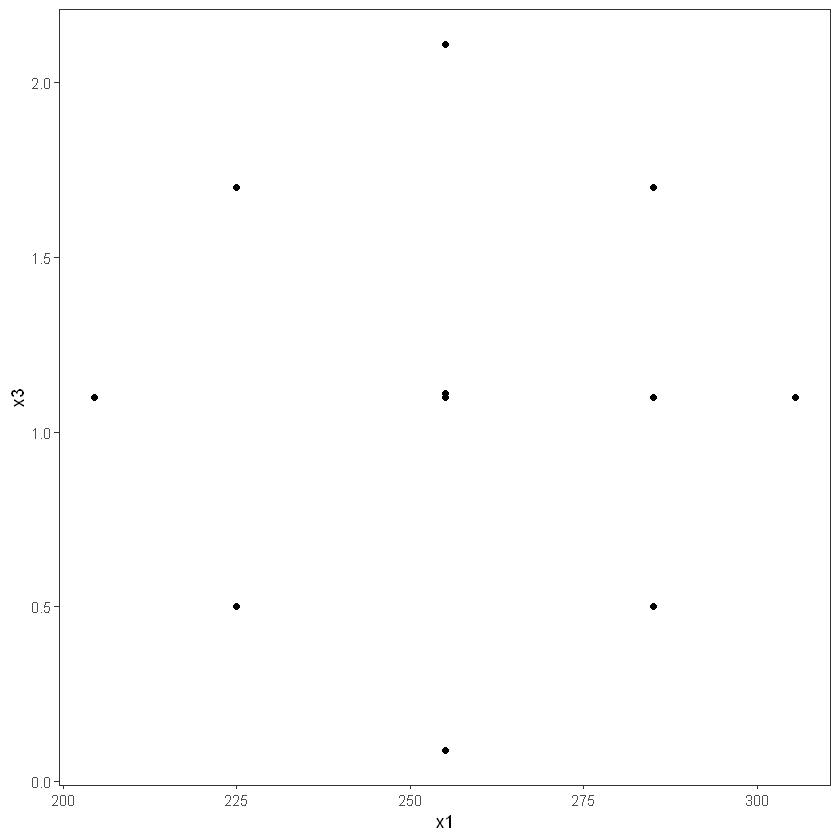

In [21]:
ggplot(dados)+aes(x1,x3)+geom_point()+theme_test()

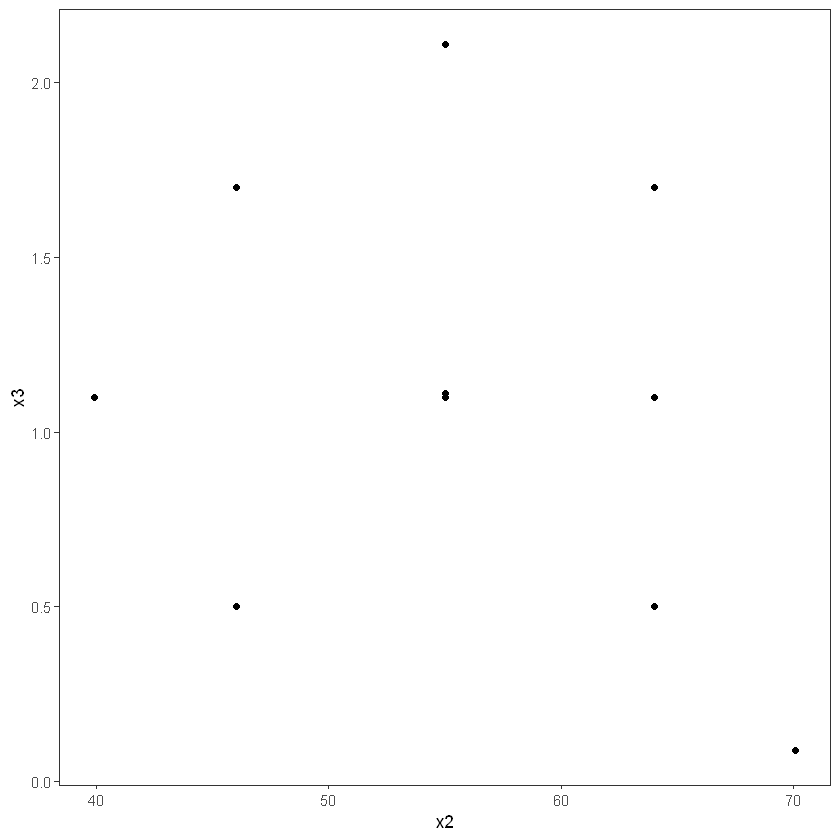

In [22]:
ggplot(dados)+aes(x2,x3)+geom_point()+theme_test()

# Modelo1- Distribuição Normal com função de ligação identidade

In [192]:
#b0 e b1 significativos a 10%
modelo1=glm(y~.,data=dados,family = gaussian);modelo1
summary(modelo1)


Call:  glm(formula = y ~ ., family = gaussian, data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
   16.93458     -0.03685      0.01015      0.04729  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    82.17 
Residual Deviance: 65.42 	AIC: 90.46


Call:
glm(formula = y ~ ., family = gaussian, data = dados)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1963  -1.1434  -0.0072   1.4764   4.0514  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 16.93458    5.87019   2.885   0.0108 *
x1          -0.03685    0.01829  -2.015   0.0610 .
x2           0.01015    0.06146   0.165   0.8709  
x3           0.04729    0.96096   0.049   0.9614  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 4.08855)

    Null deviance: 82.170  on 19  degrees of freedom
Residual deviance: 65.417  on 16  degrees of freedom
AIC: 90.458

Number of Fisher Scoring iterations: 2


In [193]:
modelo1=step(modelo1,direction = "backward");modelo1
summary(modelo1)

Start:  AIC=90.46
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x3    1   65.427 88.462
- x2    1   65.528 88.493
<none>      65.417 90.458
- x1    1   82.020 92.982

Step:  AIC=88.46
y ~ x1 + x2

       Df Deviance    AIC
- x2    1   65.531 86.493
<none>      65.427 88.462
- x1    1   82.066 90.993

Step:  AIC=86.49
y ~ x1

       Df Deviance    AIC
<none>      65.531 86.493
- x1    1   82.170 89.019



Call:  glm(formula = y ~ x1, family = gaussian, data = dados)

Coefficients:
(Intercept)           x1  
   17.52864     -0.03678  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    82.17 
Residual Deviance: 65.53 	AIC: 86.49


Call:
glm(formula = y ~ x1, family = gaussian, data = dados)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-4.150  -1.261  -0.100   1.475   4.050  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.52864    4.40769   3.977 0.000884 ***
x1          -0.03678    0.01720  -2.138 0.046501 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 3.640621)

    Null deviance: 82.170  on 19  degrees of freedom
Residual deviance: 65.531  on 18  degrees of freedom
AIC: 86.493

Number of Fisher Scoring iterations: 2


Gaussian model (glm object) 


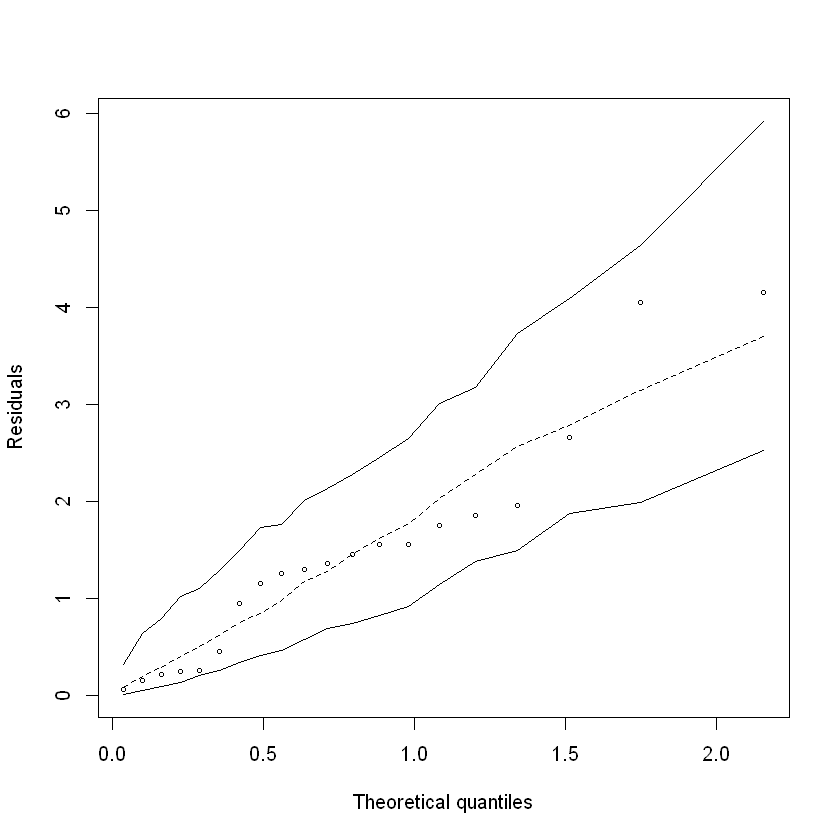

In [194]:
hnp(modelo1)

In [195]:
res_pearson=residuals(modelo1,type="pearson")
res_deviance=residuals(modelo1,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo1,type="pearson")/(sqrt(1-hatvalues(modelo1)))
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

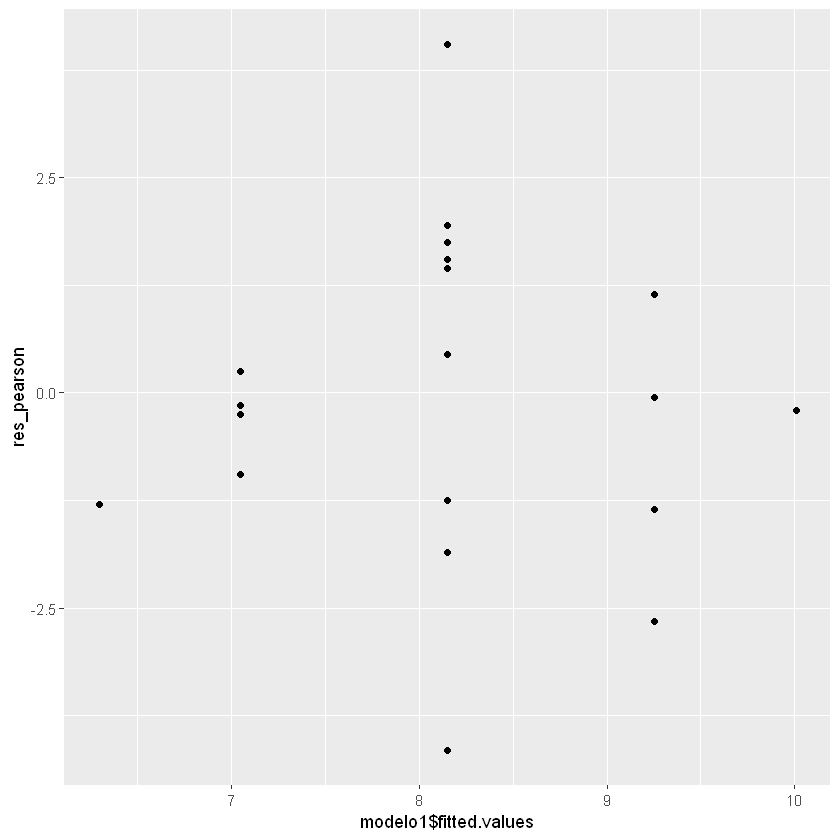

In [196]:
ggplot(grafico1)+aes(modelo1$fitted.values,res_pearson)+geom_point()

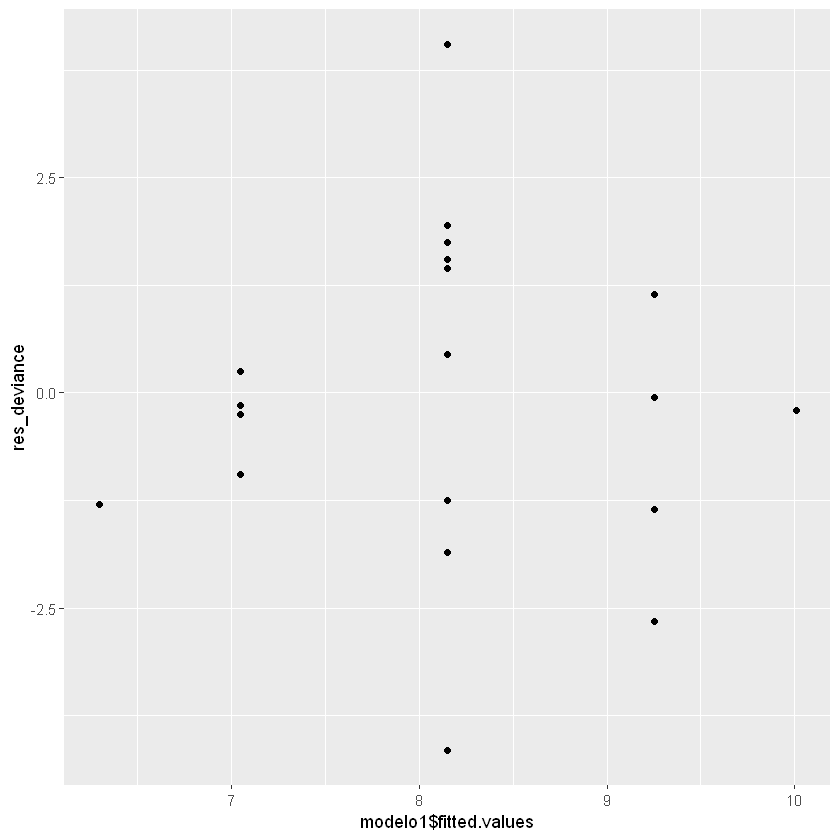

In [197]:
ggplot(grafico1)+aes(modelo1$fitted.values,res_deviance)+geom_point()

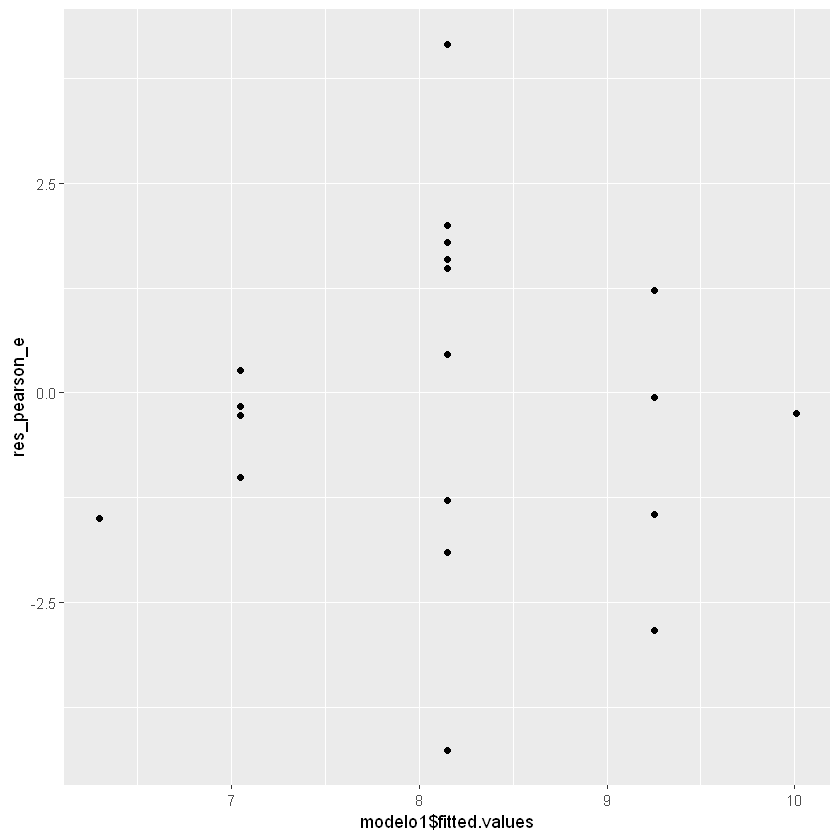

In [198]:
ggplot(grafico1)+aes(modelo1$fitted.values,res_pearson_e)+geom_point()

In [199]:
influence.measures(modelo1)

Influence measures of
	 glm(formula = y ~ x1, family = gaussian, data = dados) :

     dfb.1_    dfb.x1   dffit cov.r   cook.d   hat inf
1  -0.47859  4.45e-01 -0.5774 0.984 1.55e-01 0.123    
2   0.02109 -2.30e-02 -0.0299 1.278 4.73e-04 0.123    
3  -0.23240  2.16e-01 -0.2804 1.198 4.03e-02 0.123    
4   0.13721 -1.50e-01 -0.1945 1.239 1.97e-02 0.123    
5  -0.00902  8.39e-03 -0.0109 1.278 6.27e-05 0.123    
6   0.03549 -3.88e-02 -0.0503 1.276 1.34e-03 0.123    
7   0.19599 -1.82e-01  0.2365 1.221 2.89e-02 0.123    
8  -0.03646  3.98e-02  0.0517 1.276 1.41e-03 0.123    
9  -0.06755  6.48e-02 -0.0722 1.507 2.75e-03 0.257   *
10  0.38932 -4.11e-01 -0.4576 1.408 1.07e-01 0.257   *
11 -0.01469 -4.04e-19 -0.1518 1.122 1.19e-02 0.050    
12 -0.02208 -3.79e-17 -0.2281 1.054 2.60e-02 0.050    
13 -0.05662 -7.05e-17 -0.5850 0.617 1.31e-01 0.050   *
14  0.00523  5.18e-18  0.0540 1.172 1.54e-03 0.050    
15  0.02335  1.93e-17  0.2413 1.040 2.89e-02 0.050    
16  0.02083  2.11e-17  0.2152 1.067 2.

In [200]:
#Possíveis pontos influentes: 9,10, 13 e 17
modelo1=glm(y~x1,data=dados[-9,],family = gaussian);modelo1
summary(modelo1)


Call:  glm(formula = y ~ x1, family = gaussian, data = dados[-9, ])

Coefficients:
(Intercept)           x1  
   17.83488     -0.03793  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    79.3 
Residual Deviance: 65.47 	AIC: 83.43


Call:
glm(formula = y ~ x1, family = gaussian, data = dados[-9, ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1640  -1.2563  -0.1017   1.4860   4.0360  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 17.83488    5.17610   3.446  0.00309 **
x1          -0.03793    0.02001  -1.895  0.07522 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 3.851371)

    Null deviance: 79.304  on 18  degrees of freedom
Residual deviance: 65.473  on 17  degrees of freedom
AIC: 83.427

Number of Fisher Scoring iterations: 2


In [201]:
#Possíveis pontos influentes: 9,10, 13 e 17
modelo1=glm(y~x1,data=dados[-10,],family = gaussian);modelo1
summary(modelo1)


Call:  glm(formula = y ~ x1, family = gaussian, data = dados[-10, ])

Coefficients:
(Intercept)           x1  
   15.79347     -0.02963  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    71.73 
Residual Deviance: 63.28 	AIC: 82.78


Call:
glm(formula = y ~ x1, family = gaussian, data = dados[-10, ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2370  -1.2370   0.0665   1.4130   3.9630  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 15.79347    4.98453   3.168  0.00562 **
x1          -0.02963    0.01968  -1.506  0.15039   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 3.722426)

    Null deviance: 71.725  on 18  degrees of freedom
Residual deviance: 63.281  on 17  degrees of freedom
AIC: 82.78

Number of Fisher Scoring iterations: 2


In [202]:
#Possíveis pontos influentes: 9,10, 13 e 17
modelo1=glm(y~x1,data=dados[-13,],family = gaussian);modelo1
summary(modelo1)


Call:  glm(formula = y ~ x1, family = gaussian, data = dados[-13, ])

Coefficients:
(Intercept)           x1  
   17.74706     -0.03678  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    64.04 
Residual Deviance: 47.4 	AIC: 77.29


Call:
glm(formula = y ~ x1, family = gaussian, data = dados[-13, ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8718  -1.3167  -0.2718   1.2816   3.8316  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.74706    3.85838   4.600 0.000255 ***
x1          -0.03678    0.01506  -2.443 0.025789 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 2.788367)

    Null deviance: 64.041  on 18  degrees of freedom
Residual deviance: 47.402  on 17  degrees of freedom
AIC: 77.29

Number of Fisher Scoring iterations: 2


In [203]:
#Possíveis pontos influentes: 9,10, 13 e 17
modelo1=glm(y~x1,data=dados[-17,],family = gaussian);modelo1
summary(modelo1)


Call:  glm(formula = y ~ x1, family = gaussian, data = dados[-17, ])

Coefficients:
(Intercept)           x1  
   17.31549     -0.03678  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    64.9 
Residual Deviance: 48.27 	AIC: 77.63


Call:
glm(formula = y ~ x1, family = gaussian, data = dados[-17, ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9368  -1.0582   0.0665   1.5115   2.1632  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.31549    3.89335   4.447 0.000353 ***
x1          -0.03678    0.01519  -2.421 0.026964 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 2.839141)

    Null deviance: 64.904  on 18  degrees of freedom
Residual deviance: 48.265  on 17  degrees of freedom
AIC: 77.633

Number of Fisher Scoring iterations: 2


# Modelo2- Distribuição Normal com função de ligação logarítmica

In [204]:
#b0 e b1 significativos a 10%
modelo2=glm(y~.,data=dados,family = gaussian(link="log"));modelo2
summary(modelo2)


Call:  glm(formula = y ~ ., family = gaussian(link = "log"), data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
   3.066321    -0.004226     0.001571     0.015803  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    82.17 
Residual Deviance: 66.47 	AIC: 90.78


Call:
glm(formula = y ~ ., family = gaussian(link = "log"), data = dados)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2346  -1.2431  -0.0148   1.5207   4.0957  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.066321   0.718357   4.269 0.000588 ***
x1          -0.004226   0.002257  -1.873 0.079485 .  
x2           0.001571   0.007611   0.206 0.839032    
x3           0.015803   0.116901   0.135 0.894152    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 4.154466)

    Null deviance: 82.170  on 19  degrees of freedom
Residual deviance: 66.472  on 16  degrees of freedom
AIC: 90.778

Number of Fisher Scoring iterations: 7


In [205]:
modelo2=step(modelo2,direction = "backward");modelo2
summary(modelo2)

Start:  AIC=90.78
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x3    1   66.562 88.806
- x2    1   66.668 88.837
<none>      66.472 90.778
- x1    1   82.040 92.987

Step:  AIC=88.81
y ~ x1 + x2

       Df Deviance    AIC
- x2    1   66.720 86.853
<none>      66.562 88.806
- x1    1   82.076 90.996

Step:  AIC=86.85
y ~ x1

       Df Deviance    AIC
<none>       66.72 86.853
- x1    1    82.17 89.019



Call:  glm(formula = y ~ x1, family = gaussian(link = "log"), data = dados)

Coefficients:
(Intercept)           x1  
   3.158540    -0.004178  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    82.17 
Residual Deviance: 66.72 	AIC: 86.85


Call:
glm(formula = y ~ x1, family = gaussian(link = "log"), data = dados)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1098  -1.2306  -0.1039   1.5152   4.0902  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.158540   0.534178   5.913 1.35e-05 ***
x1          -0.004178   0.002127  -1.964   0.0652 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 3.706687)

    Null deviance: 82.17  on 19  degrees of freedom
Residual deviance: 66.72  on 18  degrees of freedom
AIC: 86.853

Number of Fisher Scoring iterations: 4


Gaussian model (glm object) 


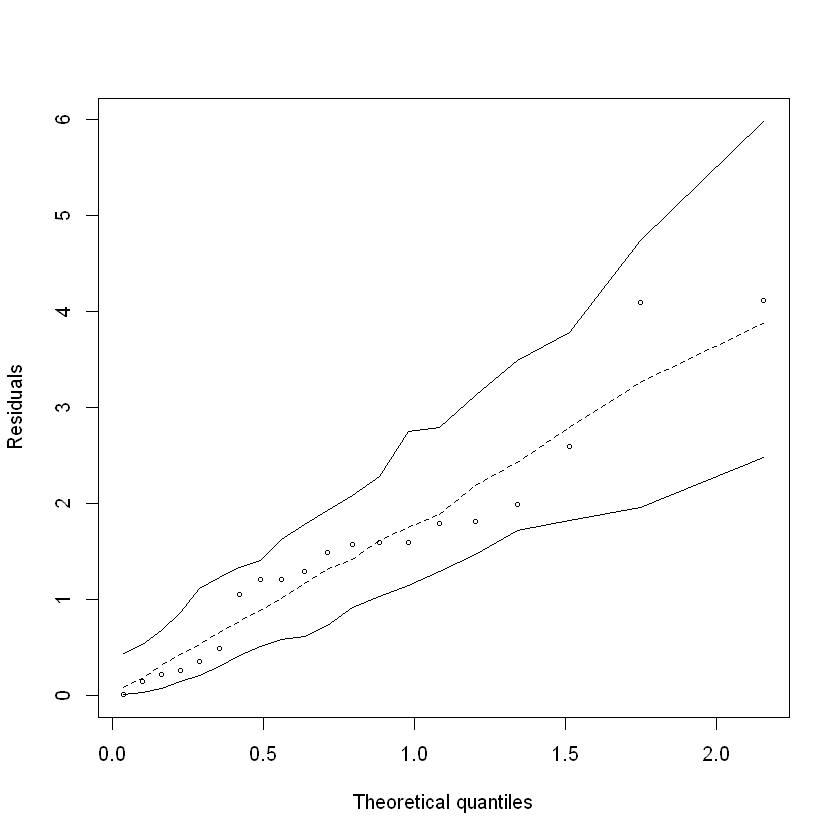

In [206]:
hnp(modelo2)

In [207]:
res_pearson=residuals(modelo2,type="pearson")
res_deviance=residuals(modelo2,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo2,type="pearson")/(sqrt(1-hatvalues(modelo2)))

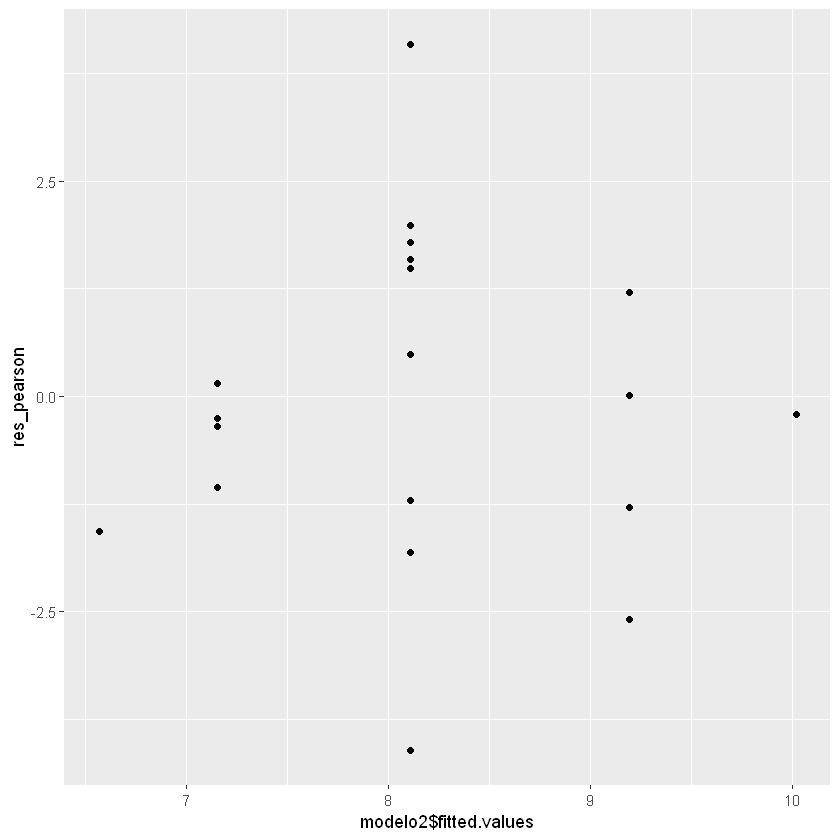

In [208]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)
ggplot(grafico1)+aes(modelo2$fitted.values,res_pearson)+geom_point()

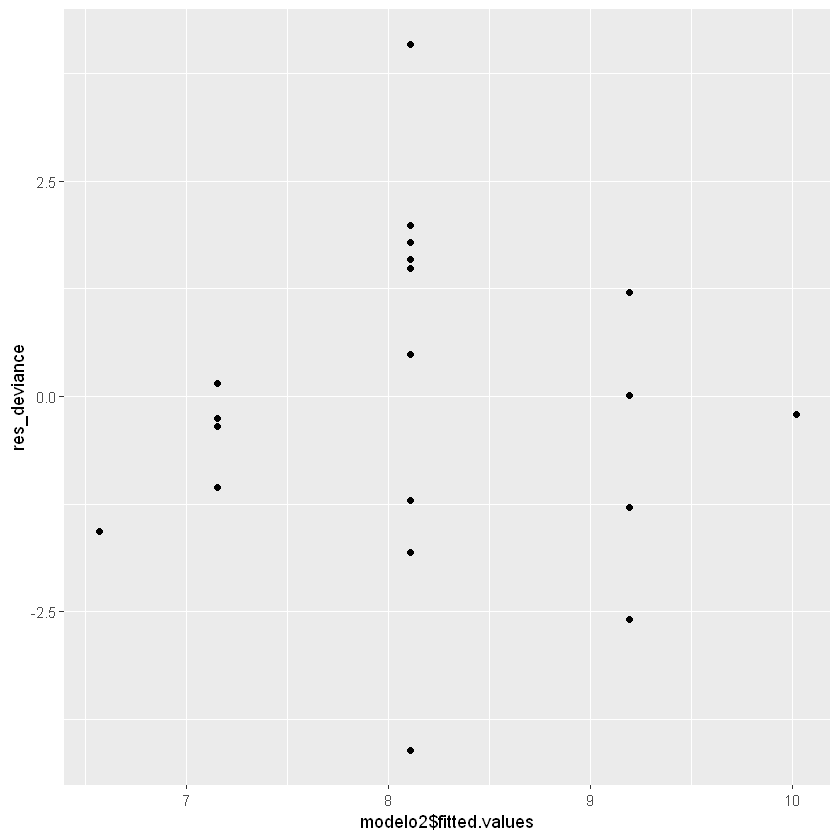

In [209]:
ggplot(grafico1)+aes(modelo2$fitted.values,res_deviance)+geom_point()

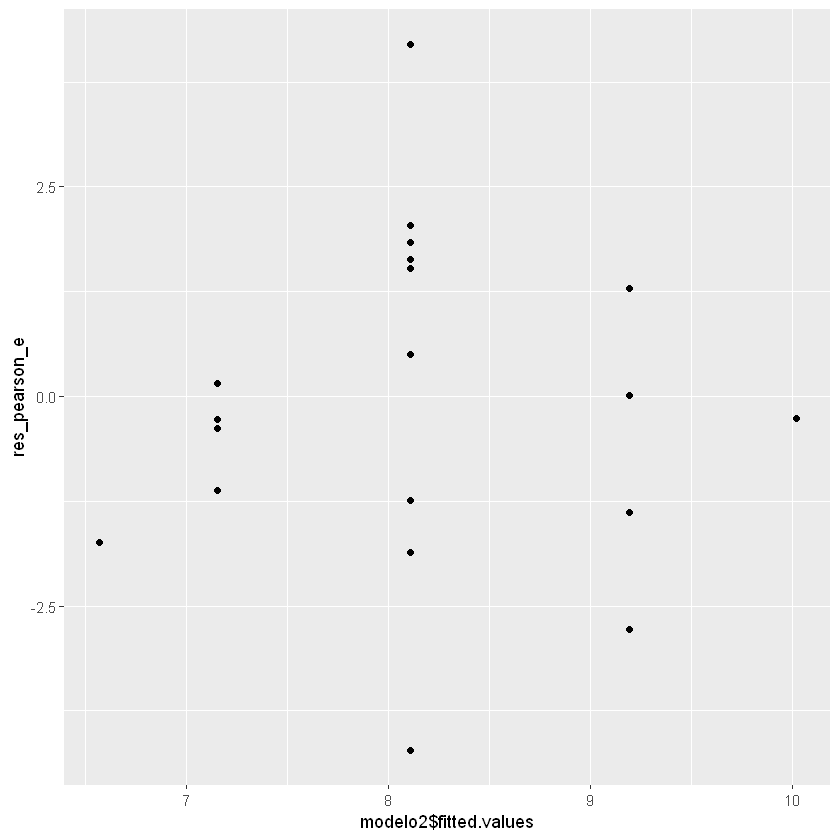

In [210]:
ggplot(grafico1)+aes(modelo2$fitted.values,res_pearson_e)+geom_point()

In [211]:
influence.measures(modelo2)

Influence measures of
	 glm(formula = y ~ x1, family = gaussian(link = "log"), data = dados) :

     dfb.1_   dfb.x1    dffit cov.r   cook.d   hat inf
1  -0.44001  0.40267 -0.56729 1.005 1.51e-01 0.127    
2   0.03734 -0.04032 -0.04929 1.264 1.28e-03 0.115    
3  -0.20938  0.19161 -0.26995 1.211 3.75e-02 0.127    
4   0.15616 -0.16863 -0.20611 1.220 2.21e-02 0.115    
5   0.00114 -0.00104  0.00147 1.284 1.14e-06 0.127    
6   0.05205 -0.05620 -0.06870 1.262 2.49e-03 0.115    
7   0.19513 -0.17857  0.25157 1.220 3.27e-02 0.127    
8  -0.02136  0.02307  0.02819 1.266 4.21e-04 0.115    
9  -0.08492  0.08098 -0.09219 1.662 4.50e-03 0.327   *
10  0.38636 -0.40605 -0.44424 1.268 9.97e-02 0.195    
11  0.01559 -0.02990 -0.14711 1.127 1.12e-02 0.051    
12  0.02367 -0.04539 -0.22337 1.062 2.50e-02 0.051    
13  0.06113 -0.11722 -0.57683 0.635 1.29e-01 0.051   *
14 -0.00625  0.01199  0.05902 1.172 1.84e-03 0.051    
15 -0.02618  0.05020  0.24703 1.038 3.03e-02 0.051    
16 -0.02340  0.04487  0.

In [212]:
#Possíveis pontos influentes: 9, 13 e 17
modelo2=glm(y~x1,data=dados[-9,],family = gaussian(link="log"));modelo2
summary(modelo2)


Call:  glm(formula = y ~ x1, family = gaussian(link = "log"), data = dados[-9, 
    ])

Coefficients:
(Intercept)           x1  
   3.201114    -0.004339  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    79.3 
Residual Deviance: 66.65 	AIC: 83.77


Call:
glm(formula = y ~ x1, family = gaussian(link = "log"), data = dados[-9, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1219  -1.2865  -0.0512   1.5281   4.0781  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.201114   0.652079   4.909 0.000133 ***
x1          -0.004339   0.002564  -1.692 0.108807    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 3.920791)

    Null deviance: 79.304  on 18  degrees of freedom
Residual deviance: 66.653  on 17  degrees of freedom
AIC: 83.766

Number of Fisher Scoring iterations: 4


In [213]:
#Possíveis pontos influentes: 9, 13 e 17
modelo2=glm(y~x1,data=dados[-13,],family = gaussian(link="log"));modelo2
summary(modelo2)


Call:  glm(formula = y ~ x1, family = gaussian(link = "log"), data = dados[-13, 
    ])

Coefficients:
(Intercept)           x1  
   3.135725    -0.003984  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    64.04 
Residual Deviance: 48.92 	AIC: 77.89


Call:
glm(formula = y ~ x1, family = gaussian(link = "log"), data = dados[-13, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7874  -1.3608  -0.1874   1.3200   3.8700  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.135725   0.459050   6.831 2.92e-06 ***
x1          -0.003984   0.001828  -2.179   0.0437 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 2.877884)

    Null deviance: 64.041  on 18  degrees of freedom
Residual deviance: 48.924  on 17  degrees of freedom
AIC: 77.89

Number of Fisher Scoring iterations: 5


In [214]:
#Possíveis pontos influentes: 9, 13 e 17
modelo2=glm(y~x1,data=dados[-17,],family = gaussian(link="log"));modelo2
summary(modelo2)


Call:  glm(formula = y ~ x1, family = gaussian(link = "log"), data = dados[-17, 
    ])

Coefficients:
(Intercept)           x1  
   3.185431    -0.004391  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    64.9 
Residual Deviance: 49.09 	AIC: 77.96


Call:
glm(formula = y ~ x1, family = gaussian(link = "log"), data = dados[-17, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8902  -1.0457  -0.0163   1.5543   2.2098  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.185431   0.483987   6.582 4.66e-06 ***
x1          -0.004391   0.001931  -2.274   0.0362 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 2.887806)

    Null deviance: 64.904  on 18  degrees of freedom
Residual deviance: 49.093  on 17  degrees of freedom
AIC: 77.956

Number of Fisher Scoring iterations: 4


# Modelo3- Distribuição Gama com função de ligação inversa

In [215]:
#b1 significativo a 10%
modelo3=glm(y~.,data=dados,family = Gamma);modelo3
summary(modelo3)


Call:  glm(formula = y ~ ., family = Gamma, data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
 -0.0071310    0.0005506   -0.0001516   -0.0006108  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    1.373 
Residual Deviance: 1.121 	AIC: 91.87


Call:
glm(formula = y ~ ., family = Gamma, data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.63033  -0.16168  -0.00823   0.18443   0.44697  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0071310  0.0889251  -0.080   0.9371  
x1           0.0005506  0.0002785   1.977   0.0656 .
x2          -0.0001516  0.0009466  -0.160   0.8747  
x3          -0.0006108  0.0145753  -0.042   0.9671  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.06445147)

    Null deviance: 1.3727  on 19  degrees of freedom
Residual deviance: 1.1214  on 16  degrees of freedom
AIC: 91.869

Number of Fisher Scoring iterations: 4


In [216]:
modelo3=step(modelo3,direction = "backward");modelo3
summary(modelo3)

Start:  AIC=91.87
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x3    1   1.1215 89.871
- x2    1   1.1231 89.895
<none>      1.1214 91.869
- x1    1   1.3704 93.733

Step:  AIC=89.87
y ~ x1 + x2

       Df Deviance    AIC
- x2    1   1.1231 87.897
<none>      1.1215 89.871
- x1    1   1.3711 91.981

Step:  AIC=87.9
y ~ x1

       Df Deviance    AIC
<none>      1.1231 87.899
- x1    1   1.3727 90.243



Call:  glm(formula = y ~ x1, family = Gamma, data = dados)

Coefficients:
(Intercept)           x1  
 -0.0159756    0.0005498  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    1.373 
Residual Deviance: 1.123 	AIC: 87.9


Call:
glm(formula = y ~ x1, family = Gamma, data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.62652  -0.15197  -0.01911   0.18418   0.44670  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0159756  0.0657784  -0.243   0.8109  
x1           0.0005498  0.0002624   2.095   0.0506 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05746743)

    Null deviance: 1.3727  on 19  degrees of freedom
Residual deviance: 1.1231  on 18  degrees of freedom
AIC: 87.899

Number of Fisher Scoring iterations: 4


Gamma model 


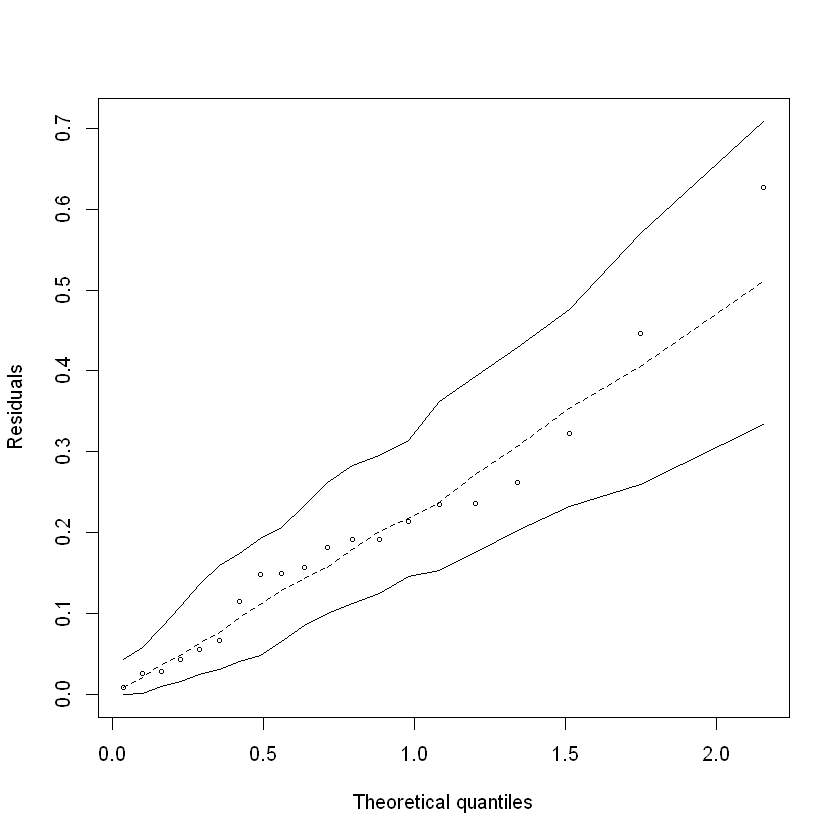

In [217]:
hnp(modelo3)

In [218]:
res_pearson=residuals(modelo3,type="pearson")
res_deviance=residuals(modelo3,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo3,type="pearson")/(sqrt(1-hatvalues(modelo3)))

In [219]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

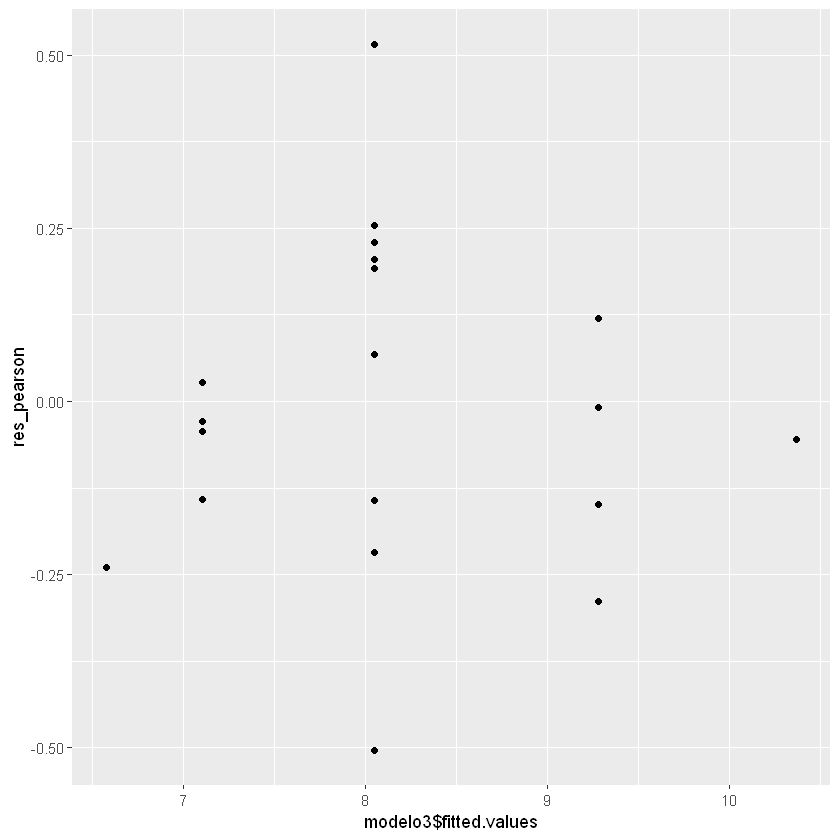

In [220]:
ggplot(grafico1)+aes(modelo3$fitted.values,res_pearson)+geom_point()

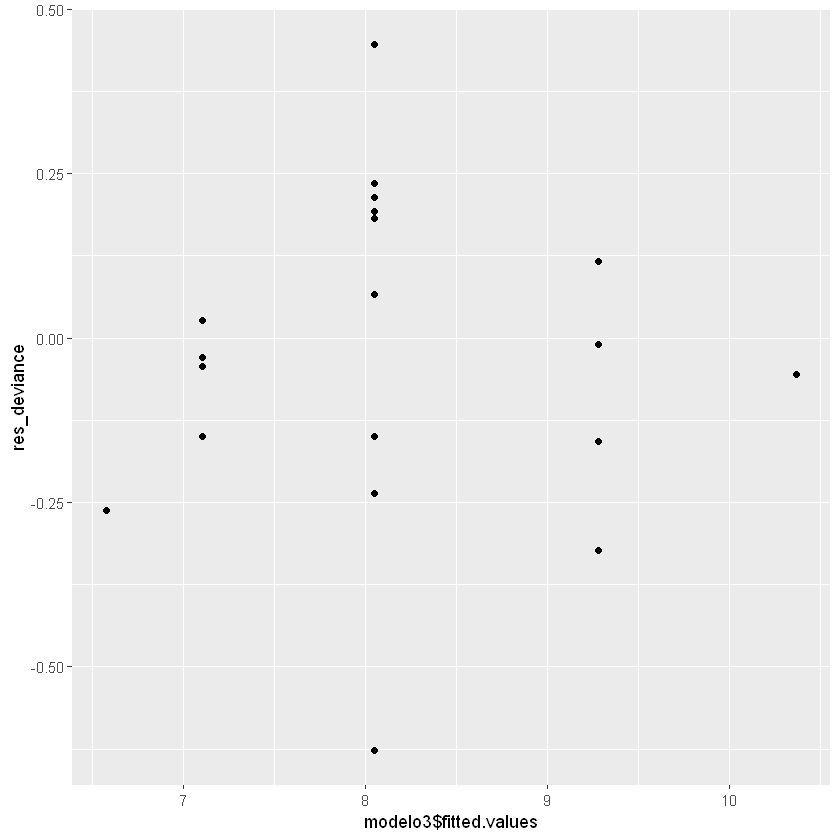

In [221]:
ggplot(grafico1)+aes(modelo3$fitted.values,res_deviance)+geom_point()

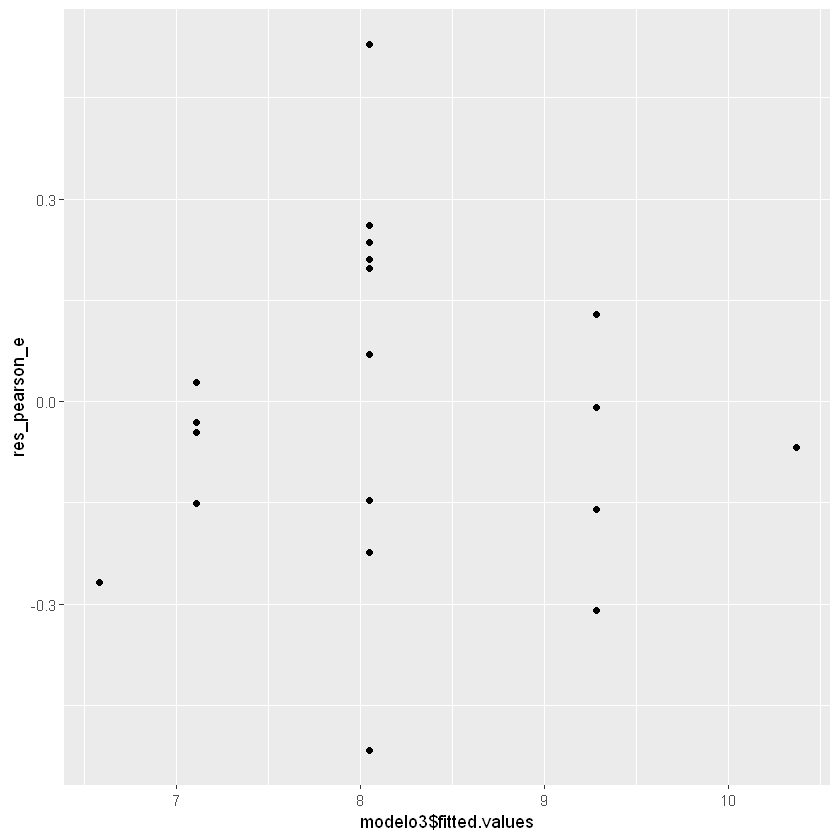

In [222]:
ggplot(grafico1)+aes(modelo3$fitted.values,res_pearson_e)+geom_point()

In [223]:
influence.measures(modelo3)

Influence measures of
	 glm(formula = y ~ x1, family = Gamma, data = dados) :

     dfb.1_   dfb.x1   dffit cov.r   cook.d    hat inf
1  -0.41302  0.37670 -0.5381 1.025 0.119315 0.1256    
2   0.03302 -0.03567 -0.0435 1.263 0.001067 0.1142    
3  -0.19245  0.17553 -0.2508 1.219 0.031689 0.1256    
4   0.16950 -0.18314 -0.2235 1.210 0.025392 0.1142    
5  -0.01077  0.00982 -0.0140 1.282 0.000113 0.1256    
6   0.04928 -0.05325 -0.0650 1.261 0.002353 0.1142    
7   0.14120 -0.12878  0.1840 1.247 0.020714 0.1256    
8  -0.03041  0.03286  0.0401 1.264 0.000940 0.1142    
9  -0.17609  0.16768 -0.1917 1.684 0.020272 0.3397   *
10  0.50735 -0.53352 -0.5837 1.189 0.151307 0.1954    
11  0.01694 -0.03066 -0.1400 1.131 0.009964 0.0506    
12  0.02697 -0.04883 -0.2229 1.061 0.023076 0.0506    
13  0.08789 -0.15911 -0.7265 0.471 0.123600 0.0506   *
14 -0.00747  0.01352  0.0617 1.171 0.002281 0.0506    
15 -0.02701  0.04889  0.2232 1.061 0.031673 0.0506    
16 -0.02442  0.04422  0.2019 1.081 0.0257

In [224]:
#Possíveis pontos influentes: 9 e 13
modelo3=glm(y~x1,data=dados[-9,],family = Gamma);modelo3
summary(modelo3)


Call:  glm(formula = y ~ x1, family = Gamma, data = dados[-9, ])

Coefficients:
(Intercept)           x1  
 -0.0280537    0.0005957  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    1.334 
Residual Deviance: 1.118 	AIC: 84.27


Call:
glm(formula = y ~ x1, family = Gamma, data = dados[-9, ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.62891  -0.16280  -0.02225   0.18377   0.44326  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0280537  0.0802552  -0.350   0.7310  
x1           0.0005957  0.0003161   1.885   0.0767 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.06015613)

    Null deviance: 1.3343  on 18  degrees of freedom
Residual deviance: 1.1184  on 17  degrees of freedom
AIC: 84.272

Number of Fisher Scoring iterations: 4


In [225]:
#Possíveis pontos influentes: 9 e 13
modelo3=glm(y~x1,data=dados[-13,],family = Gamma);modelo3
summary(modelo3)


Call:  glm(formula = y ~ x1, family = Gamma, data = dados[-13, ])

Coefficients:
(Intercept)           x1  
 -0.0122050    0.0005223  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.9542 
Residual Deviance: 0.7173 	AIC: 77.56


Call:
glm(formula = y ~ x1, family = Gamma, data = dados[-13, ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.34296  -0.17599  -0.03144   0.15894   0.41632  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0122050  0.0554338  -0.220   0.8284  
x1           0.0005223  0.0002212   2.361   0.0304 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.04285336)

    Null deviance: 0.95423  on 18  degrees of freedom
Residual deviance: 0.71729  on 17  degrees of freedom
AIC: 77.557

Number of Fisher Scoring iterations: 4


# Modelo4- Distribuição Gama com função de ligação logarítmica

In [226]:
#Intercepto e b1 significativos.
modelo4=glm(y~.,data=dados,family = Gamma(link="log"));modelo4
summary(modelo4)


Call:  glm(formula = y ~ ., family = Gamma(link = "log"), data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
  3.3165650   -0.0049374    0.0008319   -0.0107528  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    1.373 
Residual Deviance: 1.097 	AIC: 91.42


Call:
glm(formula = y ~ ., family = Gamma(link = "log"), data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.62245  -0.15313  -0.00859   0.17803   0.44002  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.3165650  0.7271408   4.561  0.00032 ***
x1          -0.0049374  0.0022651  -2.180  0.04455 *  
x2           0.0008319  0.0076126   0.109  0.91434    
x3          -0.0107528  0.1190348  -0.090  0.92914    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.06273391)

    Null deviance: 1.3727  on 19  degrees of freedom
Residual deviance: 1.0969  on 16  degrees of freedom
AIC: 91.424

Number of Fisher Scoring iterations: 6


In [227]:
modelo4=step(modelo4,direction = "backward");modelo4
summary(modelo4)

Start:  AIC=91.42
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x3    1   1.0973 89.431
- x2    1   1.0976 89.435
<none>      1.0969 91.424
- x1    1   1.3700 93.777

Step:  AIC=89.43
y ~ x1 + x2

       Df Deviance    AIC
- x2    1   1.0981 87.445
<none>      1.0973 89.432
- x1    1   1.3709 92.075

Step:  AIC=87.45
y ~ x1

       Df Deviance    AIC
<none>      1.0981 87.447
- x1    1   1.3727 90.375



Call:  glm(formula = y ~ x1, family = Gamma(link = "log"), data = dados)

Coefficients:
(Intercept)           x1  
   3.353116    -0.004949  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    1.373 
Residual Deviance: 1.098 	AIC: 87.45


Call:
glm(formula = y ~ x1, family = Gamma(link = "log"), data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.63093  -0.15860  -0.01575   0.17835   0.44036  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.353116   0.545209   6.150  8.3e-06 ***
x1          -0.004949   0.002128  -2.326   0.0319 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05570309)

    Null deviance: 1.3727  on 19  degrees of freedom
Residual deviance: 1.0982  on 18  degrees of freedom
AIC: 87.447

Number of Fisher Scoring iterations: 4


Gamma model 


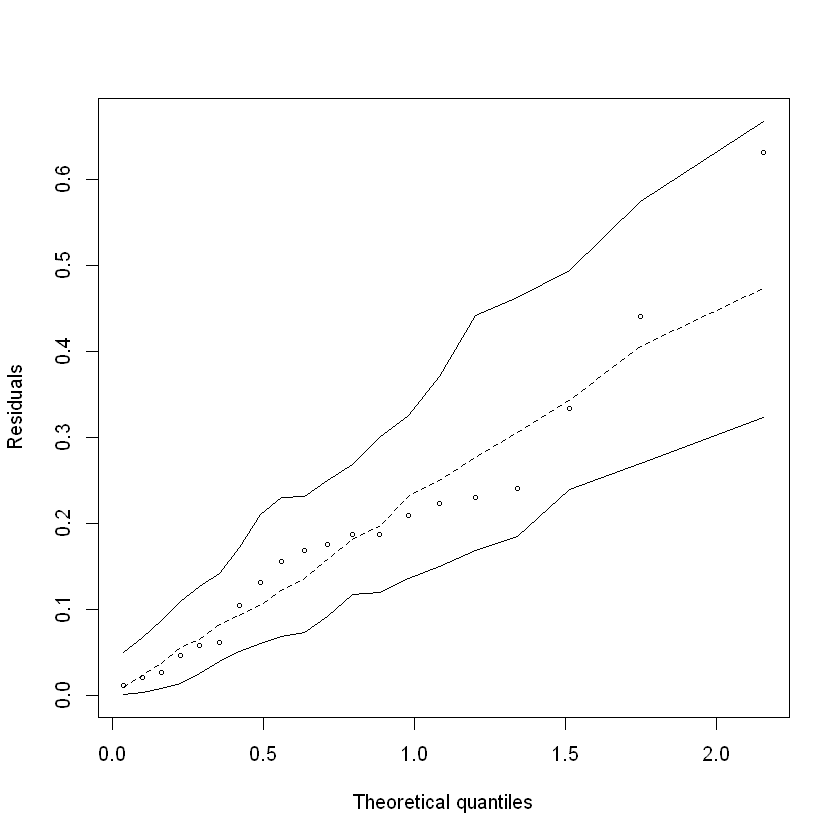

In [228]:
hnp(modelo4)

In [229]:
res_pearson=residuals(modelo4,type="pearson")
res_deviance=residuals(modelo4,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo4,type="pearson")/(sqrt(1-hatvalues(modelo4)))

In [230]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

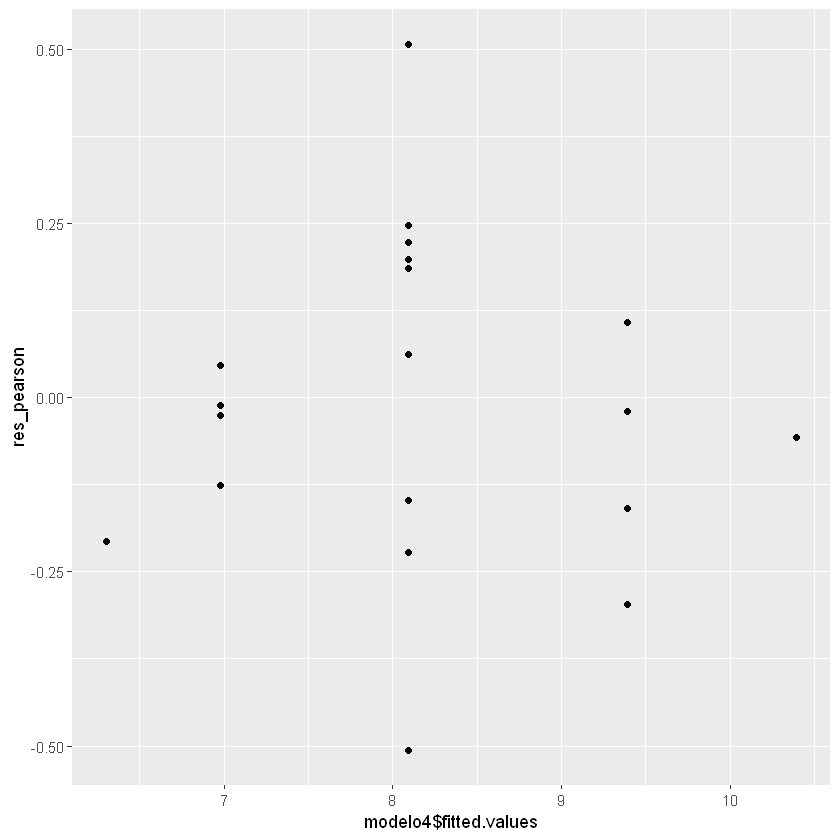

In [231]:
ggplot(grafico1)+aes(modelo4$fitted.values,res_pearson)+geom_point()

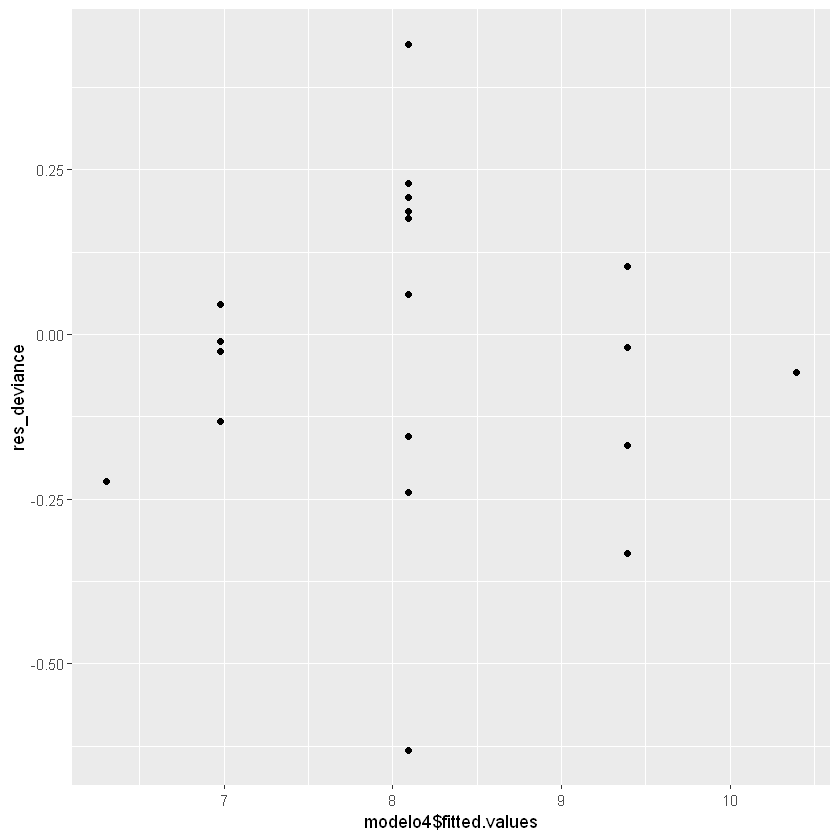

In [232]:
ggplot(grafico1)+aes(modelo4$fitted.values,res_deviance)+geom_point()

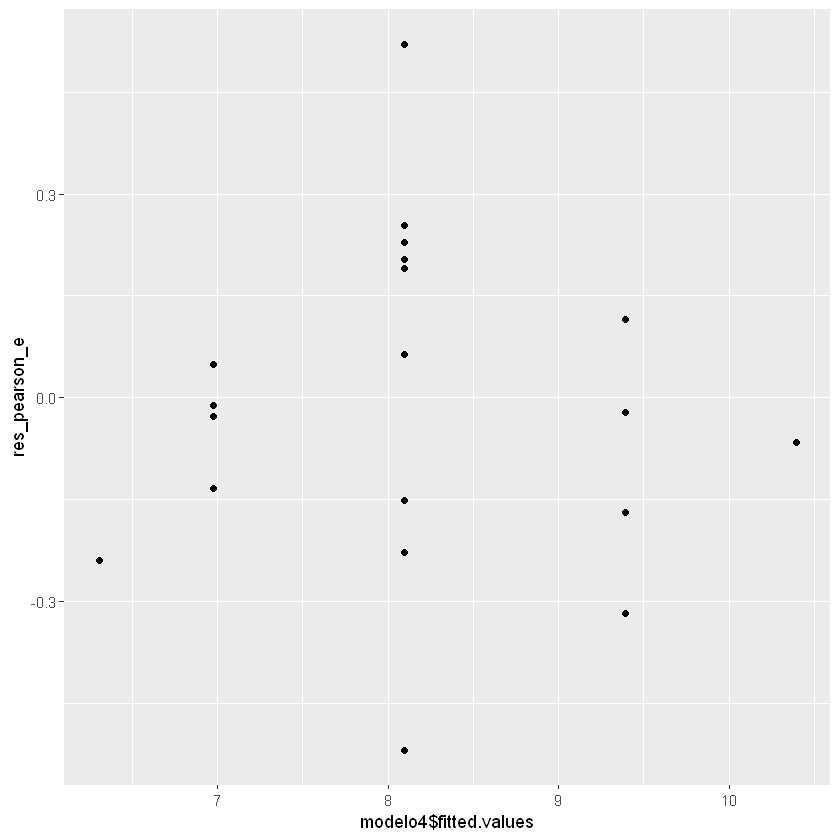

In [233]:
ggplot(grafico1)+aes(modelo4$fitted.values,res_pearson_e)+geom_point()

In [234]:
influence.measures(modelo4)

Influence measures of
	 glm(formula = y ~ x1, family = Gamma(link = "log"), data = dados) :

    dfb.1_    dfb.x1   dffit cov.r   cook.d   hat inf
1  -0.4620  4.30e-01 -0.5575 1.001 0.126935 0.123    
2   0.0124 -1.35e-02 -0.0176 1.278 0.000177 0.123    
3  -0.2225  2.07e-01 -0.2684 1.205 0.036198 0.123    
4   0.1474 -1.61e-01 -0.2089 1.233 0.022742 0.123    
5  -0.0266  2.47e-02 -0.0321 1.277 0.000587 0.123    
6   0.0285 -3.12e-02 -0.0404 1.277 0.000930 0.123    
7   0.1364 -1.27e-01  0.1646 1.250 0.016645 0.123    
8  -0.0506  5.53e-02  0.0718 1.273 0.003072 0.123    
9  -0.1465  1.40e-01 -0.1565 1.497 0.013607 0.257   *
10  0.5266 -5.56e-01 -0.6190 1.331 0.179260 0.257    
11 -0.0141 -2.90e-17 -0.1457 1.126 0.010826 0.050    
12 -0.0222 -1.58e-17 -0.2292 1.053 0.024436 0.050    
13 -0.0719 -6.75e-17 -0.7430 0.451 0.127236 0.050   *
14  0.0055  7.20e-18  0.0568 1.172 0.001941 0.050    
15  0.0211  3.73e-17  0.2185 1.064 0.030536 0.050    
16  0.0191  2.21e-17  0.1971 1.084 0.024750

In [235]:
#Possíveis pontos influentes são 9 e 13.
modelo4=glm(y~x1,data=dados[-9,],family = Gamma(link="log"));modelo4
summary(modelo4)


Call:  glm(formula = y ~ x1, family = Gamma(link = "log"), data = dados[-9, 
    ])

Coefficients:
(Intercept)           x1  
   3.446084    -0.005298  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    1.334 
Residual Deviance: 1.094 	AIC: 83.84


Call:
glm(formula = y ~ x1, family = Gamma(link = "log"), data = dados[-9, 
    ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.63405  -0.17033  -0.00458   0.17697   0.43588  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.446084   0.636336   5.416 4.64e-05 ***
x1          -0.005298   0.002460  -2.153   0.0459 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05820809)

    Null deviance: 1.3343  on 18  degrees of freedom
Residual deviance: 1.0935  on 17  degrees of freedom
AIC: 83.84

Number of Fisher Scoring iterations: 5


In [236]:
#Possíveis pontos influentes são 9 e 13.
modelo4=glm(y~x1,data=dados[-13,],family = Gamma(link="log"));modelo4
summary(modelo4)


Call:  glm(formula = y ~ x1, family = Gamma(link = "log"), data = dados[-13, 
    ])

Coefficients:
(Intercept)           x1  
   3.379378    -0.004949  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.9542 
Residual Deviance: 0.6868 	AIC: 76.73


Call:
glm(formula = y ~ x1, family = Gamma(link = "log"), data = dados[-13, 
    ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.35634  -0.16840  -0.03721   0.15334   0.41024  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.379378   0.467461   7.229 1.41e-06 ***
x1          -0.004949   0.001824  -2.713   0.0148 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.040929)

    Null deviance: 0.95423  on 18  degrees of freedom
Residual deviance: 0.68684  on 17  degrees of freedom
AIC: 76.728

Number of Fisher Scoring iterations: 4


# Modelo5- Distribuição Gama com função de ligação identidade

In [237]:
#Intercepto e b1 significativos.
modelo5=glm(y~.,data=dados,family = Gamma(link="identity"));modelo5
summary(modelo5)


Call:  glm(formula = y ~ ., family = Gamma(link = "identity"), data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
  19.428828    -0.043730     0.003596    -0.275714  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    1.373 
Residual Deviance: 1.066 	AIC: 90.84


Call:
glm(formula = y ~ ., family = Gamma(link = "identity"), data = dados)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6107  -0.1615   0.0056   0.1682   0.4294  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 19.428828   5.717877   3.398  0.00368 **
x1          -0.043730   0.017532  -2.494  0.02395 * 
x2           0.003596   0.059541   0.060  0.95259   
x3          -0.275714   0.943127  -0.292  0.77378   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.06040884)

    Null deviance: 1.3727  on 19  degrees of freedom
Residual deviance: 1.0657  on 16  degrees of freedom
AIC: 90.841

Number of Fisher Scoring iterations: 11


In [238]:
modelo5=step(modelo5,direction = "backward");modelo5
summary(modelo5)

Start:  AIC=90.84
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x2    1   1.0658 88.844
- x3    1   1.0688 88.893
<none>      1.0657 90.841
- x1    1   1.3694 93.868

Step:  AIC=88.84
y ~ x1 + x3

       Df Deviance    AIC
- x3    1   1.0691 86.900
<none>      1.0658 88.844
- x1    1   1.3710 92.209

Step:  AIC=86.9
y ~ x1

       Df Deviance    AIC
<none>      1.0691 86.905
- x1    1   1.3727 90.583



Call:  glm(formula = y ~ x1, family = Gamma(link = "identity"), data = dados)

Coefficients:
(Intercept)           x1  
   19.33364     -0.04381  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    1.373 
Residual Deviance: 1.069 	AIC: 86.9


Call:
glm(formula = y ~ x1, family = Gamma(link = "identity"), data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.63761  -0.16480   0.00031   0.16952   0.43077  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.33364    4.32688   4.468 0.000297 ***
x1          -0.04381    0.01645  -2.663 0.015833 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05346993)

    Null deviance: 1.3727  on 19  degrees of freedom
Residual deviance: 1.0691  on 18  degrees of freedom
AIC: 86.905

Number of Fisher Scoring iterations: 6


Gamma model 


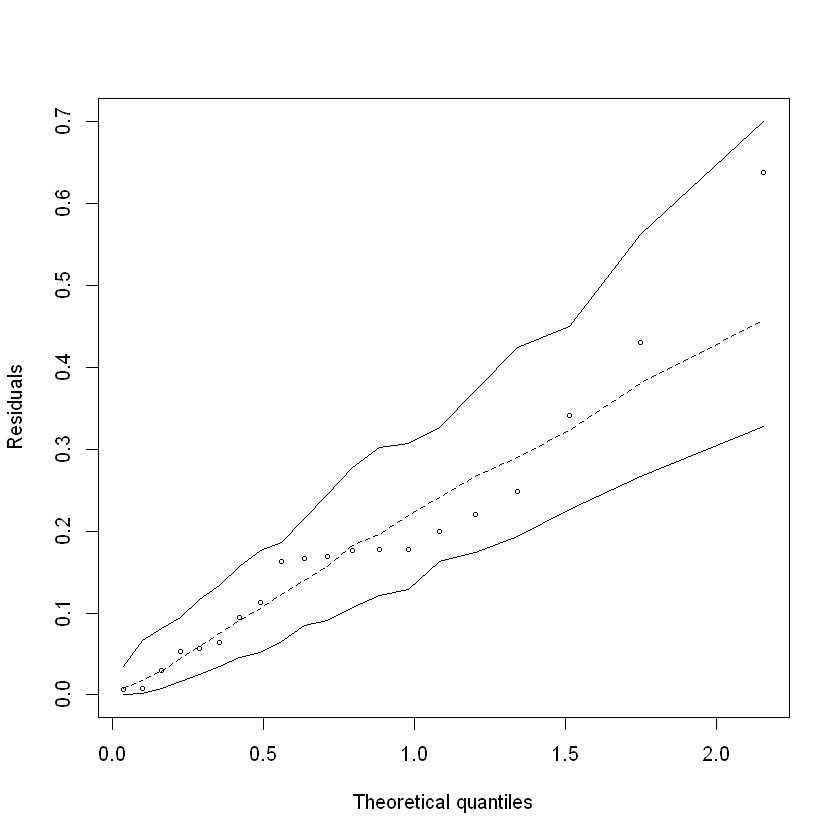

In [239]:
hnp(modelo5)

In [240]:
res_pearson=residuals(modelo5,type="pearson")
res_deviance=residuals(modelo5,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo5,type="pearson")/(sqrt(1-hatvalues(modelo5)))

In [241]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

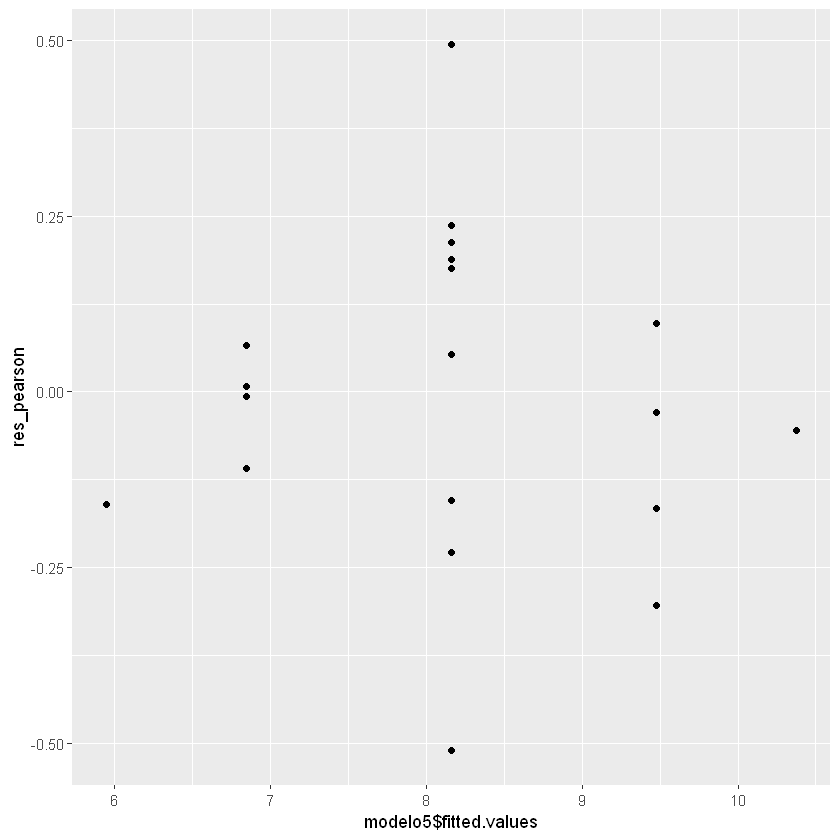

In [242]:
ggplot(grafico1)+aes(modelo5$fitted.values,res_pearson)+geom_point()

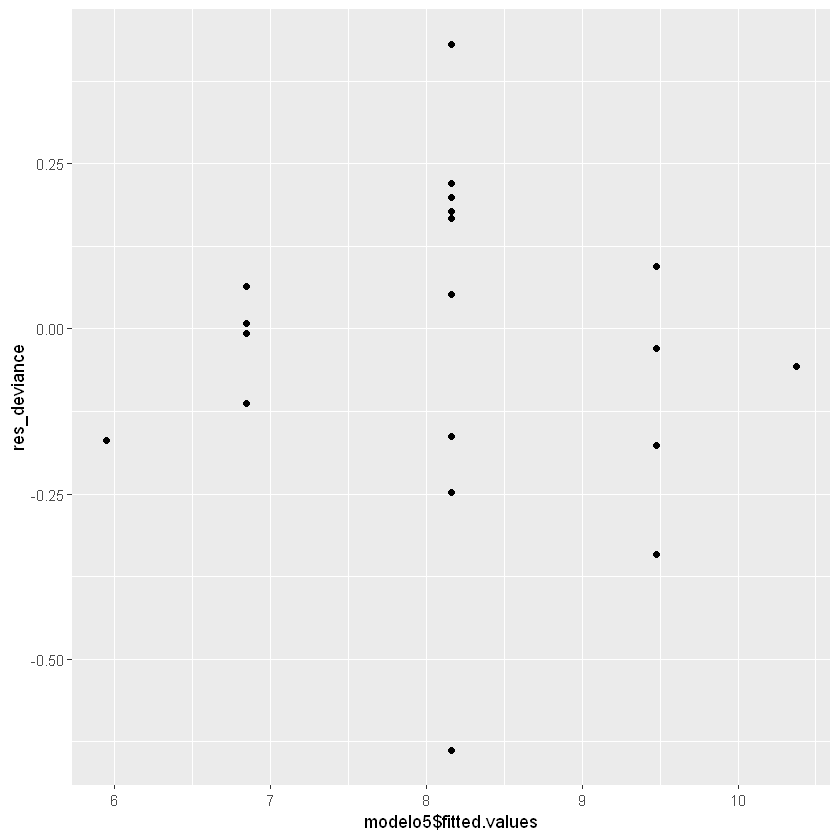

In [243]:
ggplot(grafico1)+aes(modelo5$fitted.values,res_deviance)+geom_point()

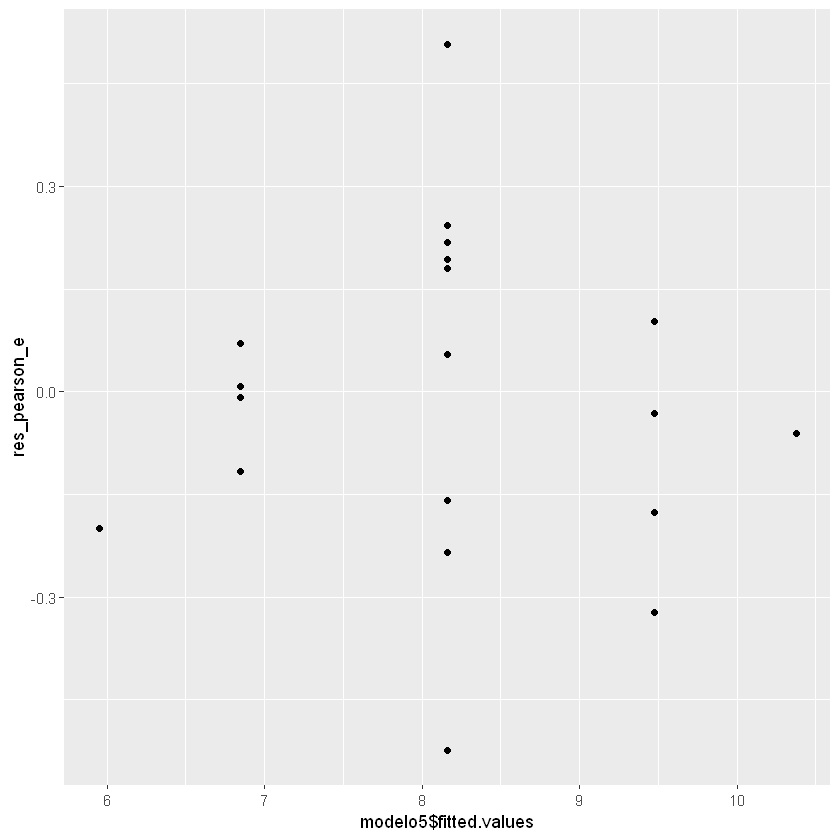

In [244]:
ggplot(grafico1)+aes(modelo5$fitted.values,res_pearson_e)+geom_point()

In [245]:
influence.measures(modelo5)

Influence measures of
	 glm(formula = y ~ x1, family = Gamma(link = "identity"), data = dados) :

     dfb.1_   dfb.x1   dffit cov.r   cook.d    hat inf
1  -0.47947  0.45247 -0.5463 0.972 1.22e-01 0.1117    
2  -0.00744  0.00833  0.0123 1.281 8.88e-05 0.1249    
3  -0.23637  0.22306 -0.2693 1.181 3.66e-02 0.1117    
4   0.11174 -0.12510 -0.1840 1.246 1.82e-02 0.1249    
5  -0.03879  0.03660 -0.0442 1.260 1.13e-03 0.1117    
6   0.00684 -0.00766 -0.0113 1.281 7.42e-05 0.1249    
7   0.12495 -0.11791  0.1424 1.238 1.26e-02 0.1117    
8  -0.06337  0.07095  0.1043 1.270 6.65e-03 0.1249    
9  -0.11266  0.10867 -0.1185 1.364 7.92e-03 0.1840   *
10  0.52912 -0.56214 -0.6475 1.611 2.11e-01 0.3611   *
11 -0.05579  0.04163 -0.1569 1.120 1.26e-02 0.0509    
12 -0.08630  0.06440 -0.2427 1.042 2.75e-02 0.0509    
13 -0.27750  0.20707 -0.7804 0.424 1.37e-01 0.0509   *
14  0.01779 -0.01327  0.0500 1.175 1.52e-03 0.0509    
15  0.07628 -0.05692  0.2145 1.070 2.98e-02 0.0509    
16  0.06856 -0.05116  

In [246]:
modelo5=glm(y~x1,data=dados[-9,],family = Gamma(link="identity"));modelo5
summary(modelo5)


Call:  glm(formula = y ~ x1, family = Gamma(link = "identity"), data = dados[-9, 
    ])

Coefficients:
(Intercept)           x1  
   19.94915     -0.04608  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    1.334 
Residual Deviance: 1.065 	AIC: 83.33


Call:
glm(formula = y ~ x1, family = Gamma(link = "identity"), data = dados[-9, 
    ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.64111  -0.16194   0.01238   0.16764   0.42575  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.94915    4.85589   4.108 0.000734 ***
x1          -0.04608    0.01833  -2.514 0.022285 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05586128)

    Null deviance: 1.3343  on 18  degrees of freedom
Residual deviance: 1.0651  on 17  degrees of freedom
AIC: 83.334

Number of Fisher Scoring iterations: 7


In [247]:
modelo5=glm(y~x1,data=dados[-10,],family = Gamma(link="identity"));modelo5
summary(modelo5)


Call:  glm(formula = y ~ x1, family = Gamma(link = "identity"), data = dados[-10, 
    ])

Coefficients:
(Intercept)           x1  
   16.71741     -0.03328  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    1.161 
Residual Deviance: 1.025 	AIC: 83.94


Call:
glm(formula = y ~ x1, family = Gamma(link = "identity"), data = dados[-10, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6443  -0.1586  -0.0032   0.1634   0.4211  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 16.71741    5.10042   3.278  0.00444 **
x1          -0.03328    0.01983  -1.679  0.11151   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05367115)

    Null deviance: 1.1608  on 18  degrees of freedom
Residual deviance: 1.0247  on 17  degrees of freedom
AIC: 83.939

Number of Fisher Scoring iterations: 5


In [248]:
modelo5=glm(y~x1,data=dados[-13,],family = Gamma(link="identity"));modelo5
summary(modelo5)


Call:  glm(formula = y ~ x1, family = Gamma(link = "identity"), data = dados[-13, 
    ])

Coefficients:
(Intercept)           x1  
    20.2172      -0.0464  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.9542 
Residual Deviance: 0.6488 	AIC: 75.64


Call:
glm(formula = y ~ x1, family = Gamma(link = "identity"), data = dados[-13, 
    ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.36892  -0.15872  -0.01354   0.14373   0.39981  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.21723    3.77269   5.359 5.21e-05 ***
x1          -0.04640    0.01431  -3.243  0.00479 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.03833689)

    Null deviance: 0.95423  on 18  degrees of freedom
Residual deviance: 0.64876  on 17  degrees of freedom
AIC: 75.638

Number of Fisher Scoring iterations: 7


# Modelo6- Distribuição Gama com função de ligação raíz quadrada

In [249]:
#Intercepto e b1 significativos.
modelo6=glm(y~.,data=dados,family = Gamma(link="sqrt"));modelo6
summary(modelo6)


Call:  glm(formula = y ~ ., family = Gamma(link = "sqrt"), data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
  4.7169915   -0.0073736    0.0008809   -0.0306811  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    1.373 
Residual Deviance: 1.082 	AIC: 91.15


Call:
glm(formula = y ~ ., family = Gamma(link = "sqrt"), data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.61697  -0.16043  -0.00286   0.17360   0.43521  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.7169915  1.0261306   4.597 0.000298 ***
x1          -0.0073736  0.0031755  -2.322 0.033750 *  
x2           0.0008809  0.0106920   0.082 0.935361    
x3          -0.0306811  0.1683031  -0.182 0.857640    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.0616501)

    Null deviance: 1.3727  on 19  degrees of freedom
Residual deviance: 1.0821  on 16  degrees of freedom
AIC: 91.15

Number of Fisher Scoring iterations: 8


In [250]:
modelo6=step(modelo6,direction = "backward");modelo6
summary(modelo6)

Start:  AIC=91.15
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x2    1   1.0825 89.156
- x3    1   1.0836 89.173
<none>      1.0821 91.150
- x1    1   1.3697 93.815

Step:  AIC=89.16
y ~ x1 + x3

       Df Deviance    AIC
- x3    1   1.0840 87.183
<none>      1.0825 89.156
- x1    1   1.3713 92.129

Step:  AIC=87.19
y ~ x1

       Df Deviance    AIC
<none>      1.0840 87.186
- x1    1   1.3727 90.468



Call:  glm(formula = y ~ x1, family = Gamma(link = "sqrt"), data = dados)

Coefficients:
(Intercept)           x1  
    4.73479     -0.00739  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    1.373 
Residual Deviance: 1.084 	AIC: 87.19


Call:
glm(formula = y ~ x1, family = Gamma(link = "sqrt"), data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.63398  -0.16252  -0.00879   0.17432   0.43599  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.734786   0.773214   6.124 8.76e-06 ***
x1          -0.007390   0.002981  -2.479   0.0233 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05464097)

    Null deviance: 1.3727  on 19  degrees of freedom
Residual deviance: 1.0840  on 18  degrees of freedom
AIC: 87.186

Number of Fisher Scoring iterations: 5


Gamma model 


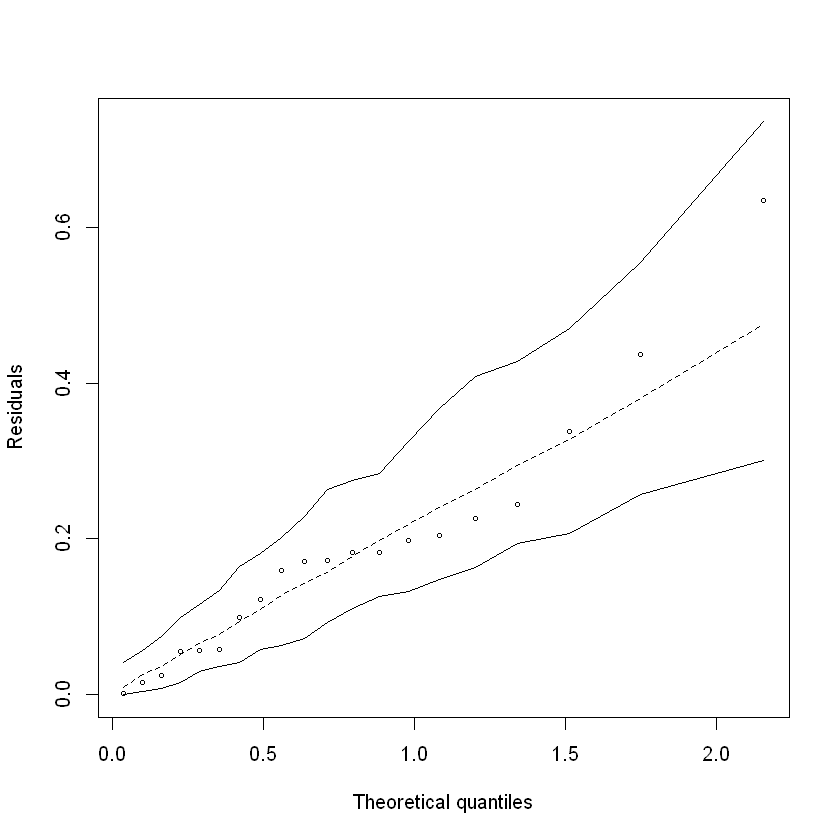

In [251]:
hnp(modelo6)

In [252]:
res_pearson=residuals(modelo6,type="pearson")
res_deviance=residuals(modelo6,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo6,type="pearson")/(sqrt(1-hatvalues(modelo6)))

In [253]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

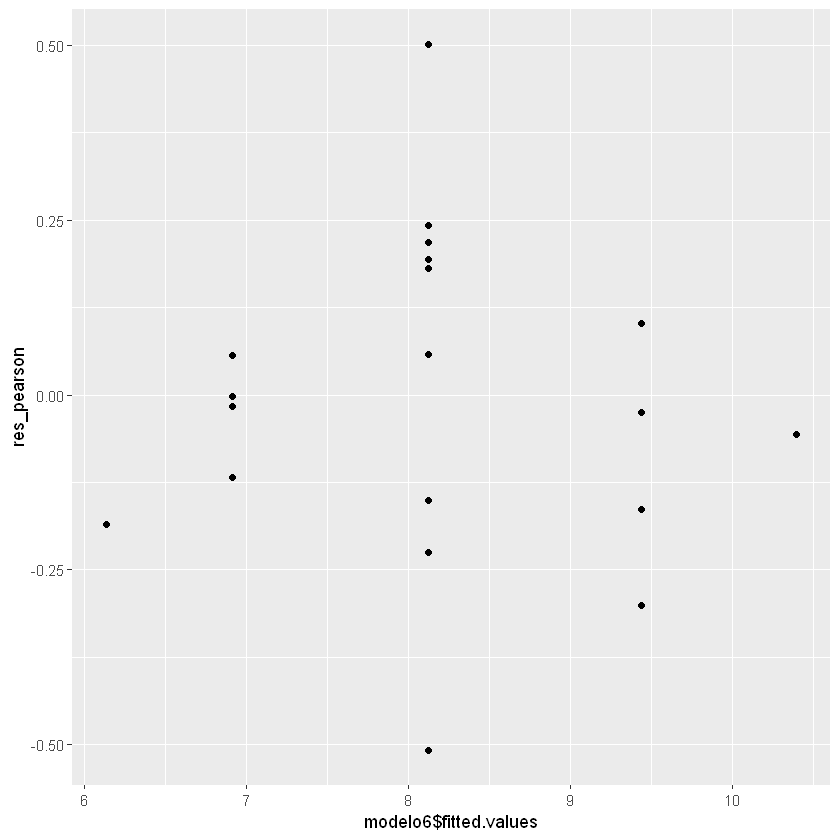

In [254]:
ggplot(grafico1)+aes(modelo6$fitted.values,res_pearson)+geom_point()

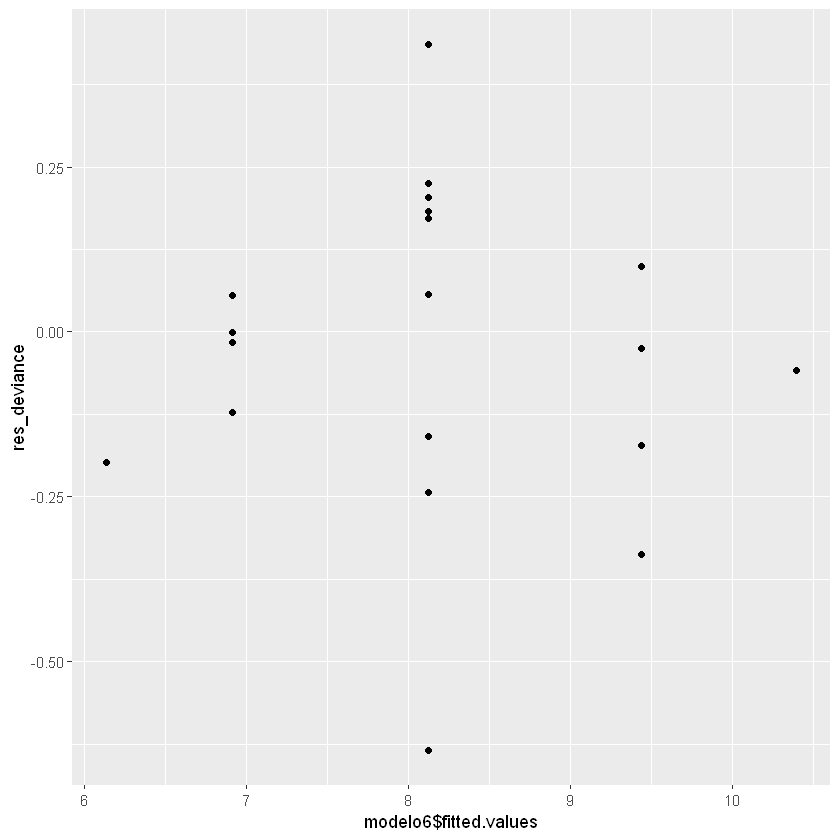

In [255]:
ggplot(grafico1)+aes(modelo6$fitted.values,res_deviance)+geom_point()

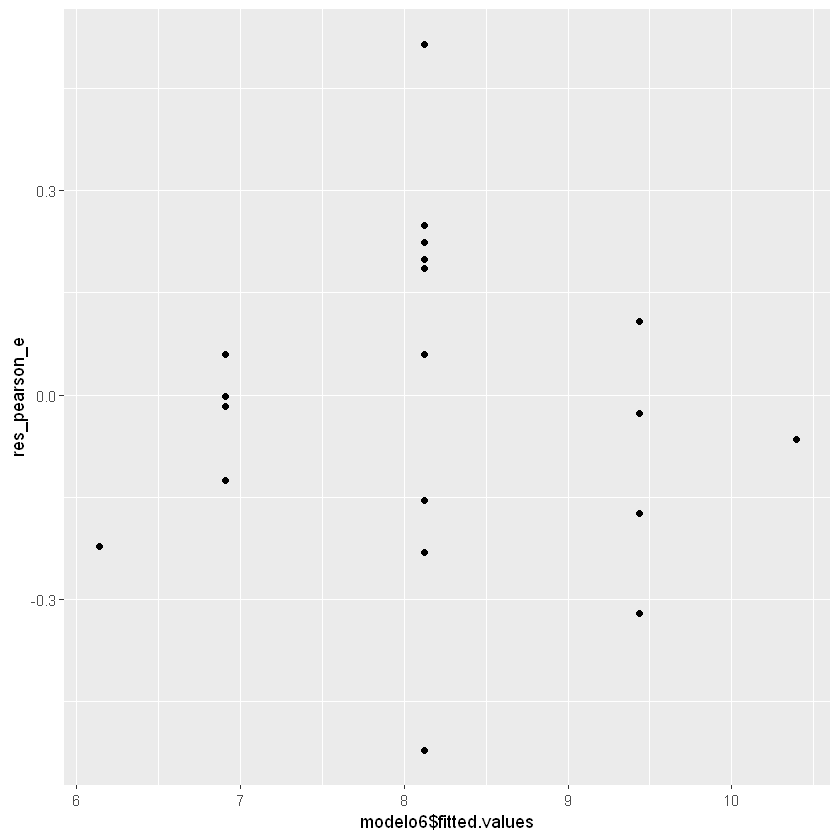

In [256]:
ggplot(grafico1)+aes(modelo6$fitted.values,res_pearson_e)+geom_point()

In [257]:
influence.measures(modelo6)

Influence measures of
	 glm(formula = y ~ x1, family = Gamma(link = "sqrt"), data = dados) :

     dfb.1_   dfb.x1    dffit cov.r   cook.d    hat inf
1  -0.47546  0.44560 -0.55639 0.987 1.26e-01 0.1185    
2   0.00161 -0.00178 -0.00242 1.282 3.42e-06 0.1256    
3  -0.23202  0.21745 -0.27151 1.194 3.71e-02 0.1185    
4   0.13141 -0.14494 -0.19767 1.242 2.07e-02 0.1256    
5  -0.03364  0.03152 -0.03936 1.270 8.88e-04 0.1185    
6   0.01714 -0.01891 -0.02579 1.281 3.84e-04 0.1256    
7   0.13107 -0.12284  0.15338 1.246 1.45e-02 0.1185    
8  -0.05914  0.06523  0.08896 1.274 4.78e-03 0.1256    
9  -0.13038  0.12540 -0.13816 1.424 1.07e-02 0.2192   *
10  0.53129 -0.56214 -0.63498 1.444 1.95e-01 0.3023   *
11 -0.03353  0.01933 -0.15050 1.123 1.16e-02 0.0502    
12 -0.05234  0.03018 -0.23490 1.048 2.57e-02 0.0502    
13 -0.16902  0.09744 -0.75855 0.439 1.31e-01 0.0502   *
14  0.01196 -0.00689  0.05366 1.173 1.74e-03 0.0502    
15  0.04820 -0.02779  0.21633 1.066 3.01e-02 0.0502    
16  0.0434

In [258]:
modelo6=glm(y~x1,data=dados[-9,],family = Gamma(link="sqrt"));modelo6
summary(modelo6)


Call:  glm(formula = y ~ x1, family = Gamma(link = "sqrt"), data = dados[-9, 
    ])

Coefficients:
(Intercept)           x1  
   4.857753    -0.007848  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    1.334 
Residual Deviance: 1.08 	AIC: 83.59


Call:
glm(formula = y ~ x1, family = Gamma(link = "sqrt"), data = dados[-9, 
    ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.63737  -0.17399   0.00437   0.17258   0.43112  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.857753   0.884197   5.494 3.95e-05 ***
x1          -0.007848   0.003381  -2.321   0.0329 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05707312)

    Null deviance: 1.3343  on 18  degrees of freedom
Residual deviance: 1.0796  on 17  degrees of freedom
AIC: 83.595

Number of Fisher Scoring iterations: 6


In [259]:
modelo6=glm(y~x1,data=dados[-10,],family = Gamma(link="sqrt"));modelo6
summary(modelo6)


Call:  glm(formula = y ~ x1, family = Gamma(link = "sqrt"), data = dados[-10, 
    ])

Coefficients:
(Intercept)           x1  
   4.290938    -0.005586  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    1.161 
Residual Deviance: 1.029 	AIC: 84.02


Call:
glm(formula = y ~ x1, family = Gamma(link = "sqrt"), data = dados[-10, 
    ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.64301  -0.15949  -0.00067   0.16512   0.42303  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.290938   0.878537   4.884  0.00014 ***
x1          -0.005586   0.003442  -1.623  0.12301    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05407864)

    Null deviance: 1.1608  on 18  degrees of freedom
Residual deviance: 1.0289  on 17  degrees of freedom
AIC: 84.018

Number of Fisher Scoring iterations: 4


In [260]:
modelo6=glm(y~x1,data=dados[-13,],family = Gamma(link="sqrt"));modelo6
summary(modelo6)


Call:  glm(formula = y ~ x1, family = Gamma(link = "sqrt"), data = dados[-13, 
    ])

Coefficients:
(Intercept)           x1  
   4.827322    -0.007603  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.9542 
Residual Deviance: 0.6687 	AIC: 76.22


Call:
glm(formula = y ~ x1, family = Gamma(link = "sqrt"), data = dados[-13, 
    ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.36304  -0.16459  -0.02531   0.14910   0.40564  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.827322   0.668872   7.217 1.44e-06 ***
x1          -0.007603   0.002576  -2.952  0.00892 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.03971709)

    Null deviance: 0.95423  on 18  degrees of freedom
Residual deviance: 0.66872  on 17  degrees of freedom
AIC: 76.217

Number of Fisher Scoring iterations: 6


# Modelo7- Distribuição Gama com função de ligação "1/mu^2"

In [261]:
#Nenhum parâmetro significativo
modelo7=glm(y~.,data=dados,family = Gamma(link="1/mu^2"));modelo7
summary(modelo7)


Call:  glm(formula = y ~ ., family = Gamma(link = "1/mu^2"), data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
 -1.288e-02    1.233e-04   -4.589e-05   -4.419e-04  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    1.373 
Residual Deviance: 1.14 	AIC: 92.2


Call:
glm(formula = y ~ ., family = Gamma(link = "1/mu^2"), data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.63486  -0.15926  -0.01187   0.18859   0.45149  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.288e-02  2.130e-02  -0.604   0.5541  
x1           1.233e-04  6.657e-05   1.853   0.0825 .
x2          -4.589e-05  2.314e-04  -0.198   0.8453  
x3          -4.419e-04  3.508e-03  -0.126   0.9013  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.06570899)

    Null deviance: 1.3727  on 19  degrees of freedom
Residual deviance: 1.1402  on 16  degrees of freedom
AIC: 92.204

Number of Fisher Scoring iterations: 7


In [262]:
modelo7=step(modelo7,direction = "backward");modelo7
summary(modelo7)

Start:  AIC=92.2
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x3    1   1.1414 90.223
- x2    1   1.1430 90.248
<none>      1.1402 92.204
- x1    1   1.3707 93.713

Step:  AIC=90.23
y ~ x1 + x2

       Df Deviance    AIC
- x2    1   1.1437 88.263
<none>      1.1414 90.226
- x1    1   1.3713 91.926

Step:  AIC=88.27
y ~ x1

       Df Deviance    AIC
<none>      1.1437 88.267
- x1    1   1.3727 90.160



Call:  glm(formula = y ~ x1, family = Gamma(link = "1/mu^2"), data = dados)

Coefficients:
(Intercept)           x1  
 -0.0156037    0.0001221  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    1.373 
Residual Deviance: 1.144 	AIC: 88.27


Call:
glm(formula = y ~ x1, family = Gamma(link = "1/mu^2"), data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.62381  -0.15119  -0.02106   0.18777   0.45060  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0156037  0.0154800  -1.008   0.3268  
x1           0.0001221  0.0000630   1.939   0.0684 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05881184)

    Null deviance: 1.3727  on 19  degrees of freedom
Residual deviance: 1.1437  on 18  degrees of freedom
AIC: 88.267

Number of Fisher Scoring iterations: 5


Gamma model 


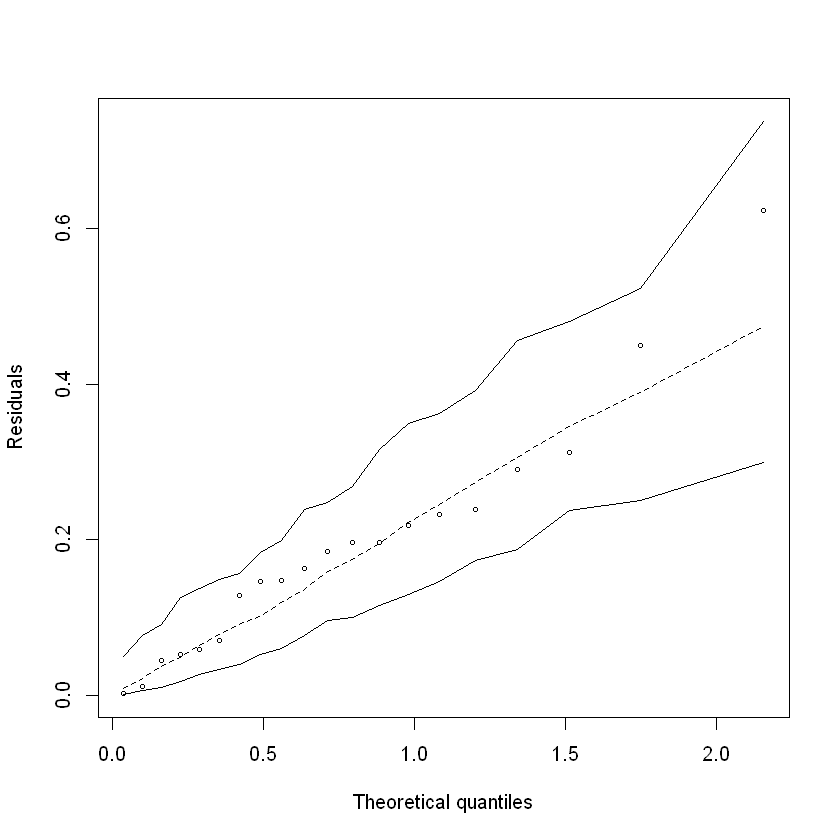

In [263]:
hnp(modelo7)

In [264]:
res_pearson=residuals(modelo7,type="pearson")
res_deviance=residuals(modelo7,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo7,type="pearson")/(sqrt(1-hatvalues(modelo7)))

In [265]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

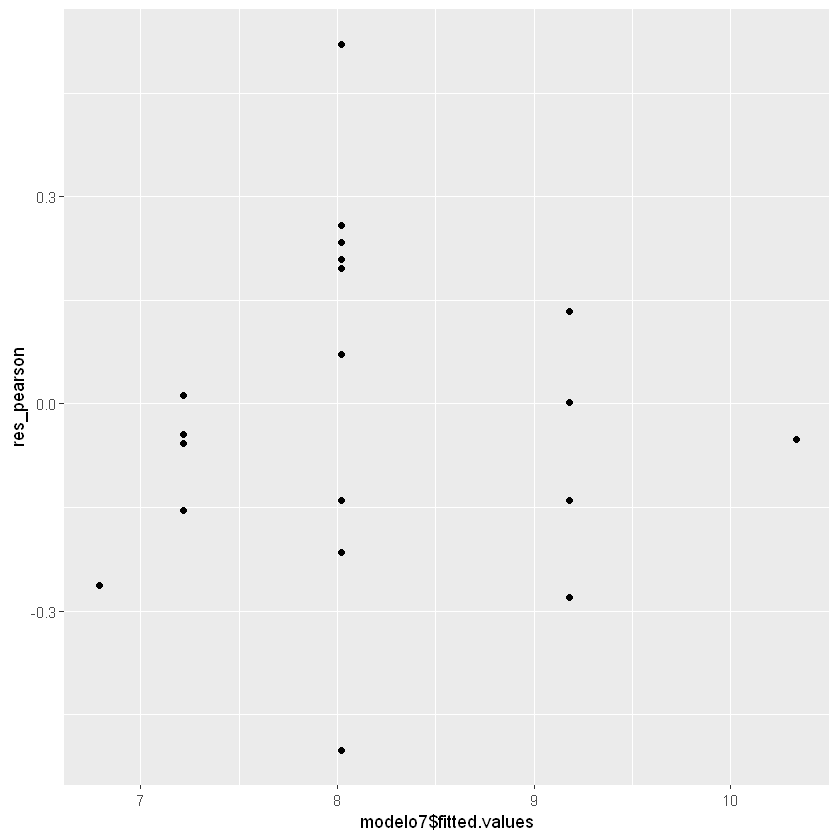

In [266]:
ggplot(grafico1)+aes(modelo7$fitted.values,res_pearson)+geom_point()

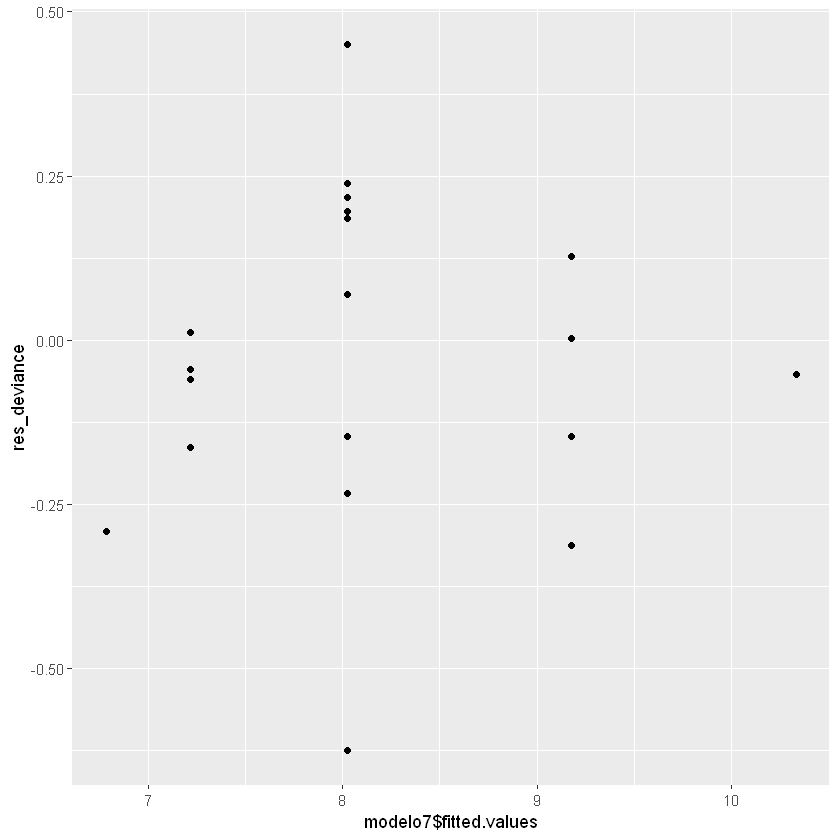

In [267]:
ggplot(grafico1)+aes(modelo7$fitted.values,res_deviance)+geom_point()

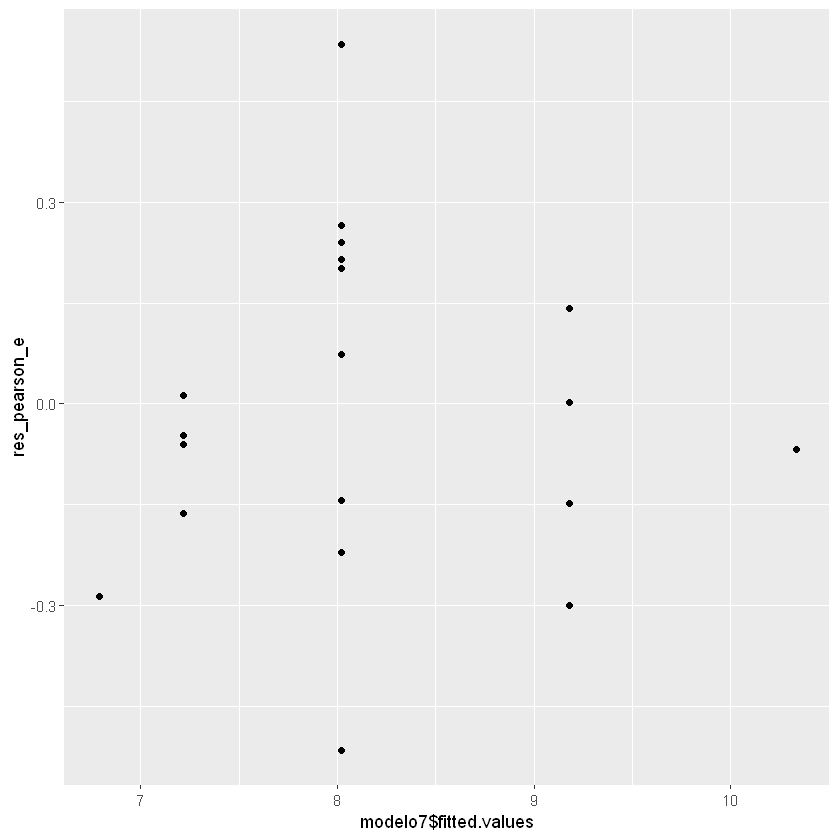

In [268]:
ggplot(grafico1)+aes(modelo7$fitted.values,res_pearson_e)+geom_point()

In [269]:
influence.measures(modelo7)

Influence measures of
	 glm(formula = y ~ x1, family = Gamma(link = "1/mu^2"), data = dados) :

     dfb.1_   dfb.x1    dffit cov.r   cook.d    hat inf
1  -0.34556  0.30675 -0.50071 1.039 1.05e-01 0.1206    
2   0.04906 -0.05267 -0.06193 1.246 2.13e-03 0.1041    
3  -0.15530  0.13786 -0.22504 1.221 2.57e-02 0.1206    
4   0.18226 -0.19564 -0.23006 1.187 2.64e-02 0.1041    
5   0.00258 -0.00229  0.00373 1.275 7.99e-06 0.1206    
6   0.06491 -0.06967 -0.08193 1.243 3.68e-03 0.1041    
7   0.13529 -0.12009  0.19603 1.234 2.35e-02 0.1206    
8  -0.01262  0.01354  0.01592 1.251 1.46e-04 0.1041    
9  -0.20701  0.19550 -0.23086 1.942 2.93e-02 0.4276   *
10  0.48434 -0.50832 -0.54958 1.106 1.29e-01 0.1560    
11  0.04007 -0.05328 -0.13744 1.136 9.59e-03 0.0518    
12  0.06430 -0.08550 -0.22055 1.068 2.26e-02 0.0518    
13  0.21012 -0.27942 -0.72076 0.486 1.23e-01 0.0518   *
14 -0.01900  0.02527  0.06518 1.172 2.53e-03 0.0518    
15 -0.06636  0.08824  0.22762 1.061 3.28e-02 0.0518    
16 -0.06

In [270]:
modelo7=glm(y~x1,data=dados[-9,],family = Gamma(link="1/mu^2"));modelo7
summary(modelo7)


Call:  glm(formula = y ~ x1, family = Gamma(link = "1/mu^2"), data = dados[-9, 
    ])

Coefficients:
(Intercept)           x1  
 -0.0186060    0.0001336  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    1.334 
Residual Deviance: 1.139 	AIC: 84.62


Call:
glm(formula = y ~ x1, family = Gamma(link = "1/mu^2"), data = dados[-9, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6255  -0.1598  -0.0151   0.1883   0.4482  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.861e-02  1.985e-02  -0.937    0.362
x1           1.336e-04  7.937e-05   1.684    0.110

(Dispersion parameter for Gamma family taken to be 0.06167371)

    Null deviance: 1.3343  on 18  degrees of freedom
Residual deviance: 1.1392  on 17  degrees of freedom
AIC: 84.624

Number of Fisher Scoring iterations: 5


In [271]:
modelo7=glm(y~x1,data=dados[-13,],family = Gamma(link="1/mu^2"));modelo7
summary(modelo7)


Call:  glm(formula = y ~ x1, family = Gamma(link = "1/mu^2"), data = dados[-13, 
    ])

Coefficients:
(Intercept)           x1  
 -0.0136128    0.0001111  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.9542 
Residual Deviance: 0.7411 	AIC: 78.18


Call:
glm(formula = y ~ x1, family = Gamma(link = "1/mu^2"), data = dados[-13, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3311  -0.1693  -0.0192   0.1620   0.4197  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.361e-02  1.286e-02  -1.059   0.3045  
x1           1.111e-04  5.231e-05   2.124   0.0486 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.0442556)

    Null deviance: 0.95423  on 18  degrees of freedom
Residual deviance: 0.74113  on 17  degrees of freedom
AIC: 78.182

Number of Fisher Scoring iterations: 5


# Modelo8- Distribuição Normal Inversa com função de ligação "1/mu^2"

In [272]:
#b1 significato a 10%
modelo8=glm(y~.,data=dados,family = inverse.gaussian);modelo8
summary(modelo8)


Call:  glm(formula = y ~ ., family = inverse.gaussian, data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
 -1.611e-02    1.328e-04   -3.649e-05   -1.282e-04  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    0.1862 
Residual Deviance: 0.1556 	AIC: 93.46


Call:
glm(formula = y ~ ., family = inverse.gaussian, data = dados)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.251100  -0.057625  -0.004089   0.065374   0.150199  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.611e-02  2.181e-02  -0.738   0.4709  
x1           1.328e-04  6.812e-05   1.950   0.0689 .
x2          -3.649e-05  2.358e-04  -0.155   0.8790  
x3          -1.282e-04  3.610e-03  -0.036   0.9721  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.008265978)

    Null deviance: 0.18618  on 19  degrees of freedom
Residual deviance: 0.15561  on 16  degrees of freedom
AIC: 93.457

Number of Fisher Scoring iterations: 5


In [273]:
modelo8=step(modelo8,direction = "backward");modelo8
summary(modelo8)

Start:  AIC=93.46
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x3    1  0.15562 91.458
- x2    1  0.15581 91.481
<none>     0.15561 93.457
- x1    1  0.18591 95.122

Step:  AIC=91.46
y ~ x1 + x2

       Df Deviance    AIC
- x2    1  0.15581 89.483
<none>     0.15562 91.458
- x1    1  0.18599 93.356

Step:  AIC=89.48
y ~ x1

       Df Deviance    AIC
<none>     0.15581 89.483
- x1    1  0.18618 91.603



Call:  glm(formula = y ~ x1, family = inverse.gaussian, data = dados)

Coefficients:
(Intercept)           x1  
 -0.0182284    0.0001327  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    0.1862 
Residual Deviance: 0.1558 	AIC: 89.48


Call:
glm(formula = y ~ x1, family = inverse.gaussian, data = dados)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.250122  -0.054314  -0.007818   0.065281   0.150094  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.823e-02  1.591e-02  -1.146   0.2668  
x1           1.327e-04  6.422e-05   2.066   0.0535 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.00737124)

    Null deviance: 0.18618  on 19  degrees of freedom
Residual deviance: 0.15581  on 18  degrees of freedom
AIC: 89.483

Number of Fisher Scoring iterations: 5


Inverse gaussian model 


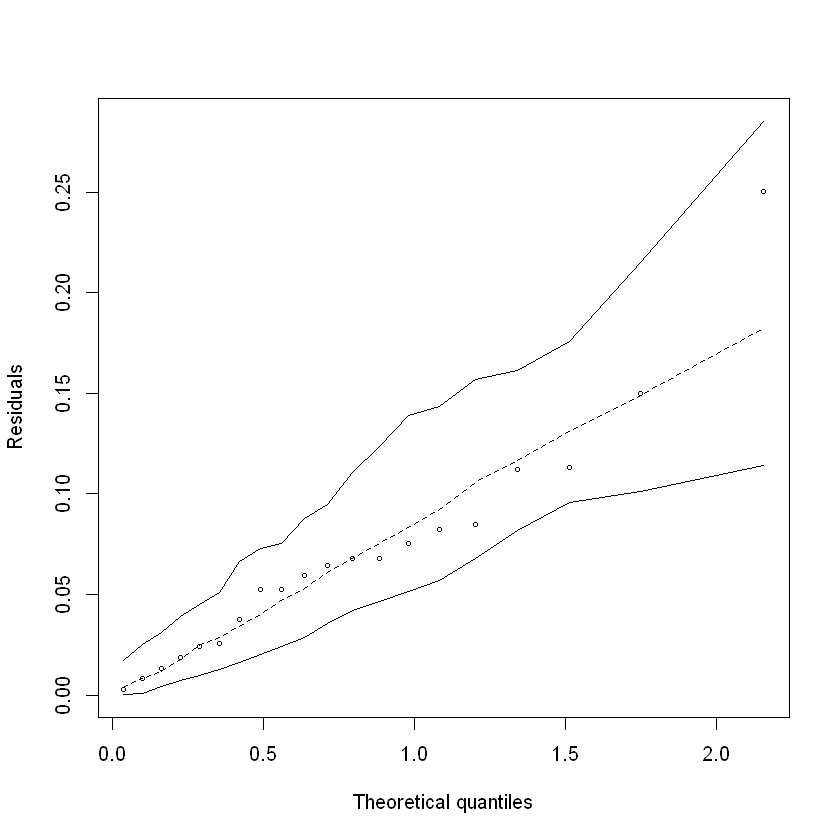

In [274]:
hnp(modelo8)

In [275]:
res_pearson=residuals(modelo8,type="pearson")
res_deviance=residuals(modelo8,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo8,type="pearson")/(sqrt(1-hatvalues(modelo8)))

In [276]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

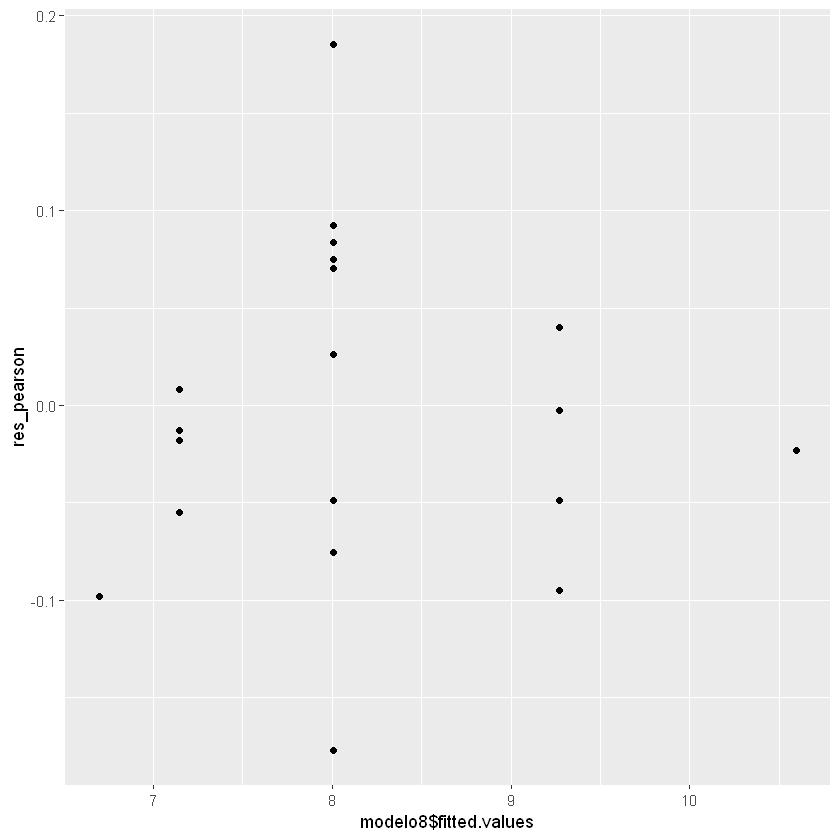

In [277]:
ggplot(grafico1)+aes(modelo8$fitted.values,res_pearson)+geom_point()

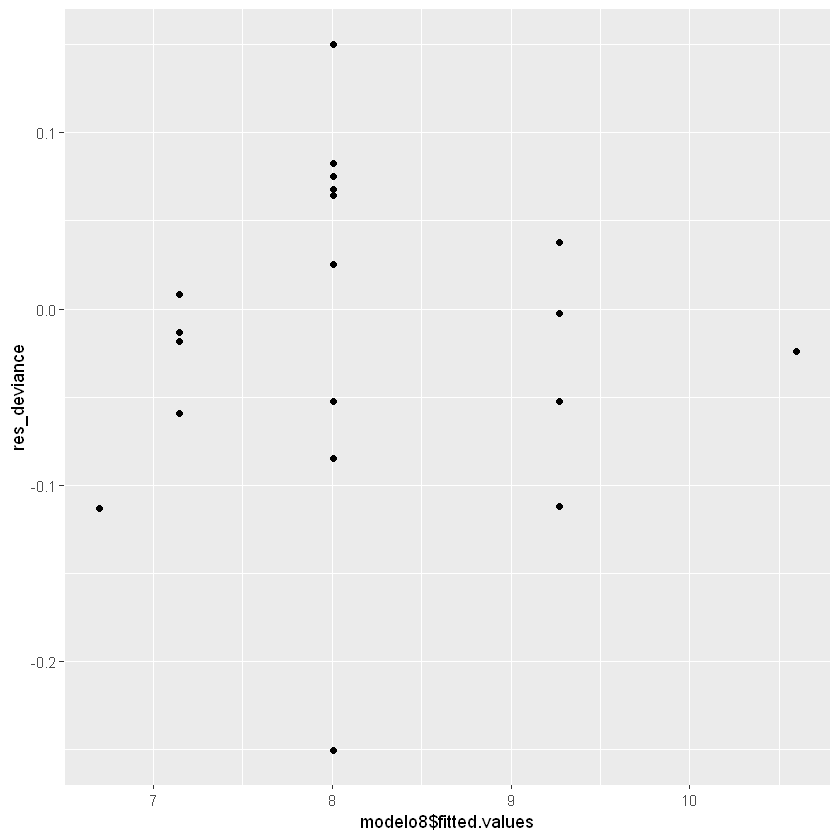

In [278]:
ggplot(grafico1)+aes(modelo8$fitted.values,res_deviance)+geom_point()

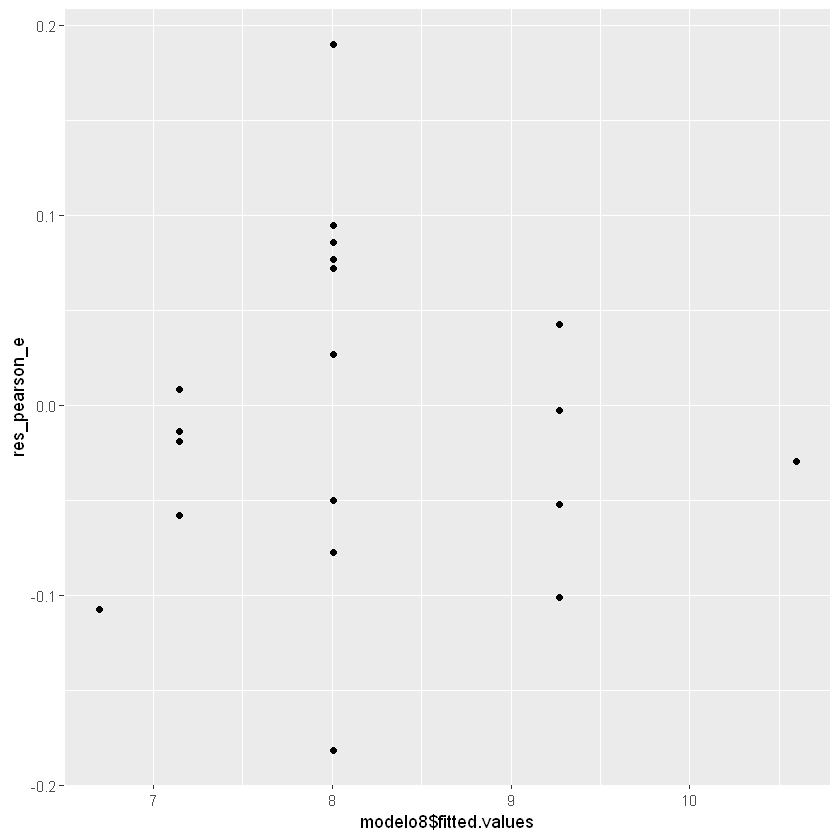

In [279]:
ggplot(grafico1)+aes(modelo8$fitted.values,res_pearson_e)+geom_point()

In [280]:
influence.measures(modelo8)

Influence measures of
	 glm(formula = y ~ x1, family = inverse.gaussian, data = dados) :

     dfb.1_  dfb.x1   dffit cov.r   cook.d    hat inf
1  -0.35291  0.3167 -0.4890 1.053 9.61e-02 0.1219    
2   0.03909 -0.0421 -0.0503 1.254 1.52e-03 0.1084    
3  -0.15952  0.1431 -0.2211 1.225 2.54e-02 0.1219    
4   0.17976 -0.1936 -0.2312 1.195 2.77e-02 0.1084    
5  -0.00781  0.0070 -0.0108 1.277 7.22e-05 0.1219    
6   0.05551 -0.0598 -0.0714 1.251 3.01e-03 0.1084    
7   0.11350 -0.1018  0.1573 1.250 1.71e-02 0.1219    
8  -0.02415  0.0260  0.0311 1.256 6.13e-04 0.1084    
9  -0.23793  0.2253 -0.2629 1.839 3.95e-02 0.3977   *
10  0.54904 -0.5771 -0.6273 1.100 1.65e-01 0.1732    
11  0.02958 -0.0425 -0.1315 1.138 9.09e-03 0.0508    
12  0.04853 -0.0697 -0.2157 1.069 2.17e-02 0.0508    
13  0.18379 -0.2638 -0.8168 0.393 1.20e-01 0.0508   *
14 -0.01421  0.0204  0.0631 1.171 2.65e-03 0.0508    
15 -0.04709  0.0676  0.2093 1.075 3.28e-02 0.0508    
16 -0.04285  0.0615  0.1905 1.092 2.68e-02 0.0

In [281]:
modelo8=glm(y~x1,data=dados[-9,],family = inverse.gaussian);modelo8
summary(modelo8)


Call:  glm(formula = y ~ x1, family = inverse.gaussian, data = dados[-9, 
    ])

Coefficients:
(Intercept)           x1  
 -0.0222031    0.0001479  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1817 
Residual Deviance: 0.1549 	AIC: 85.51


Call:
glm(formula = y ~ x1, family = inverse.gaussian, data = dados[-9, 
    ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.250879  -0.057985  -0.009648   0.065025   0.148772  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -2.220e-02  1.991e-02  -1.115   0.2804  
x1           1.479e-04  7.918e-05   1.868   0.0791 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.007669311)

    Null deviance: 0.18173  on 18  degrees of freedom
Residual deviance: 0.15489  on 17  degrees of freedom
AIC: 85.515

Number of Fisher Scoring iterations: 5


In [282]:
modelo8=glm(y~x1,data=dados[-13,],family = inverse.gaussian);modelo8
summary(modelo8)


Call:  glm(formula = y ~ x1, family = inverse.gaussian, data = dados[-13, 
    ])

Coefficients:
(Intercept)           x1  
  -0.016571     0.000123  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1197 
Residual Deviance: 0.09162 	AIC: 78.23


Call:
glm(formula = y ~ x1, family = inverse.gaussian, data = dados[-13, 
    ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.123019  -0.060261  -0.009913   0.056081   0.138716  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.657e-02  1.318e-02  -1.257   0.2257  
x1           1.231e-04  5.324e-05   2.311   0.0336 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.005422201)

    Null deviance: 0.119731  on 18  degrees of freedom
Residual deviance: 0.091621  on 17  degrees of freedom
AIC: 78.227

Number of Fisher Scoring iterations: 5


# Modelo9- Distribuição Normal Inversa com função de ligação identidade

In [283]:
#b0 e b1 significativos.
modelo9=glm(y~.,data=dados,family = inverse.gaussian(link="identity"));modelo9
summary(modelo9)


Call:  glm(formula = y ~ ., family = inverse.gaussian(link = "identity"), 
    data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
  21.112726    -0.048312     0.001527    -0.594002  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    0.1862 
Residual Deviance: 0.1425 	AIC: 91.7


Call:
glm(formula = y ~ ., family = inverse.gaussian(link = "identity"), 
    data = dados)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.237662  -0.060437   0.006107   0.054921   0.138431  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 21.112726   5.548828   3.805  0.00156 **
x1          -0.048312   0.016877  -2.863  0.01128 * 
x2           0.001527   0.057674   0.026  0.97920   
x3          -0.594002   0.917834  -0.647  0.52669   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.007295414)

    Null deviance: 0.18618  on 19  degrees of freedom
Residual deviance: 0.14253  on 16  degrees of freedom
AIC: 91.701

Number of Fisher Scoring iterations: 15


In [284]:
modelo9=step(modelo9,direction = "backward");modelo9
summary(modelo9)

Start:  AIC=91.7
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x2    1  0.14253 89.701
- x3    1  0.14386 89.883
<none>     0.14253 91.701
- x1    1  0.18563 95.609

Step:  AIC=89.7
y ~ x1 + x3

       Df Deviance    AIC
- x3    1  0.14386 87.894
<none>     0.14253 89.701
- x1    1  0.18588 94.014

Step:  AIC=87.89
y ~ x1

       Df Deviance    AIC
<none>     0.14386 87.887
- x1    1  0.18618 92.494



Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "identity"), 
    data = dados)

Coefficients:
(Intercept)           x1  
   20.55100     -0.04846  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    0.1862 
Residual Deviance: 0.1439 	AIC: 87.89


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "identity"), 
    data = dados)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.255931  -0.058646   0.006186   0.056270   0.139949  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.55100    4.22254   4.867 0.000124 ***
x1          -0.04846    0.01577  -3.072 0.006569 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.00640571)

    Null deviance: 0.18618  on 19  degrees of freedom
Residual deviance: 0.14386  on 18  degrees of freedom
AIC: 87.887

Number of Fisher Scoring iterations: 8


Inverse gaussian model 


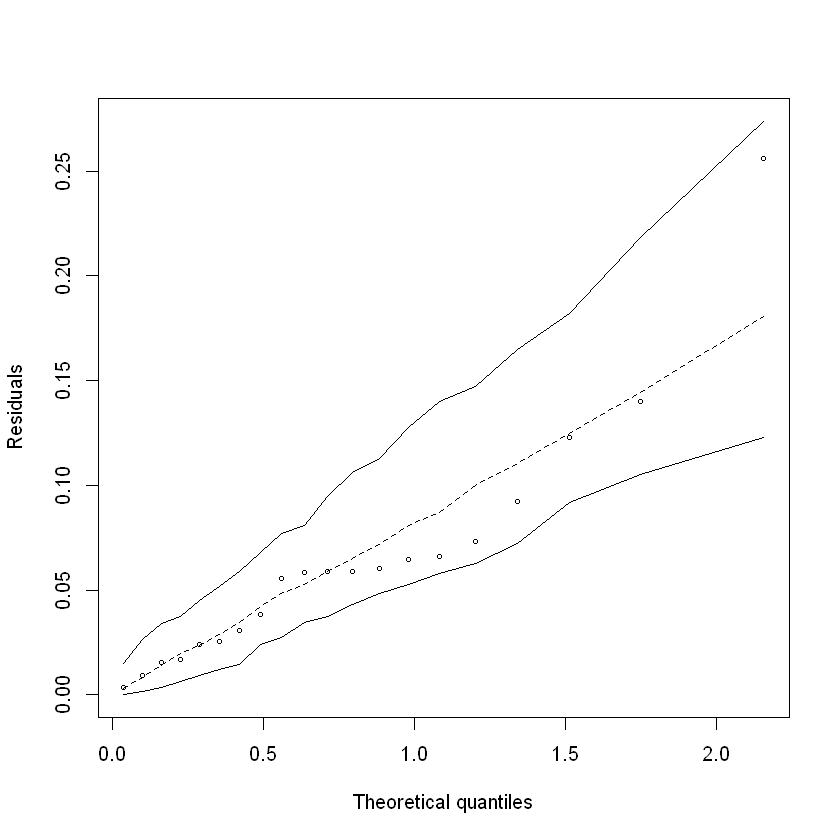

In [285]:
hnp(modelo9)

In [286]:
res_pearson=residuals(modelo9,type="pearson")
res_deviance=residuals(modelo9,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo9,type="pearson")/(sqrt(1-hatvalues(modelo9)))

In [287]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

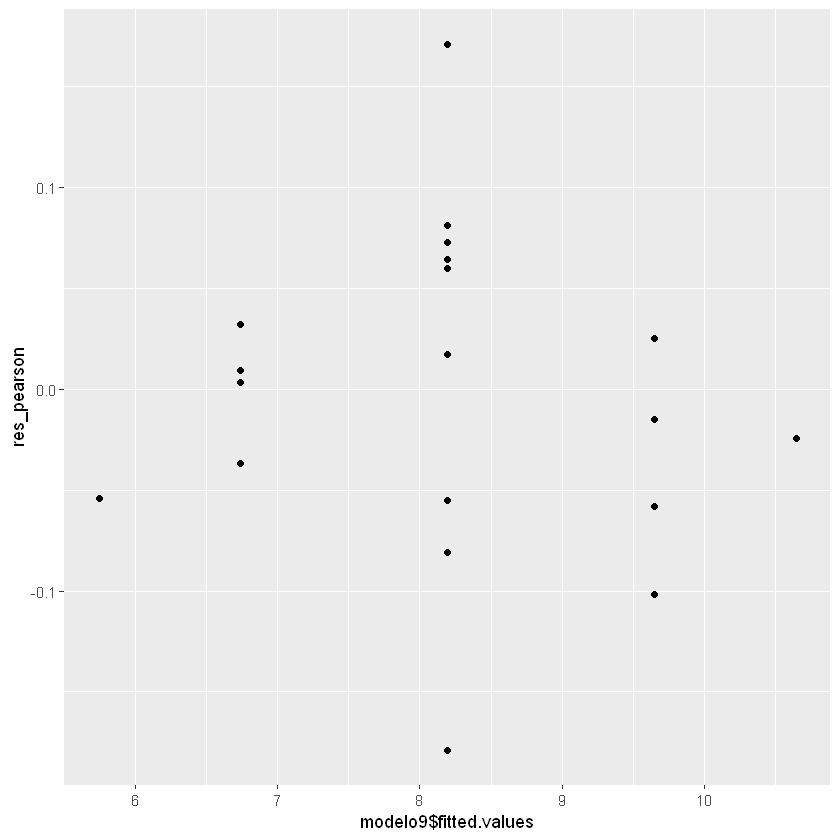

In [288]:
ggplot(grafico1)+aes(modelo9$fitted.values,res_pearson)+geom_point()

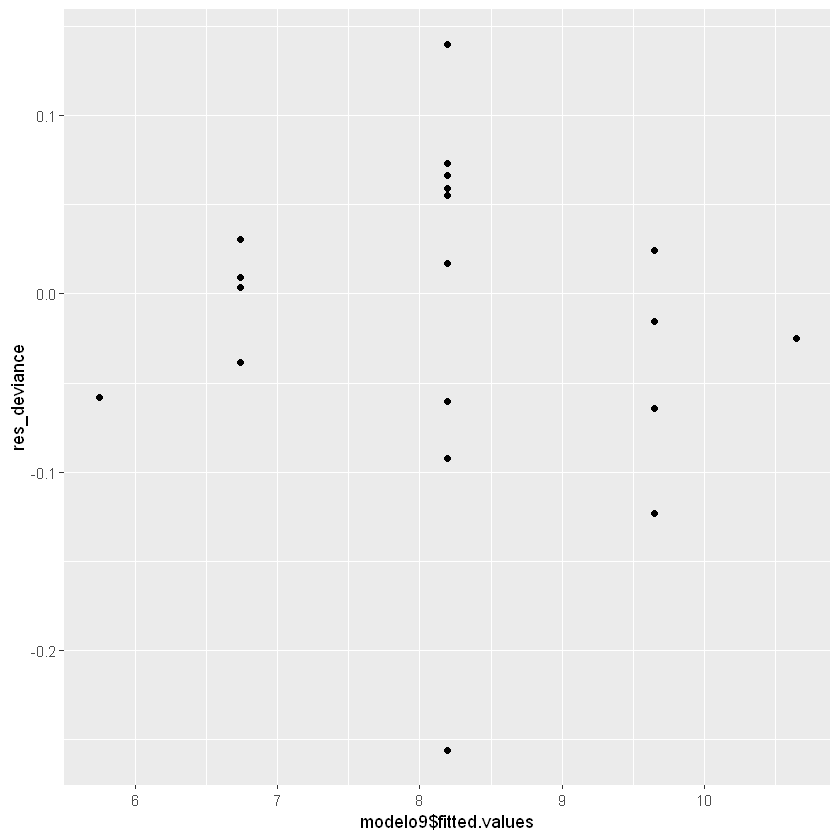

In [289]:
ggplot(grafico1)+aes(modelo9$fitted.values,res_deviance)+geom_point()

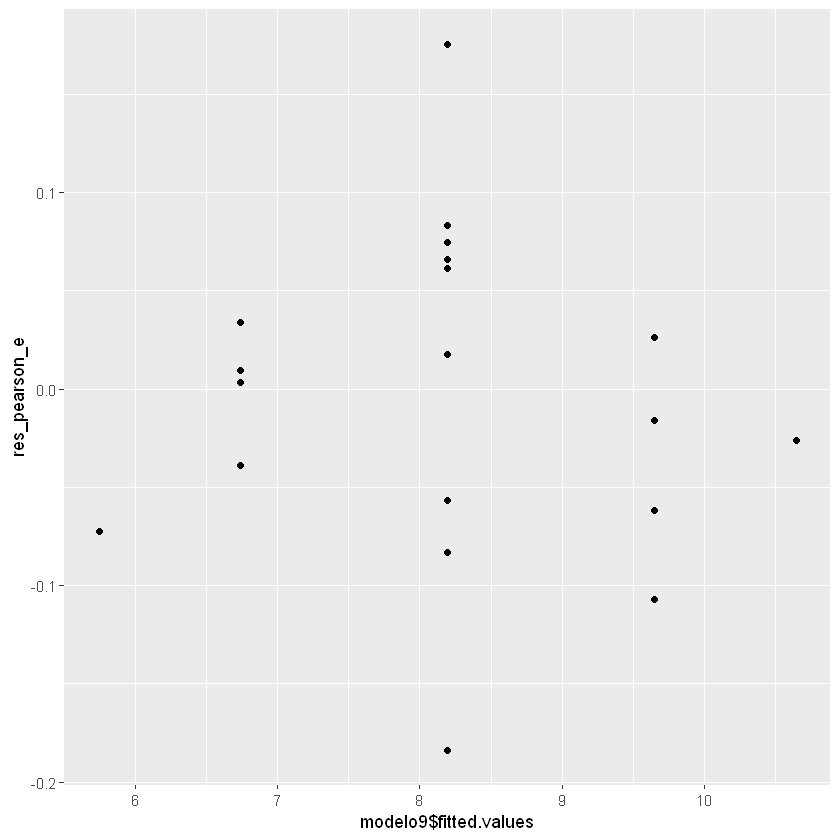

In [290]:
ggplot(grafico1)+aes(modelo9$fitted.values,res_pearson_e)+geom_point()

In [291]:
influence.measures(modelo9)

Influence measures of
	 glm(formula = y ~ x1, family = inverse.gaussian(link = "identity"),      data = dados) :

     dfb.1_   dfb.x1   dffit cov.r   cook.d    hat inf
1  -0.45455  0.43245 -0.5038 0.973 0.101260 0.1013    
2  -0.02016  0.02315  0.0388 1.274 0.001017 0.1213    
3  -0.22759  0.21653 -0.2522 1.169 0.033305 0.1013    
4   0.08671 -0.09955 -0.1668 1.246 0.016442 0.1213    
5  -0.05324  0.05065 -0.0590 1.243 0.002189 0.1013    
6  -0.00756  0.00868  0.0145 1.276 0.000141 0.1213    
7   0.08412 -0.08004  0.0932 1.236 0.006161 0.1013    
8  -0.06905  0.07928  0.1329 1.257 0.012531 0.1213    
9  -0.11699  0.11328 -0.1220 1.296 0.009008 0.1439    
10  0.59817 -0.63865 -0.7573 1.827 0.315783 0.4366   *
11 -0.08107  0.06784 -0.1609 1.122 0.014016 0.0529    
12 -0.12652  0.10586 -0.2511 1.041 0.030022 0.0529    
13 -0.47243  0.39530 -0.9376 0.319 0.147174 0.0529   *
14  0.02247 -0.01881  0.0446 1.179 0.001376 0.0529    
15  0.09930 -0.08309  0.1971 1.093 0.030378 0.0529    
16  0.

In [292]:
modelo9=glm(y~x1,data=dados[-10,],family = inverse.gaussian(link="identity"));modelo9
summary(modelo9)


Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "identity"), 
    data = dados[-10, ])

Coefficients:
(Intercept)           x1  
    17.3134      -0.0356  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1554 
Residual Deviance: 0.1379 	AIC: 85.32


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "identity"), 
    data = dados[-10, ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.257111  -0.056934  -0.003627   0.055346   0.137889  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 17.31337    5.15545   3.358  0.00373 **
x1          -0.03560    0.01986  -1.793  0.09085 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.006437037)

    Null deviance: 0.15536  on 18  degrees of freedom
Residual deviance: 0.13786  on 17  degrees of freedom
AIC: 85.32

Number of Fisher Scoring iterations: 6


In [293]:
modelo9=glm(y~x1,data=dados[-13,],family = inverse.gaussian(link="identity"));modelo9
summary(modelo9)


Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "identity"), 
    data = dados[-13, ])

Coefficients:
(Intercept)           x1  
   21.95743     -0.05302  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1197 
Residual Deviance: 0.07657 	AIC: 74.82


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "identity"), 
    data = dados[-13, ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.133044  -0.051526   0.003008   0.046295   0.127713  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.95743    3.65450   6.008 1.41e-05 ***
x1          -0.05302    0.01358  -3.904  0.00114 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.004384298)

    Null deviance: 0.119731  on 18  degrees of freedom
Residual deviance: 0.076571  on 17  degrees of freedom
AIC: 74.817

Number of Fisher Scoring iterations: 8


# Modelo10- Distribuição Normal Inversa com função de ligação logarítmica

In [294]:
#Intercepto e b1 significativos.
modelo10=glm(y~.,data=dados,family = inverse.gaussian(link="log"));modelo10
summary(modelo10)



Call:  glm(formula = y ~ ., family = inverse.gaussian(link = "log"), 
    data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
  3.5245544   -0.0055178    0.0003418   -0.0389413  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    0.1862 
Residual Deviance: 0.148 	AIC: 92.45


Call:
glm(formula = y ~ ., family = inverse.gaussian(link = "log"), 
    data = dados)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.243599  -0.058904   0.000786   0.060059   0.144215  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.5245544  0.7287494   4.836 0.000182 ***
x1          -0.0055178  0.0022569  -2.445 0.026443 *  
x2           0.0003418  0.0075823   0.045 0.964598    
x3          -0.0389413  0.1192032  -0.327 0.748144    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.007730129)

    Null deviance: 0.18618  on 19  degrees of freedom
Residual deviance: 0.14799  on 16  degrees of freedom
AIC: 92.452

Number of Fisher Scoring iterations: 10


In [295]:
modelo10=step(modelo10,direction = "backward");modelo10
summary(modelo10)

Start:  AIC=92.45
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x2    1  0.14800 90.454
- x3    1  0.14848 90.516
<none>     0.14799 92.452
- x1    1  0.18577 95.341

Step:  AIC=90.45
y ~ x1 + x3

       Df Deviance    AIC
- x3    1  0.14850 88.523
<none>     0.14800 90.454
- x1    1  0.18598 93.672

Step:  AIC=88.52
y ~ x1

       Df Deviance    AIC
<none>     0.14850 88.522
- x1    1  0.18618 92.050



Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "log"), 
    data = dados)

Coefficients:
(Intercept)           x1  
   3.497744    -0.005512  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    0.1862 
Residual Deviance: 0.1485 	AIC: 88.52


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "log"), 
    data = dados)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.253149  -0.057798  -0.000965   0.060585   0.144808  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.497744   0.548509   6.377 5.26e-06 ***
x1          -0.005512   0.002113  -2.609   0.0178 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.006815873)

    Null deviance: 0.18618  on 19  degrees of freedom
Residual deviance: 0.14850  on 18  degrees of freedom
AIC: 88.522

Number of Fisher Scoring iterations: 6


Inverse gaussian model 


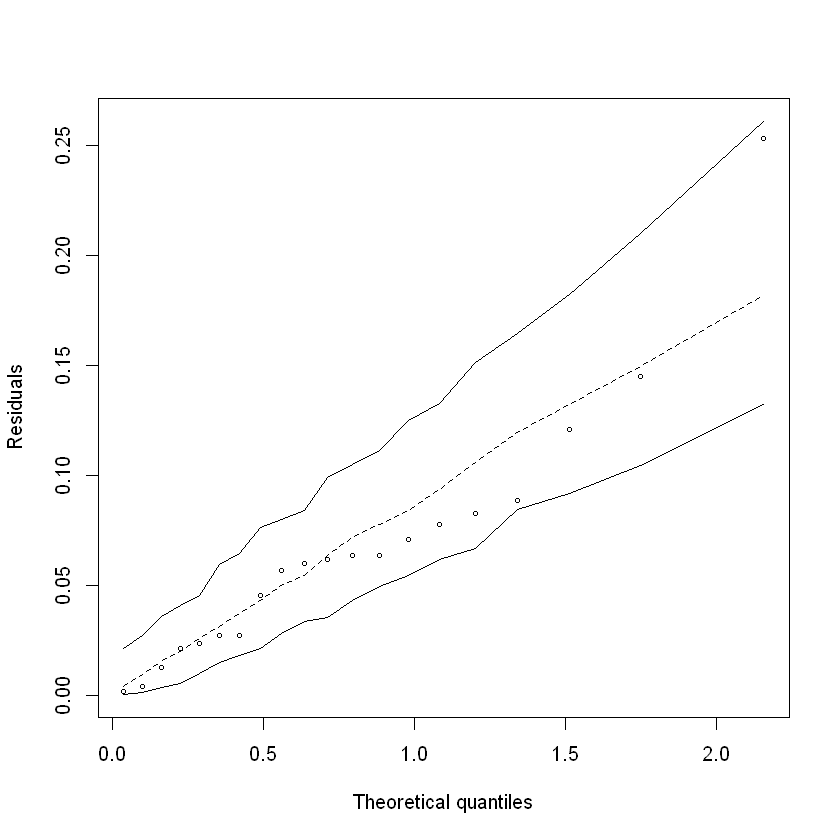

In [296]:
hnp(modelo10)

In [297]:
res_pearson=residuals(modelo10,type="pearson")
res_deviance=residuals(modelo10,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo10,type="pearson")/(sqrt(1-hatvalues(modelo10)))

In [298]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

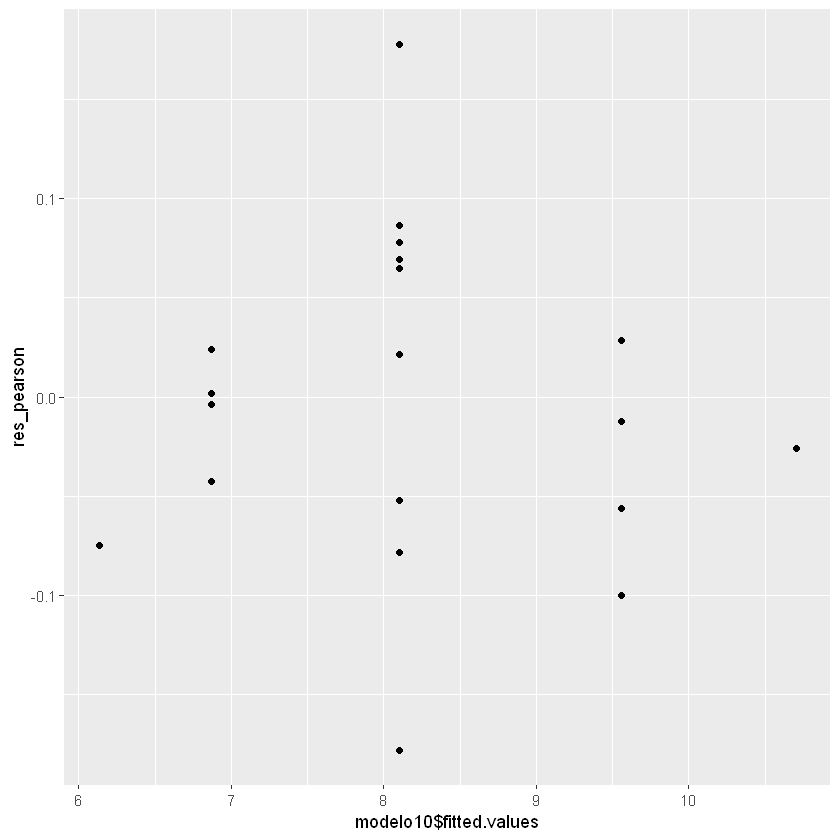

In [299]:
ggplot(grafico1)+aes(modelo10$fitted.values,res_pearson)+geom_point()

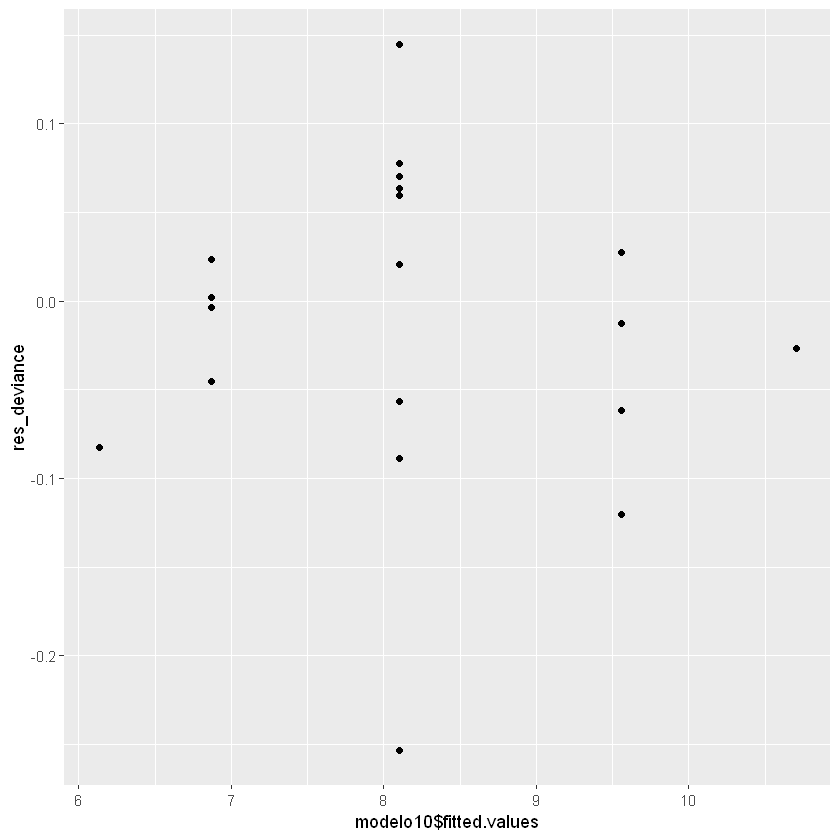

In [300]:
ggplot(grafico1)+aes(modelo10$fitted.values,res_deviance)+geom_point()

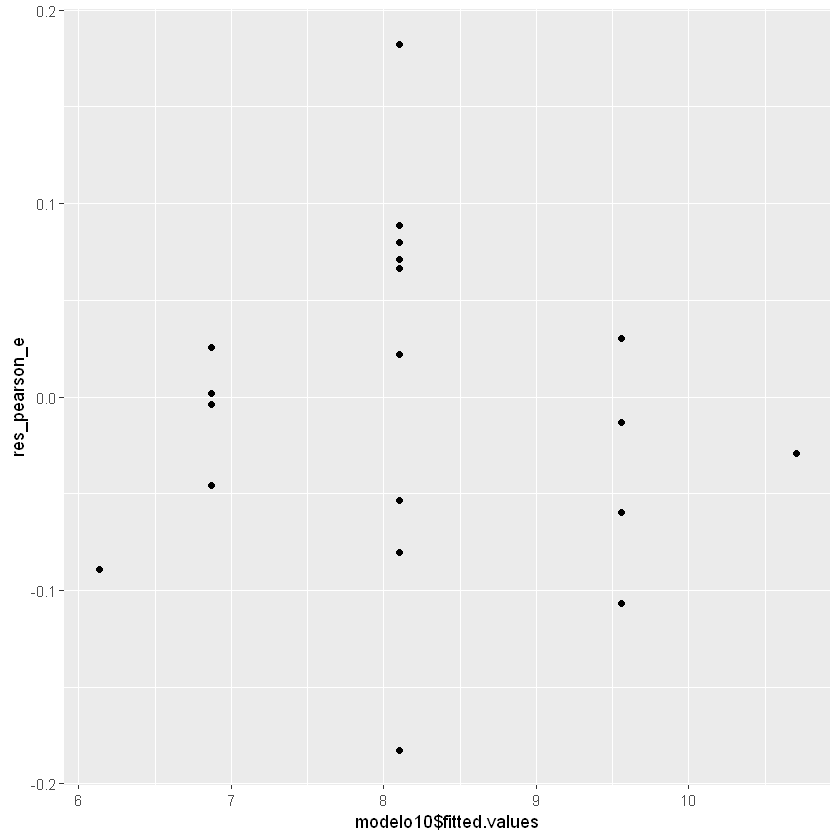

In [301]:
ggplot(grafico1)+aes(modelo10$fitted.values,res_pearson_e)+geom_point()

In [302]:
influence.measures(modelo10)

Influence measures of
	 glm(formula = y ~ x1, family = inverse.gaussian(link = "log"),      data = dados) :

     dfb.1_   dfb.x1    dffit cov.r   cook.d    hat inf
1  -0.45698  0.42863 -0.53357 1.005 1.12e-01 0.1184    
2  -0.00525  0.00579  0.00791 1.283 4.03e-05 0.1260    
3  -0.22411  0.21020 -0.26167 1.199 3.52e-02 0.1184    
4   0.13157 -0.14509 -0.19814 1.243 2.20e-02 0.1260    
5  -0.04431  0.04156 -0.05173 1.269 1.65e-03 0.1184    
6   0.01082 -0.01193 -0.01630 1.282 1.69e-04 0.1260    
7   0.09784 -0.09177  0.11424 1.257 9.05e-03 0.1184    
8  -0.06746  0.07440  0.10160 1.272 7.00e-03 0.1260    
9  -0.16143  0.15534 -0.17094 1.411 1.70e-02 0.2152   *
10  0.60382 -0.63873 -0.72150 1.402 2.54e-01 0.3025   *
11 -0.03317  0.01960 -0.14461 1.128 1.12e-02 0.0505    
12 -0.05294  0.03128 -0.23082 1.053 2.51e-02 0.0505    
13 -0.19900  0.11757 -0.86755 0.351 1.30e-01 0.0505   *
14  0.01219 -0.00720  0.05313 1.173 1.91e-03 0.0505    
15  0.04604 -0.02720  0.20074 1.082 3.08e-02 0.0505

In [303]:
modelo10=glm(y~x1,data=dados[-9,],family = inverse.gaussian(link="log"));modelo10
summary(modelo10)


Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "log"), 
    data = dados[-9, ])

Coefficients:
(Intercept)           x1  
   3.615540    -0.005952  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1817 
Residual Deviance: 0.1476 	AIC: 84.59


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "log"), 
    data = dados[-9, ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.254543  -0.062776   0.004712   0.059334   0.142374  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.615540   0.622791   5.805 2.11e-05 ***
x1          -0.005952   0.002380  -2.501   0.0229 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.007036155)

    Null deviance: 0.18173  on 18  degrees of freedom
Residual deviance: 0.14756  on 17  degrees of freedom
AIC: 84.593

Number of Fisher Scoring iterations: 6


In [304]:
modelo10=glm(y~x1,data=dados[-10,],family = inverse.gaussian(link="log"));modelo10
summary(modelo10)


Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "log"), 
    data = dados[-10, ])

Coefficients:
(Intercept)           x1  
   3.124189    -0.003999  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1554 
Residual Deviance: 0.139 	AIC: 85.48


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "log"), 
    data = dados[-10, ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.256168  -0.056151  -0.001707   0.056809   0.139535  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.124189   0.613791   5.090 9.08e-05 ***
x1          -0.003999   0.002404  -1.663    0.115    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.006572477)

    Null deviance: 0.15536  on 18  degrees of freedom
Residual deviance: 0.13904  on 17  degrees of freedom
AIC: 85.482

Number of Fisher Scoring iterations: 4


In [305]:
modelo10=glm(y~x1,data=dados[-13,],family = inverse.gaussian(link="log"));modelo10
summary(modelo10)


Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "log"), 
    data = dados[-13, ])

Coefficients:
(Intercept)           x1  
   3.571853    -0.005698  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1197 
Residual Deviance: 0.08277 	AIC: 76.3


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "log"), 
    data = dados[-13, ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.129030  -0.058886  -0.006174   0.051397   0.133449  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.571853   0.469609   7.606 7.21e-07 ***
x1          -0.005698   0.001807  -3.154  0.00579 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.004847904)

    Null deviance: 0.119731  on 18  degrees of freedom
Residual deviance: 0.082773  on 17  degrees of freedom
AIC: 76.297

Number of Fisher Scoring iterations: 6


# Modelo11- Distribuição Normal Inversa com função de ligação inversa

In [306]:
#b1 significativos.
modelo11=glm(y~.,data=dados,family = inverse.gaussian(link="inverse"));modelo11
summary(modelo11)



Call:  glm(formula = y ~ ., family = inverse.gaussian(link = "inverse"), 
    data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
 -2.612e-02    6.050e-04   -9.856e-05    1.471e-03  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    0.1862 
Residual Deviance: 0.1524 	AIC: 93.04


Call:
glm(formula = y ~ ., family = inverse.gaussian(link = "inverse"), 
    data = dados)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.248339  -0.055292  -0.004297   0.063438   0.148019  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -2.612e-02  9.048e-02  -0.289   0.7765  
x1           6.050e-04  2.828e-04   2.139   0.0482 *
x2          -9.856e-05  9.562e-04  -0.103   0.9192  
x3           1.471e-03  1.486e-02   0.099   0.9224  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.008052588)

    Null deviance: 0.18618  on 19  degrees of freedom
Residual deviance: 0.15237  on 16  degrees of freedom
AIC: 93.036

Number of Fisher Scoring iterations: 2


In [307]:
modelo11=step(modelo11,direction = "backward");modelo11
summary(modelo11)

Start:  AIC=93.04
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x3    1  0.15244 91.044
- x2    1  0.15245 91.046
<none>     0.15237 93.036
- x1    1  0.18585 95.194

Step:  AIC=91.04
y ~ x1 + x2

       Df Deviance    AIC
- x2    1  0.15253 89.058
<none>     0.15244 91.045
- x1    1  0.18596 93.485

Step:  AIC=89.06
y ~ x1

       Df Deviance    AIC
<none>     0.15253 89.057
- x1    1  0.18618 91.770



Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "inverse"), 
    data = dados)

Coefficients:
(Intercept)           x1  
 -0.0302009    0.0006062  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    0.1862 
Residual Deviance: 0.1525 	AIC: 89.06


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "inverse"), 
    data = dados)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.25124  -0.05480  -0.00689   0.06355   0.14815  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0302009  0.0672225  -0.449   0.6586  
x1           0.0006062  0.0002655   2.283   0.0348 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.007140006)

    Null deviance: 0.18618  on 19  degrees of freedom
Residual deviance: 0.15253  on 18  degrees of freedom
AIC: 89.057

Number of Fisher Scoring iterations: 2


Inverse gaussian model 


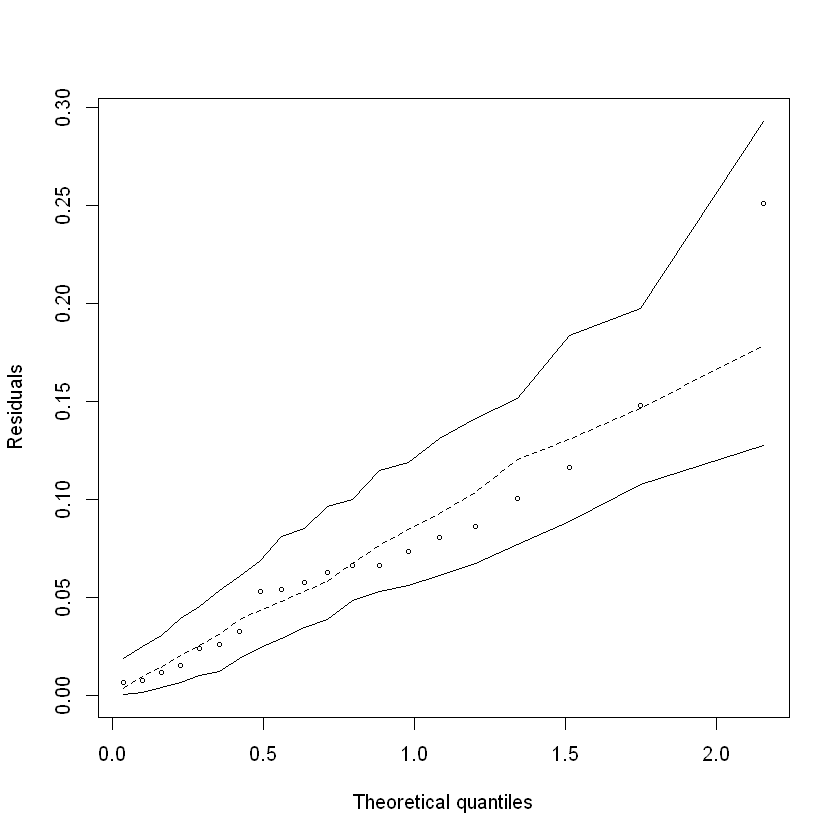

In [308]:
hnp(modelo11)

In [309]:
res_pearson=residuals(modelo11,type="pearson")
res_deviance=residuals(modelo11,type="deviance")

In [310]:
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo11,type="pearson")/(sqrt(1-hatvalues(modelo11)))

In [311]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

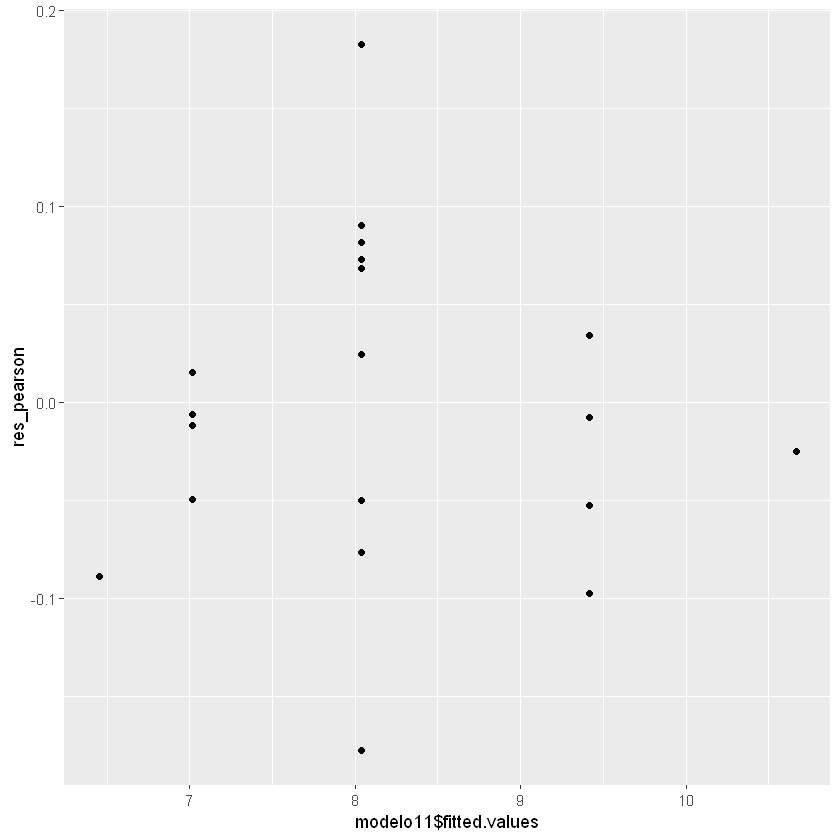

In [312]:
ggplot(grafico1)+aes(modelo11$fitted.values,res_pearson)+geom_point()

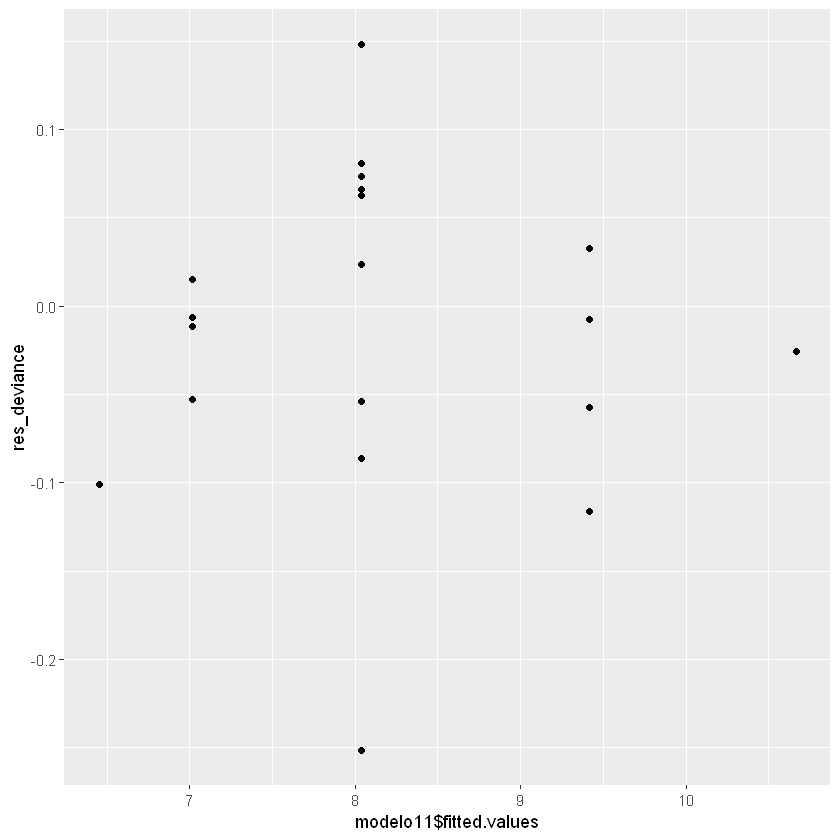

In [313]:
ggplot(grafico1)+aes(modelo11$fitted.values,res_deviance)+geom_point()


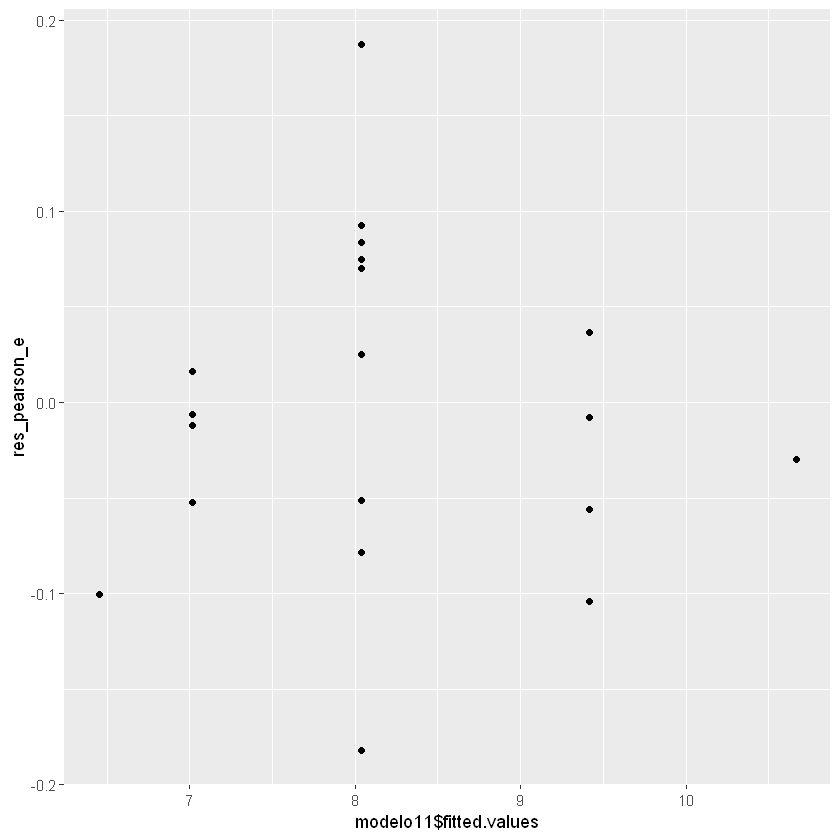

In [314]:
ggplot(grafico1)+aes(modelo11$fitted.values,res_pearson_e)+geom_point()

In [315]:
influence.measures(modelo11)

Influence measures of
	 glm(formula = y ~ x1, family = inverse.gaussian(link = "inverse"),      data = dados) :

     dfb.1_   dfb.x1   dffit cov.r   cook.d   hat inf
1  -0.41809  0.38493 -0.5243 1.034 0.108769 0.125    
2   0.01882 -0.02044 -0.0256 1.271 0.000404 0.119    
3  -0.19748  0.18182 -0.2477 1.219 0.031535 0.125    
4   0.16193 -0.17581 -0.2201 1.220 0.025924 0.119    
5  -0.02581  0.02377 -0.0324 1.280 0.000643 0.125    
6   0.03558 -0.03863 -0.0484 1.270 0.001423 0.119    
7   0.11066 -0.10188  0.1388 1.261 0.013260 0.125    
8  -0.04584  0.04976  0.0623 1.268 0.002534 0.119    
9  -0.20028  0.19132 -0.2161 1.587 0.026793 0.302   *
10  0.57992 -0.61082 -0.6736 1.206 0.202089 0.222    
11  0.00326 -0.01657 -0.1355 1.133 0.009698 0.050    
12  0.00529 -0.02690 -0.2199 1.062 0.022597 0.050    
13  0.02000 -0.10163 -0.8310 0.376 0.121836 0.050   *
14 -0.00142  0.00724  0.0592 1.171 0.002343 0.050    
15 -0.00493  0.02508  0.2050 1.077 0.031689 0.050    
16 -0.00448  0.02278  0

In [316]:
modelo11=glm(y~x1,data=dados[-9,],family = inverse.gaussian(link="inverse"));modelo11
summary(modelo11)


Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "inverse"), 
    data = dados[-9, ])

Coefficients:
(Intercept)           x1  
 -0.0462248    0.0006669  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1817 
Residual Deviance: 0.1516 	AIC: 85.1


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "inverse"), 
    data = dados[-9, ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.252328  -0.059678  -0.002849   0.062773   0.146241  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0462248  0.0799107  -0.578   0.5705  
x1           0.0006669  0.0003122   2.136   0.0475 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.007396818)

    Null deviance: 0.18173  on 18  degrees of freedom
Residual deviance: 0.15157  on 17  degrees of freedom
AIC: 85.103

Number of Fisher Scoring iterations: 2


In [317]:
modelo11=glm(y~x1,data=dados[-13,],family = inverse.gaussian(link="inverse"));modelo11
summary(modelo11)


Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "inverse"), 
    data = dados[-13, ])

Coefficients:
(Intercept)           x1  
 -0.0294228    0.0005906  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1197 
Residual Deviance: 0.0878 	AIC: 77.42


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "inverse"), 
    data = dados[-13, ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.12346  -0.06211  -0.01585   0.05452   0.13695  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0294228  0.0565841  -0.520   0.6098  
x1           0.0005906  0.0002236   2.641   0.0171 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.005192545)

    Null deviance: 0.119731  on 18  degrees of freedom
Residual deviance: 0.087803  on 17  degrees of freedom
AIC: 77.418

Number of Fisher Scoring iterations: 2


# Modelo12- Distribuição Normal Inversa com função de ligação Raíz Quadrada

In [318]:
#Intercepto e b1 significativos.
modelo12=glm(y~.,data=dados,family = inverse.gaussian(link="sqrt"));modelo12
summary(modelo12)


Call:  glm(formula = y ~ ., family = inverse.gaussian(link = "sqrt"), 
    data = dados)

Coefficients:
(Intercept)           x1           x2           x3  
  5.0290981   -0.0082367    0.0003037   -0.0800609  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    0.1862 
Residual Deviance: 0.1453 	AIC: 92.09


Call:
glm(formula = y ~ ., family = inverse.gaussian(link = "sqrt"), 
    data = dados)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.240564  -0.061465   0.005074   0.057651   0.141505  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.0290981  1.0135053   4.962 0.000141 ***
x1          -0.0082367  0.0031140  -2.645 0.017646 *  
x2           0.0003037  0.0105266   0.029 0.977340    
x3          -0.0800609  0.1663507  -0.481 0.636835    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.007521286)

    Null deviance: 0.18618  on 19  degrees of freedom
Residual deviance: 0.14534  on 16  degrees of freedom
AIC: 92.092

Number of Fisher Scoring iterations: 13


In [319]:
modelo12=step(modelo12,direction = "backward");modelo12
summary(modelo12)

Start:  AIC=92.09
y ~ x1 + x2 + x3

       Df Deviance    AIC
- x2    1  0.14535 90.093
- x3    1  0.14623 90.209
<none>     0.14534 92.092
- x1    1  0.18572 95.460

Step:  AIC=90.09
y ~ x1 + x3

       Df Deviance    AIC
- x3    1  0.14623 88.217
<none>     0.14535 90.093
- x1    1  0.18594 93.826

Step:  AIC=88.21
y ~ x1

       Df Deviance    AIC
<none>     0.14623 88.214
- x1    1  0.18618 92.250



Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "sqrt"), 
    data = dados)

Coefficients:
(Intercept)           x1  
   4.951826    -0.008227  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    0.1862 
Residual Deviance: 0.1462 	AIC: 88.21


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "sqrt"), 
    data = dados)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.254455  -0.059511   0.002952   0.058559   0.142527  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.951826   0.767418   6.453 4.52e-06 ***
x1          -0.008227   0.002914  -2.823   0.0113 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.006618111)

    Null deviance: 0.18618  on 19  degrees of freedom
Residual deviance: 0.14623  on 18  degrees of freedom
AIC: 88.214

Number of Fisher Scoring iterations: 7


Inverse gaussian model 


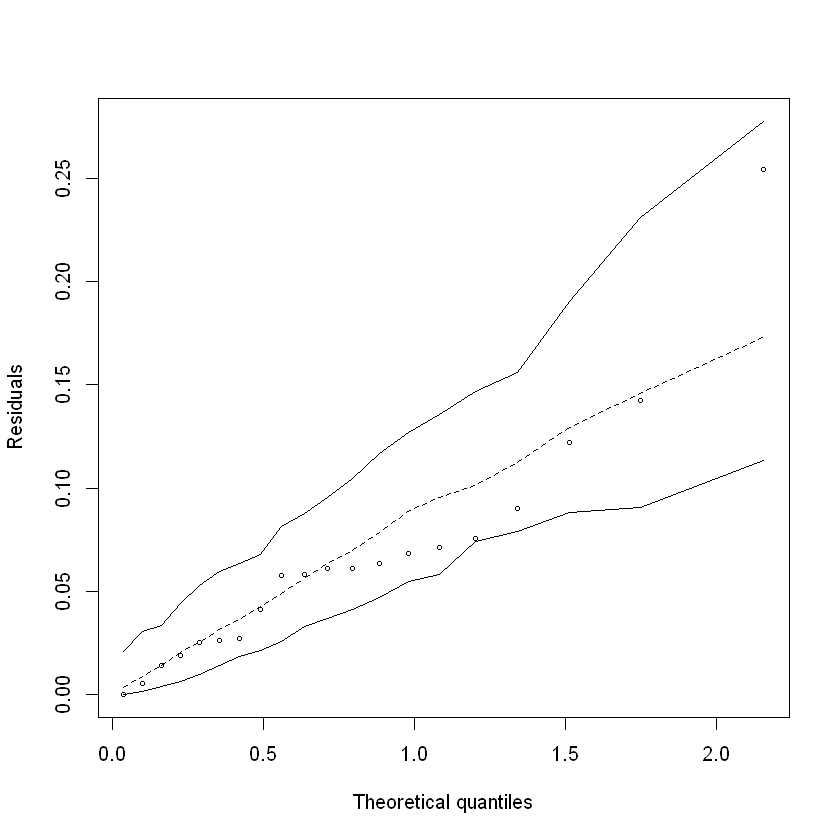

In [320]:
hnp(modelo12)

In [321]:
res_pearson=residuals(modelo12,type="pearson")
res_deviance=residuals(modelo12,type="deviance")
#Resíduos pearson estudentizadps
res_pearson_e=resid(modelo12,type="pearson")/(sqrt(1-hatvalues(modelo12)))

In [322]:
grafico1=cbind.data.frame(res_pearson,res_deviance,res_pearson_e)

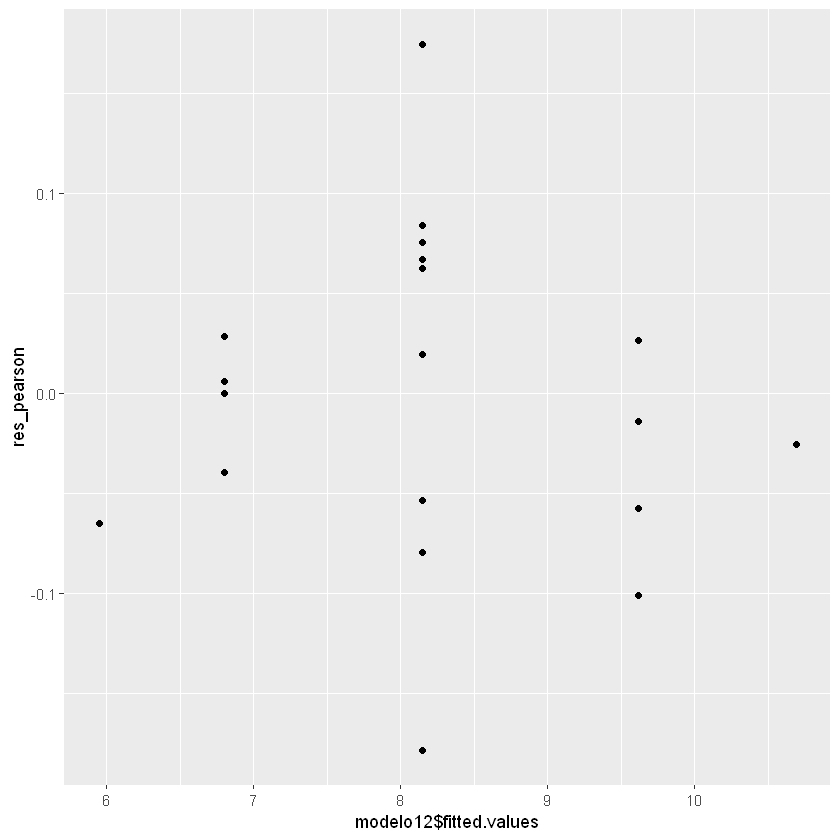

In [323]:
ggplot(grafico1)+aes(modelo12$fitted.values,res_pearson)+geom_point()

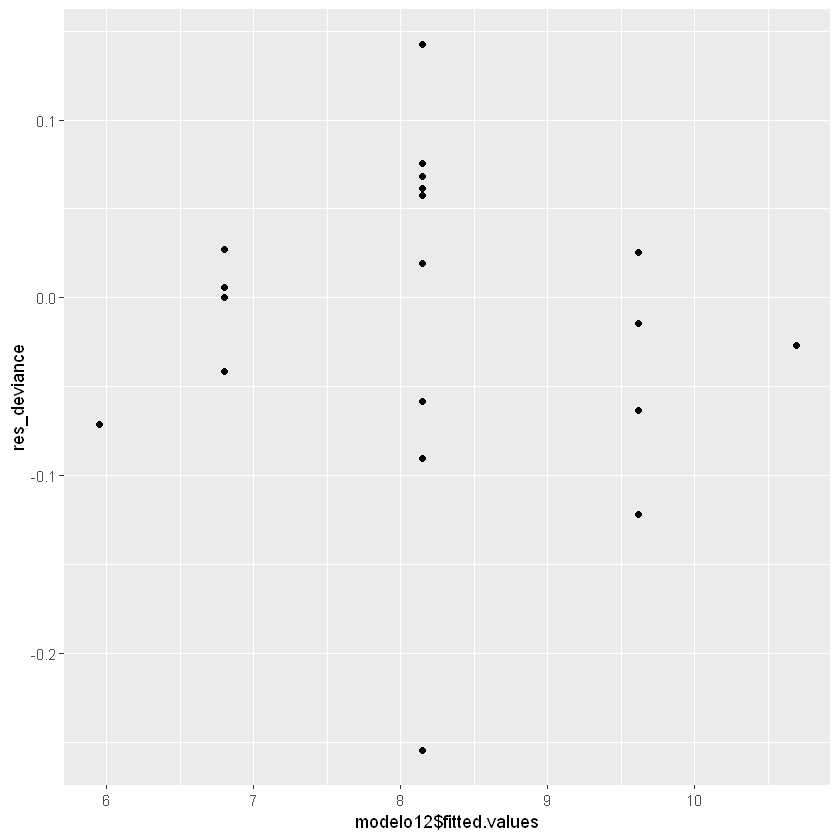

In [324]:
ggplot(grafico1)+aes(modelo12$fitted.values,res_deviance)+geom_point()

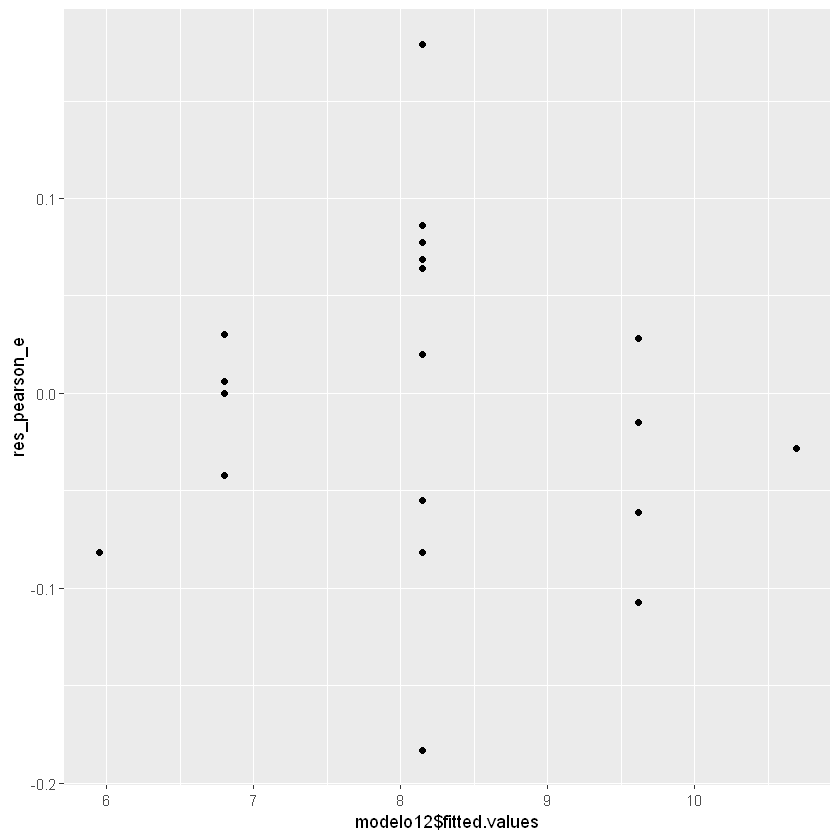

In [325]:
ggplot(grafico1)+aes(modelo12$fitted.values,res_pearson_e)+geom_point()

In [326]:
influence.measures(modelo12)

Influence measures of
	 glm(formula = y ~ x1, family = inverse.gaussian(link = "sqrt"),      data = dados) :

      dfb.1_   dfb.x1     dffit cov.r   cook.d    hat inf
1  -0.461282  0.43591 -0.523724 0.989 1.08e-01 0.1109    
2  -0.015236  0.01705  0.025177 1.282 4.18e-04 0.1259    
3  -0.229240  0.21663 -0.260271 1.184 3.51e-02 0.1109    
4   0.110765 -0.12398 -0.183041 1.248 1.93e-02 0.1259    
5  -0.050624  0.04784 -0.057477 1.257 2.05e-03 0.1109    
6  -0.000402  0.00045  0.000665 1.283 2.87e-07 0.1259    
7   0.090277 -0.08531  0.102498 1.248 7.35e-03 0.1109    
8  -0.072713  0.08139  0.120159 1.268 1.00e-02 0.1259    
9  -0.139871  0.13502 -0.146935 1.346 1.28e-02 0.1771   *
10  0.606923 -0.64445 -0.742418 1.570 2.85e-01 0.3612   *
11 -0.055918  0.04238 -0.151938 1.125 1.24e-02 0.0515    
12 -0.088285  0.06692 -0.239885 1.047 2.72e-02 0.0515    
13 -0.330712  0.25066 -0.898596 0.336 1.37e-01 0.0515   *
14  0.018096 -0.01372  0.049168 1.176 1.65e-03 0.0515    
15  0.073190 -0.0554

In [327]:
modelo12=glm(y~x1,data=dados[-9,],family = inverse.gaussian(link="sqrt"));modelo12
summary(modelo12)


Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "sqrt"), 
    data = dados[-9, ])

Coefficients:
(Intercept)           x1  
   5.099779    -0.008774  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1817 
Residual Deviance: 0.1454 	AIC: 84.31


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "sqrt"), 
    data = dados[-9, ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.25591  -0.06266   0.00811   0.05721   0.13999  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.099779   0.854111   5.971 1.52e-05 ***
x1          -0.008774   0.003220  -2.725   0.0144 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.006830228)

    Null deviance: 0.18173  on 18  degrees of freedom
Residual deviance: 0.14535  on 17  degrees of freedom
AIC: 84.307

Number of Fisher Scoring iterations: 7


In [328]:
modelo12=glm(y~x1,data=dados[-10,],family = inverse.gaussian(link="sqrt"));modelo12
summary(modelo12)


Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "sqrt"), 
    data = dados[-10, ])

Coefficients:
(Intercept)           x1  
   4.390609    -0.005977  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1554 
Residual Deviance: 0.1385 	AIC: 85.4


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "sqrt"), 
    data = dados[-10, ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.256601  -0.056913  -0.002739   0.056137   0.138779  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.390609   0.891544   4.925 0.000128 ***
x1          -0.005977   0.003464  -1.725 0.102576    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.006507678)

    Null deviance: 0.15536  on 18  degrees of freedom
Residual deviance: 0.13846  on 17  degrees of freedom
AIC: 85.402

Number of Fisher Scoring iterations: 5


In [329]:
modelo12=glm(y~x1,data=dados[-13,],family = inverse.gaussian(link="sqrt"));modelo12
summary(modelo12)


Call:  glm(formula = y ~ x1, family = inverse.gaussian(link = "sqrt"), 
    data = dados[-13, ])

Coefficients:
(Intercept)           x1  
   5.129471    -0.008767  

Degrees of Freedom: 18 Total (i.e. Null);  17 Residual
Null Deviance:	    0.1197 
Residual Deviance: 0.07978 	AIC: 75.6


Call:
glm(formula = y ~ x1, family = inverse.gaussian(link = "sqrt"), 
    data = dados[-13, ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
-0.131453  -0.057517  -0.001149   0.049049   0.130809  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.129471   0.661479   7.755 5.56e-07 ***
x1          -0.008767   0.002504  -3.501  0.00274 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.004626306)

    Null deviance: 0.119731  on 18  degrees of freedom
Residual deviance: 0.079779  on 17  degrees of freedom
AIC: 75.597

Number of Fisher Scoring iterations: 8
